### Deliverable 1: Preprocessing the Data for a Neural Network

In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import tensorflow as tf

#  Import and read the charity_data.csv.
import pandas as pd 
application_df = pd.read_csv("charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [2]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
application_df = application_df.drop(columns=["EIN", "NAME"], axis=1)

In [3]:
# Determine the number of unique values in each column.
application_df.nunique()

APPLICATION_TYPE            17
AFFILIATION                  6
CLASSIFICATION              71
USE_CASE                     5
ORGANIZATION                 4
STATUS                       2
INCOME_AMT                   9
SPECIAL_CONSIDERATIONS       2
ASK_AMT                   8747
IS_SUCCESSFUL                2
dtype: int64

In [4]:
# Look at APPLICATION_TYPE value counts for binning
application_counts = application_df.APPLICATION_TYPE.value_counts()
application_counts

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

<AxesSubplot:ylabel='Density'>

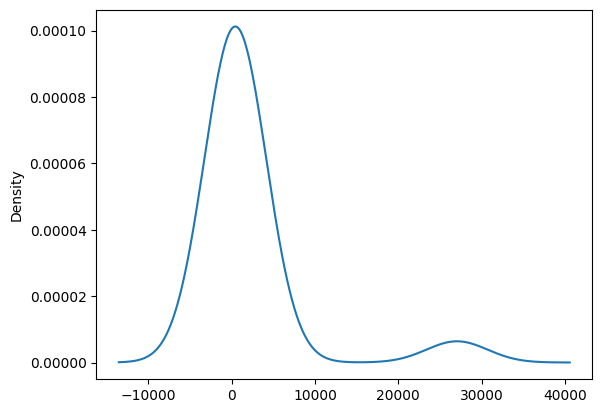

In [5]:
# Visualize the value counts of APPLICATION_TYPE
application_counts.plot.density()

In [6]:
# Determine which values to replace if counts are less than 200?
replace_application = list(application_counts[application_counts < 200].index)

# Replace in dataframe
for app in replace_application:
    application_df.APPLICATION_TYPE = application_df.APPLICATION_TYPE.replace(app,"Other")
    
# Check to make sure binning was successful
application_df.APPLICATION_TYPE.value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: APPLICATION_TYPE, dtype: int64

In [7]:
# Look at CLASSIFICATION value counts for binning
class_counts = application_df.CLASSIFICATION.value_counts()
class_counts

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C4120        1
C8210        1
C2561        1
C4500        1
C2150        1
Name: CLASSIFICATION, Length: 71, dtype: int64

<AxesSubplot:ylabel='Density'>

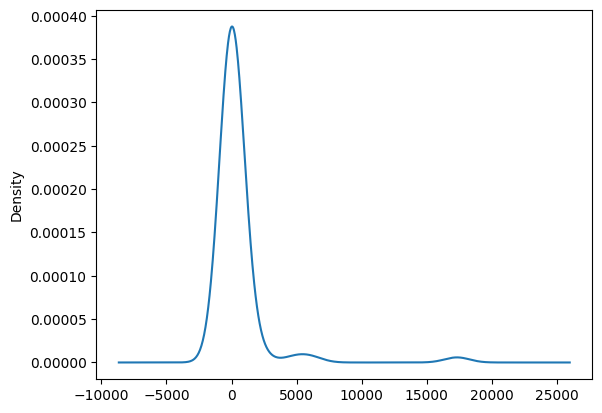

In [8]:
# Visualize the value counts of CLASSIFICATION
class_counts.plot.density()

In [9]:
# Determine which values to replace if counts are less than 1000?
replace_class = list(class_counts[class_counts < 1000].index)

# Replace in dataframe
for cls in replace_class:
    application_df.CLASSIFICATION = application_df.CLASSIFICATION.replace(cls,"Other")
    
# Check to make sure binning was successful
application_df.CLASSIFICATION.value_counts()

C1000    17326
C2000     6074
C1200     4837
Other     2261
C3000     1918
C2100     1883
Name: CLASSIFICATION, dtype: int64

In [10]:
# Generate our categorical variable lists
application_cat = application_df.dtypes[application_df.dtypes == "object"].index.tolist()

In [15]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(application_df[application_cat]))

# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names_out(application_cat)
encode_df.head()

,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,APPLICATION_TYPE_T8,AFFILIATION_CompanySponsored,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [12]:
# Merge one-hot encoded features and drop the originals
encoded_application_df = application_df.merge(encode_df, left_index = True, right_index = True).drop(columns = application_cat)
encoded_application_df.head()

,STATUS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,108590,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1,5000,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1,6692,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1,142590,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [16]:
# Split our preprocessed data into our features and target arrays
y = encoded_application_df.loc[:, "IS_SUCCESSFUL"].values
X = encoded_application_df.drop(columns=["IS_SUCCESSFUL"], axis=1).values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [17]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

### Deliverable 2: Compile, Train and Evaluate the Model

In [18]:
# Define the model - deep neural net
number_input_features = len(X_train[0])
hidden_nodes_layer1 =  80
hidden_nodes_layer2 = 30

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 80)                3520      
                                                                 
 dense_1 (Dense)             (None, 30)                2430      
                                                                 
 dense_2 (Dense)             (None, 1)                 31        
                                                                 
Total params: 5,981
Trainable params: 5,981
Non-trainable params: 0
_________________________________________________________________


In [19]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [20]:
# Import checkpoint dependencies
import os
from tensorflow.keras.callbacks import ModelCheckpoint

# Define the checkpoint path and filenames
os.makedirs("checkpoints/",exist_ok=True)
checkpoint_path = "checkpoints/weights.{epoch:02d}.hdf5"

# Create a callback that saves the model's weights every 5 epochs
cp_callback = ModelCheckpoint(
    filepath=checkpoint_path, 
    verbose=1, 
    save_weights_only=True,
    save_freq=5)

# Train the model
fit_model = nn.fit(X_train_scaled, y_train, epochs=100, callbacks=[cp_callback])

Epoch 1/100
  4/804 [..............................] - ETA: 14s - loss: 0.7599 - accuracy: 0.5859    
Epoch 1: saving model to checkpoints\weights.01.hdf5
  8/804 [..............................] - ETA: 1:08 - loss: 0.7443 - accuracy: 0.5820
Epoch 1: saving model to checkpoints\weights.01.hdf5
 13/804 [..............................] - ETA: 1:00 - loss: 0.7144 - accuracy: 0.6178
Epoch 1: saving model to checkpoints\weights.01.hdf5
 18/804 [..............................] - ETA: 54s - loss: 0.7063 - accuracy: 0.6198 
Epoch 1: saving model to checkpoints\weights.01.hdf5
 23/804 [..............................] - ETA: 52s - loss: 0.6970 - accuracy: 0.6168
Epoch 1: saving model to checkpoints\weights.01.hdf5
 28/804 [>.............................] - ETA: 51s - loss: 0.6885 - accuracy: 0.6183
Epoch 1: saving model to checkpoints\weights.01.hdf5
 34/804 [>.............................] - ETA: 49s - loss: 0.6812 - accuracy: 0.6232
Epoch 1: saving model to checkpoints\weights.01.hdf5
 37/804 

298/804 [==========>...................] - ETA: 34s - loss: 0.5960 - accuracy: 0.7060
Epoch 1: saving model to checkpoints\weights.01.hdf5
303/804 [==========>...................] - ETA: 33s - loss: 0.5962 - accuracy: 0.7058
Epoch 1: saving model to checkpoints\weights.01.hdf5
308/804 [==========>...................] - ETA: 33s - loss: 0.5955 - accuracy: 0.7059
Epoch 1: saving model to checkpoints\weights.01.hdf5
313/804 [==========>...................] - ETA: 33s - loss: 0.5953 - accuracy: 0.7065
Epoch 1: saving model to checkpoints\weights.01.hdf5
318/804 [==========>...................] - ETA: 32s - loss: 0.5949 - accuracy: 0.7071
Epoch 1: saving model to checkpoints\weights.01.hdf5
323/804 [===========>..................] - ETA: 32s - loss: 0.5955 - accuracy: 0.7068
Epoch 1: saving model to checkpoints\weights.01.hdf5
328/804 [===========>..................] - ETA: 31s - loss: 0.5949 - accuracy: 0.7078
Epoch 1: saving model to checkpoints\weights.01.hdf5
333/804 [===========>......

594/804 [=====================>........] - ETA: 12s - loss: 0.5788 - accuracy: 0.7195
Epoch 1: saving model to checkpoints\weights.01.hdf5
599/804 [=====================>........] - ETA: 12s - loss: 0.5783 - accuracy: 0.7197
Epoch 1: saving model to checkpoints\weights.01.hdf5
604/804 [=====================>........] - ETA: 12s - loss: 0.5787 - accuracy: 0.7197
Epoch 1: saving model to checkpoints\weights.01.hdf5
609/804 [=====================>........] - ETA: 11s - loss: 0.5783 - accuracy: 0.7201
Epoch 1: saving model to checkpoints\weights.01.hdf5
614/804 [=====================>........] - ETA: 11s - loss: 0.5780 - accuracy: 0.7201
Epoch 1: saving model to checkpoints\weights.01.hdf5
618/804 [======================>.......] - ETA: 11s - loss: 0.5774 - accuracy: 0.7206
Epoch 1: saving model to checkpoints\weights.01.hdf5
624/804 [======================>.......] - ETA: 11s - loss: 0.5777 - accuracy: 0.7202
Epoch 1: saving model to checkpoints\weights.01.hdf5
629/804 [==================

 84/804 [==>...........................] - ETA: 1:00 - loss: 0.5562 - accuracy: 0.7217
Epoch 2: saving model to checkpoints\weights.02.hdf5
 90/804 [==>...........................] - ETA: 59s - loss: 0.5534 - accuracy: 0.7253 
Epoch 2: saving model to checkpoints\weights.02.hdf5
 94/804 [==>...........................] - ETA: 59s - loss: 0.5541 - accuracy: 0.7257 
Epoch 2: saving model to checkpoints\weights.02.hdf5
100/804 [==>...........................] - ETA: 57s - loss: 0.5543 - accuracy: 0.7262
Epoch 2: saving model to checkpoints\weights.02.hdf5
104/804 [==>...........................] - ETA: 57s - loss: 0.5566 - accuracy: 0.7254
Epoch 2: saving model to checkpoints\weights.02.hdf5
110/804 [===>..........................] - ETA: 56s - loss: 0.5601 - accuracy: 0.7230
Epoch 2: saving model to checkpoints\weights.02.hdf5
115/804 [===>..........................] - ETA: 56s - loss: 0.5634 - accuracy: 0.7204
Epoch 2: saving model to checkpoints\weights.02.hdf5
120/804 [===>...........

379/804 [=============>................] - ETA: 46s - loss: 0.5559 - accuracy: 0.7303
Epoch 2: saving model to checkpoints\weights.02.hdf5
384/804 [=============>................] - ETA: 45s - loss: 0.5559 - accuracy: 0.7302
Epoch 2: saving model to checkpoints\weights.02.hdf5
390/804 [=============>................] - ETA: 44s - loss: 0.5556 - accuracy: 0.7306
Epoch 2: saving model to checkpoints\weights.02.hdf5
394/804 [=============>................] - ETA: 44s - loss: 0.5558 - accuracy: 0.7304
Epoch 2: saving model to checkpoints\weights.02.hdf5
400/804 [=============>................] - ETA: 43s - loss: 0.5558 - accuracy: 0.7305
Epoch 2: saving model to checkpoints\weights.02.hdf5
404/804 [==============>...............] - ETA: 42s - loss: 0.5557 - accuracy: 0.7300
Epoch 2: saving model to checkpoints\weights.02.hdf5
410/804 [==============>...............] - ETA: 41s - loss: 0.5559 - accuracy: 0.7298
Epoch 2: saving model to checkpoints\weights.02.hdf5
415/804 [==============>...

674/804 [========================>.....] - ETA: 14s - loss: 0.5562 - accuracy: 0.7301
Epoch 2: saving model to checkpoints\weights.02.hdf5
679/804 [========================>.....] - ETA: 13s - loss: 0.5561 - accuracy: 0.7301
Epoch 2: saving model to checkpoints\weights.02.hdf5
685/804 [========================>.....] - ETA: 12s - loss: 0.5562 - accuracy: 0.7299
Epoch 2: saving model to checkpoints\weights.02.hdf5
690/804 [========================>.....] - ETA: 12s - loss: 0.5560 - accuracy: 0.7301
Epoch 2: saving model to checkpoints\weights.02.hdf5
694/804 [========================>.....] - ETA: 11s - loss: 0.5563 - accuracy: 0.7300
Epoch 2: saving model to checkpoints\weights.02.hdf5
700/804 [=========================>....] - ETA: 11s - loss: 0.5566 - accuracy: 0.7296
Epoch 2: saving model to checkpoints\weights.02.hdf5
704/804 [=========================>....] - ETA: 10s - loss: 0.5565 - accuracy: 0.7297
Epoch 2: saving model to checkpoints\weights.02.hdf5
710/804 [==================

161/804 [=====>........................] - ETA: 24s - loss: 0.5502 - accuracy: 0.7335
Epoch 3: saving model to checkpoints\weights.03.hdf5
165/804 [=====>........................] - ETA: 24s - loss: 0.5504 - accuracy: 0.7328
Epoch 3: saving model to checkpoints\weights.03.hdf5
171/804 [=====>........................] - ETA: 24s - loss: 0.5507 - accuracy: 0.7332
Epoch 3: saving model to checkpoints\weights.03.hdf5
176/804 [=====>........................] - ETA: 23s - loss: 0.5501 - accuracy: 0.7337
Epoch 3: saving model to checkpoints\weights.03.hdf5
180/804 [=====>........................] - ETA: 23s - loss: 0.5510 - accuracy: 0.7337
Epoch 3: saving model to checkpoints\weights.03.hdf5
186/804 [=====>........................] - ETA: 23s - loss: 0.5519 - accuracy: 0.7332
Epoch 3: saving model to checkpoints\weights.03.hdf5
190/804 [======>.......................] - ETA: 23s - loss: 0.5498 - accuracy: 0.7347
Epoch 3: saving model to checkpoints\weights.03.hdf5
195/804 [======>...........

456/804 [================>.............] - ETA: 13s - loss: 0.5545 - accuracy: 0.7301
Epoch 3: saving model to checkpoints\weights.03.hdf5
460/804 [================>.............] - ETA: 13s - loss: 0.5547 - accuracy: 0.7302
Epoch 3: saving model to checkpoints\weights.03.hdf5
465/804 [================>.............] - ETA: 13s - loss: 0.5541 - accuracy: 0.7304
Epoch 3: saving model to checkpoints\weights.03.hdf5
470/804 [================>.............] - ETA: 13s - loss: 0.5541 - accuracy: 0.7303
Epoch 3: saving model to checkpoints\weights.03.hdf5
475/804 [================>.............] - ETA: 12s - loss: 0.5540 - accuracy: 0.7301
Epoch 3: saving model to checkpoints\weights.03.hdf5
480/804 [================>.............] - ETA: 12s - loss: 0.5536 - accuracy: 0.7301
Epoch 3: saving model to checkpoints\weights.03.hdf5
486/804 [=================>............] - ETA: 12s - loss: 0.5535 - accuracy: 0.7303
Epoch 3: saving model to checkpoints\weights.03.hdf5
491/804 [=================>

750/804 [==========================>...] - ETA: 2s - loss: 0.5545 - accuracy: 0.7307
Epoch 3: saving model to checkpoints\weights.03.hdf5
755/804 [===========================>..] - ETA: 1s - loss: 0.5546 - accuracy: 0.7306
Epoch 3: saving model to checkpoints\weights.03.hdf5
761/804 [===========================>..] - ETA: 1s - loss: 0.5545 - accuracy: 0.7309
Epoch 3: saving model to checkpoints\weights.03.hdf5
766/804 [===========================>..] - ETA: 1s - loss: 0.5544 - accuracy: 0.7310
Epoch 3: saving model to checkpoints\weights.03.hdf5
771/804 [===========================>..] - ETA: 1s - loss: 0.5541 - accuracy: 0.7312
Epoch 3: saving model to checkpoints\weights.03.hdf5
774/804 [===========================>..] - ETA: 1s - loss: 0.5543 - accuracy: 0.7311
Epoch 3: saving model to checkpoints\weights.03.hdf5
780/804 [============================>.] - ETA: 0s - loss: 0.5540 - accuracy: 0.7313
Epoch 3: saving model to checkpoints\weights.03.hdf5
786/804 [=========================

235/804 [=======>......................] - ETA: 41s - loss: 0.5478 - accuracy: 0.7336
Epoch 4: saving model to checkpoints\weights.04.hdf5
242/804 [========>.....................] - ETA: 40s - loss: 0.5473 - accuracy: 0.7342
Epoch 4: saving model to checkpoints\weights.04.hdf5
247/804 [========>.....................] - ETA: 39s - loss: 0.5469 - accuracy: 0.7343
Epoch 4: saving model to checkpoints\weights.04.hdf5
252/804 [========>.....................] - ETA: 39s - loss: 0.5474 - accuracy: 0.7341
Epoch 4: saving model to checkpoints\weights.04.hdf5
256/804 [========>.....................] - ETA: 39s - loss: 0.5471 - accuracy: 0.7341
Epoch 4: saving model to checkpoints\weights.04.hdf5
261/804 [========>.....................] - ETA: 38s - loss: 0.5474 - accuracy: 0.7340
Epoch 4: saving model to checkpoints\weights.04.hdf5
266/804 [========>.....................] - ETA: 38s - loss: 0.5478 - accuracy: 0.7333
Epoch 4: saving model to checkpoints\weights.04.hdf5
271/804 [=========>........

531/804 [==================>...........] - ETA: 16s - loss: 0.5498 - accuracy: 0.7310
Epoch 4: saving model to checkpoints\weights.04.hdf5
537/804 [===================>..........] - ETA: 16s - loss: 0.5504 - accuracy: 0.7306
Epoch 4: saving model to checkpoints\weights.04.hdf5
542/804 [===================>..........] - ETA: 16s - loss: 0.5507 - accuracy: 0.7303
Epoch 4: saving model to checkpoints\weights.04.hdf5
546/804 [===================>..........] - ETA: 15s - loss: 0.5508 - accuracy: 0.7304
Epoch 4: saving model to checkpoints\weights.04.hdf5
551/804 [===================>..........] - ETA: 15s - loss: 0.5508 - accuracy: 0.7301
Epoch 4: saving model to checkpoints\weights.04.hdf5
556/804 [===================>..........] - ETA: 15s - loss: 0.5508 - accuracy: 0.7304
Epoch 4: saving model to checkpoints\weights.04.hdf5
562/804 [===================>..........] - ETA: 14s - loss: 0.5508 - accuracy: 0.7308
Epoch 4: saving model to checkpoints\weights.04.hdf5
566/804 [==================

 16/804 [..............................] - ETA: 39s - loss: 0.5437 - accuracy: 0.7480
Epoch 5: saving model to checkpoints\weights.05.hdf5
 23/804 [..............................] - ETA: 37s - loss: 0.5623 - accuracy: 0.7364
Epoch 5: saving model to checkpoints\weights.05.hdf5
 27/804 [>.............................] - ETA: 39s - loss: 0.5690 - accuracy: 0.7269
Epoch 5: saving model to checkpoints\weights.05.hdf5
 32/804 [>.............................] - ETA: 39s - loss: 0.5687 - accuracy: 0.7295
Epoch 5: saving model to checkpoints\weights.05.hdf5
 37/804 [>.............................] - ETA: 39s - loss: 0.5698 - accuracy: 0.7264
Epoch 5: saving model to checkpoints\weights.05.hdf5
 42/804 [>.............................] - ETA: 38s - loss: 0.5661 - accuracy: 0.7307
Epoch 5: saving model to checkpoints\weights.05.hdf5
 47/804 [>.............................] - ETA: 39s - loss: 0.5620 - accuracy: 0.7327
Epoch 5: saving model to checkpoints\weights.05.hdf5
 52/804 [>.................

311/804 [==========>...................] - ETA: 25s - loss: 0.5520 - accuracy: 0.7289
Epoch 5: saving model to checkpoints\weights.05.hdf5
318/804 [==========>...................] - ETA: 24s - loss: 0.5518 - accuracy: 0.7289
Epoch 5: saving model to checkpoints\weights.05.hdf5
323/804 [===========>..................] - ETA: 24s - loss: 0.5512 - accuracy: 0.7295
Epoch 5: saving model to checkpoints\weights.05.hdf5
327/804 [===========>..................] - ETA: 24s - loss: 0.5509 - accuracy: 0.7299
Epoch 5: saving model to checkpoints\weights.05.hdf5
332/804 [===========>..................] - ETA: 24s - loss: 0.5501 - accuracy: 0.7307
Epoch 5: saving model to checkpoints\weights.05.hdf5
337/804 [===========>..................] - ETA: 23s - loss: 0.5501 - accuracy: 0.7307
Epoch 5: saving model to checkpoints\weights.05.hdf5
342/804 [===========>..................] - ETA: 23s - loss: 0.5502 - accuracy: 0.7310
Epoch 5: saving model to checkpoints\weights.05.hdf5
346/804 [===========>......

607/804 [=====================>........] - ETA: 10s - loss: 0.5499 - accuracy: 0.7324
Epoch 5: saving model to checkpoints\weights.05.hdf5
611/804 [=====================>........] - ETA: 9s - loss: 0.5499 - accuracy: 0.7326 
Epoch 5: saving model to checkpoints\weights.05.hdf5
618/804 [======================>.......] - ETA: 9s - loss: 0.5497 - accuracy: 0.7326
Epoch 5: saving model to checkpoints\weights.05.hdf5
622/804 [======================>.......] - ETA: 9s - loss: 0.5494 - accuracy: 0.7329
Epoch 5: saving model to checkpoints\weights.05.hdf5
627/804 [======================>.......] - ETA: 9s - loss: 0.5492 - accuracy: 0.7331
Epoch 5: saving model to checkpoints\weights.05.hdf5
632/804 [======================>.......] - ETA: 8s - loss: 0.5488 - accuracy: 0.7336
Epoch 5: saving model to checkpoints\weights.05.hdf5
637/804 [======================>.......] - ETA: 8s - loss: 0.5488 - accuracy: 0.7335
Epoch 5: saving model to checkpoints\weights.05.hdf5
642/804 [======================>

 92/804 [==>...........................] - ETA: 35s - loss: 0.5530 - accuracy: 0.7303
Epoch 6: saving model to checkpoints\weights.06.hdf5
 98/804 [==>...........................] - ETA: 34s - loss: 0.5494 - accuracy: 0.7328
Epoch 6: saving model to checkpoints\weights.06.hdf5
103/804 [==>...........................] - ETA: 34s - loss: 0.5489 - accuracy: 0.7354
Epoch 6: saving model to checkpoints\weights.06.hdf5
108/804 [===>..........................] - ETA: 34s - loss: 0.5510 - accuracy: 0.7350
Epoch 6: saving model to checkpoints\weights.06.hdf5
113/804 [===>..........................] - ETA: 34s - loss: 0.5492 - accuracy: 0.7376
Epoch 6: saving model to checkpoints\weights.06.hdf5
118/804 [===>..........................] - ETA: 34s - loss: 0.5481 - accuracy: 0.7376
Epoch 6: saving model to checkpoints\weights.06.hdf5
123/804 [===>..........................] - ETA: 33s - loss: 0.5464 - accuracy: 0.7388
Epoch 6: saving model to checkpoints\weights.06.hdf5
128/804 [===>..............

388/804 [=============>................] - ETA: 21s - loss: 0.5462 - accuracy: 0.7374
Epoch 6: saving model to checkpoints\weights.06.hdf5
394/804 [=============>................] - ETA: 21s - loss: 0.5471 - accuracy: 0.7367
Epoch 6: saving model to checkpoints\weights.06.hdf5
399/804 [=============>................] - ETA: 21s - loss: 0.5467 - accuracy: 0.7366
Epoch 6: saving model to checkpoints\weights.06.hdf5
403/804 [==============>...............] - ETA: 21s - loss: 0.5465 - accuracy: 0.7370
Epoch 6: saving model to checkpoints\weights.06.hdf5
408/804 [==============>...............] - ETA: 20s - loss: 0.5468 - accuracy: 0.7365
Epoch 6: saving model to checkpoints\weights.06.hdf5
414/804 [==============>...............] - ETA: 20s - loss: 0.5466 - accuracy: 0.7369
Epoch 6: saving model to checkpoints\weights.06.hdf5
418/804 [==============>...............] - ETA: 20s - loss: 0.5473 - accuracy: 0.7362
Epoch 6: saving model to checkpoints\weights.06.hdf5
423/804 [==============>...

682/804 [========================>.....] - ETA: 6s - loss: 0.5513 - accuracy: 0.7323
Epoch 6: saving model to checkpoints\weights.06.hdf5
689/804 [========================>.....] - ETA: 6s - loss: 0.5510 - accuracy: 0.7326
Epoch 6: saving model to checkpoints\weights.06.hdf5
693/804 [========================>.....] - ETA: 5s - loss: 0.5507 - accuracy: 0.7331
Epoch 6: saving model to checkpoints\weights.06.hdf5
698/804 [=========================>....] - ETA: 5s - loss: 0.5500 - accuracy: 0.7337
Epoch 6: saving model to checkpoints\weights.06.hdf5
703/804 [=========================>....] - ETA: 5s - loss: 0.5503 - accuracy: 0.7332
Epoch 6: saving model to checkpoints\weights.06.hdf5
708/804 [=========================>....] - ETA: 5s - loss: 0.5501 - accuracy: 0.7334
Epoch 6: saving model to checkpoints\weights.06.hdf5
713/804 [=========================>....] - ETA: 4s - loss: 0.5499 - accuracy: 0.7336
Epoch 6: saving model to checkpoints\weights.06.hdf5
719/804 [=========================

174/804 [=====>........................] - ETA: 32s - loss: 0.5413 - accuracy: 0.7331
Epoch 7: saving model to checkpoints\weights.07.hdf5
180/804 [=====>........................] - ETA: 31s - loss: 0.5425 - accuracy: 0.7328
Epoch 7: saving model to checkpoints\weights.07.hdf5
184/804 [=====>........................] - ETA: 31s - loss: 0.5439 - accuracy: 0.7320
Epoch 7: saving model to checkpoints\weights.07.hdf5
189/804 [======>.......................] - ETA: 31s - loss: 0.5451 - accuracy: 0.7313
Epoch 7: saving model to checkpoints\weights.07.hdf5
194/804 [======>.......................] - ETA: 31s - loss: 0.5458 - accuracy: 0.7307
Epoch 7: saving model to checkpoints\weights.07.hdf5
199/804 [======>.......................] - ETA: 31s - loss: 0.5458 - accuracy: 0.7312
Epoch 7: saving model to checkpoints\weights.07.hdf5
204/804 [======>.......................] - ETA: 30s - loss: 0.5449 - accuracy: 0.7316
Epoch 7: saving model to checkpoints\weights.07.hdf5
210/804 [======>...........

469/804 [================>.............] - ETA: 17s - loss: 0.5494 - accuracy: 0.7315
Epoch 7: saving model to checkpoints\weights.07.hdf5
474/804 [================>.............] - ETA: 16s - loss: 0.5491 - accuracy: 0.7317
Epoch 7: saving model to checkpoints\weights.07.hdf5
479/804 [================>.............] - ETA: 16s - loss: 0.5489 - accuracy: 0.7321
Epoch 7: saving model to checkpoints\weights.07.hdf5
485/804 [=================>............] - ETA: 16s - loss: 0.5489 - accuracy: 0.7322
Epoch 7: saving model to checkpoints\weights.07.hdf5
489/804 [=================>............] - ETA: 16s - loss: 0.5492 - accuracy: 0.7320
Epoch 7: saving model to checkpoints\weights.07.hdf5
494/804 [=================>............] - ETA: 15s - loss: 0.5496 - accuracy: 0.7318
Epoch 7: saving model to checkpoints\weights.07.hdf5
499/804 [=================>............] - ETA: 15s - loss: 0.5489 - accuracy: 0.7325
Epoch 7: saving model to checkpoints\weights.07.hdf5
504/804 [=================>

764/804 [===========================>..] - ETA: 2s - loss: 0.5489 - accuracy: 0.7332
Epoch 7: saving model to checkpoints\weights.07.hdf5
770/804 [===========================>..] - ETA: 1s - loss: 0.5489 - accuracy: 0.7331
Epoch 7: saving model to checkpoints\weights.07.hdf5
775/804 [===========================>..] - ETA: 1s - loss: 0.5488 - accuracy: 0.7332
Epoch 7: saving model to checkpoints\weights.07.hdf5
779/804 [============================>.] - ETA: 1s - loss: 0.5487 - accuracy: 0.7332
Epoch 7: saving model to checkpoints\weights.07.hdf5
784/804 [============================>.] - ETA: 1s - loss: 0.5487 - accuracy: 0.7331
Epoch 7: saving model to checkpoints\weights.07.hdf5
789/804 [============================>.] - ETA: 0s - loss: 0.5489 - accuracy: 0.7329
Epoch 7: saving model to checkpoints\weights.07.hdf5
794/804 [============================>.] - ETA: 0s - loss: 0.5491 - accuracy: 0.7326
Epoch 7: saving model to checkpoints\weights.07.hdf5
799/804 [=========================

250/804 [========>.....................] - ETA: 28s - loss: 0.5478 - accuracy: 0.7309
Epoch 8: saving model to checkpoints\weights.08.hdf5
254/804 [========>.....................] - ETA: 28s - loss: 0.5479 - accuracy: 0.7307
Epoch 8: saving model to checkpoints\weights.08.hdf5
260/804 [========>.....................] - ETA: 28s - loss: 0.5470 - accuracy: 0.7316
Epoch 8: saving model to checkpoints\weights.08.hdf5
266/804 [========>.....................] - ETA: 28s - loss: 0.5469 - accuracy: 0.7313
Epoch 8: saving model to checkpoints\weights.08.hdf5
271/804 [=========>....................] - ETA: 28s - loss: 0.5459 - accuracy: 0.7320
Epoch 8: saving model to checkpoints\weights.08.hdf5
276/804 [=========>....................] - ETA: 27s - loss: 0.5453 - accuracy: 0.7321
Epoch 8: saving model to checkpoints\weights.08.hdf5
279/804 [=========>....................] - ETA: 27s - loss: 0.5448 - accuracy: 0.7328
Epoch 8: saving model to checkpoints\weights.08.hdf5
285/804 [=========>........

545/804 [===================>..........] - ETA: 13s - loss: 0.5446 - accuracy: 0.7363
Epoch 8: saving model to checkpoints\weights.08.hdf5
550/804 [===================>..........] - ETA: 13s - loss: 0.5451 - accuracy: 0.7361
Epoch 8: saving model to checkpoints\weights.08.hdf5
556/804 [===================>..........] - ETA: 13s - loss: 0.5451 - accuracy: 0.7363
Epoch 8: saving model to checkpoints\weights.08.hdf5
560/804 [===================>..........] - ETA: 12s - loss: 0.5452 - accuracy: 0.7364
Epoch 8: saving model to checkpoints\weights.08.hdf5
566/804 [====================>.........] - ETA: 12s - loss: 0.5453 - accuracy: 0.7363
Epoch 8: saving model to checkpoints\weights.08.hdf5
571/804 [====================>.........] - ETA: 12s - loss: 0.5460 - accuracy: 0.7358
Epoch 8: saving model to checkpoints\weights.08.hdf5
576/804 [====================>.........] - ETA: 12s - loss: 0.5461 - accuracy: 0.7357
Epoch 8: saving model to checkpoints\weights.08.hdf5
581/804 [==================

 32/804 [>.............................] - ETA: 45s - loss: 0.5387 - accuracy: 0.7383
Epoch 9: saving model to checkpoints\weights.09.hdf5
 36/804 [>.............................] - ETA: 45s - loss: 0.5520 - accuracy: 0.7292
Epoch 9: saving model to checkpoints\weights.09.hdf5
 42/804 [>.............................] - ETA: 44s - loss: 0.5566 - accuracy: 0.7210
Epoch 9: saving model to checkpoints\weights.09.hdf5
 46/804 [>.............................] - ETA: 45s - loss: 0.5561 - accuracy: 0.7221
Epoch 9: saving model to checkpoints\weights.09.hdf5
 51/804 [>.............................] - ETA: 44s - loss: 0.5505 - accuracy: 0.7286
Epoch 9: saving model to checkpoints\weights.09.hdf5
 57/804 [=>............................] - ETA: 44s - loss: 0.5545 - accuracy: 0.7242
Epoch 9: saving model to checkpoints\weights.09.hdf5
 62/804 [=>............................] - ETA: 45s - loss: 0.5549 - accuracy: 0.7243
Epoch 9: saving model to checkpoints\weights.09.hdf5
 65/804 [=>................

326/804 [===========>..................] - ETA: 26s - loss: 0.5511 - accuracy: 0.7306
Epoch 9: saving model to checkpoints\weights.09.hdf5
331/804 [===========>..................] - ETA: 26s - loss: 0.5513 - accuracy: 0.7307
Epoch 9: saving model to checkpoints\weights.09.hdf5
336/804 [===========>..................] - ETA: 26s - loss: 0.5506 - accuracy: 0.7316
Epoch 9: saving model to checkpoints\weights.09.hdf5
341/804 [===========>..................] - ETA: 25s - loss: 0.5508 - accuracy: 0.7313
Epoch 9: saving model to checkpoints\weights.09.hdf5
346/804 [===========>..................] - ETA: 25s - loss: 0.5506 - accuracy: 0.7312
Epoch 9: saving model to checkpoints\weights.09.hdf5
351/804 [============>.................] - ETA: 25s - loss: 0.5500 - accuracy: 0.7318
Epoch 9: saving model to checkpoints\weights.09.hdf5
356/804 [============>.................] - ETA: 24s - loss: 0.5493 - accuracy: 0.7322
Epoch 9: saving model to checkpoints\weights.09.hdf5
361/804 [============>.....

621/804 [======================>.......] - ETA: 9s - loss: 0.5476 - accuracy: 0.7333 
Epoch 9: saving model to checkpoints\weights.09.hdf5
625/804 [======================>.......] - ETA: 9s - loss: 0.5475 - accuracy: 0.7335
Epoch 9: saving model to checkpoints\weights.09.hdf5
630/804 [======================>.......] - ETA: 9s - loss: 0.5479 - accuracy: 0.7332
Epoch 9: saving model to checkpoints\weights.09.hdf5
636/804 [======================>.......] - ETA: 9s - loss: 0.5484 - accuracy: 0.7326
Epoch 9: saving model to checkpoints\weights.09.hdf5
641/804 [======================>.......] - ETA: 8s - loss: 0.5484 - accuracy: 0.7325
Epoch 9: saving model to checkpoints\weights.09.hdf5
646/804 [=======================>......] - ETA: 8s - loss: 0.5491 - accuracy: 0.7319
Epoch 9: saving model to checkpoints\weights.09.hdf5
651/804 [=======================>......] - ETA: 8s - loss: 0.5491 - accuracy: 0.7319
Epoch 9: saving model to checkpoints\weights.09.hdf5
656/804 [=======================>

108/804 [===>..........................] - ETA: 46s - loss: 0.5526 - accuracy: 0.7254
Epoch 10: saving model to checkpoints\weights.10.hdf5
113/804 [===>..........................] - ETA: 46s - loss: 0.5523 - accuracy: 0.7257
Epoch 10: saving model to checkpoints\weights.10.hdf5
117/804 [===>..........................] - ETA: 45s - loss: 0.5523 - accuracy: 0.7254
Epoch 10: saving model to checkpoints\weights.10.hdf5
122/804 [===>..........................] - ETA: 45s - loss: 0.5504 - accuracy: 0.7272
Epoch 10: saving model to checkpoints\weights.10.hdf5
127/804 [===>..........................] - ETA: 44s - loss: 0.5518 - accuracy: 0.7261
Epoch 10: saving model to checkpoints\weights.10.hdf5
133/804 [===>..........................] - ETA: 43s - loss: 0.5496 - accuracy: 0.7279
Epoch 10: saving model to checkpoints\weights.10.hdf5
137/804 [====>.........................] - ETA: 43s - loss: 0.5478 - accuracy: 0.7297
Epoch 10: saving model to checkpoints\weights.10.hdf5
143/804 [====>......

396/804 [=============>................] - ETA: 24s - loss: 0.5452 - accuracy: 0.7352
Epoch 10: saving model to checkpoints\weights.10.hdf5
401/804 [=============>................] - ETA: 24s - loss: 0.5446 - accuracy: 0.7357
Epoch 10: saving model to checkpoints\weights.10.hdf5
407/804 [==============>...............] - ETA: 24s - loss: 0.5458 - accuracy: 0.7350
Epoch 10: saving model to checkpoints\weights.10.hdf5
412/804 [==============>...............] - ETA: 23s - loss: 0.5455 - accuracy: 0.7355
Epoch 10: saving model to checkpoints\weights.10.hdf5
418/804 [==============>...............] - ETA: 23s - loss: 0.5455 - accuracy: 0.7360
Epoch 10: saving model to checkpoints\weights.10.hdf5
422/804 [==============>...............] - ETA: 23s - loss: 0.5464 - accuracy: 0.7353
Epoch 10: saving model to checkpoints\weights.10.hdf5
427/804 [==============>...............] - ETA: 22s - loss: 0.5459 - accuracy: 0.7359
Epoch 10: saving model to checkpoints\weights.10.hdf5
432/804 [===========

687/804 [========================>.....] - ETA: 6s - loss: 0.5472 - accuracy: 0.7338
Epoch 10: saving model to checkpoints\weights.10.hdf5
692/804 [========================>.....] - ETA: 6s - loss: 0.5470 - accuracy: 0.7341
Epoch 10: saving model to checkpoints\weights.10.hdf5
697/804 [=========================>....] - ETA: 6s - loss: 0.5470 - accuracy: 0.7340
Epoch 10: saving model to checkpoints\weights.10.hdf5
703/804 [=========================>....] - ETA: 5s - loss: 0.5473 - accuracy: 0.7336
Epoch 10: saving model to checkpoints\weights.10.hdf5
707/804 [=========================>....] - ETA: 5s - loss: 0.5477 - accuracy: 0.7333
Epoch 10: saving model to checkpoints\weights.10.hdf5
712/804 [=========================>....] - ETA: 5s - loss: 0.5475 - accuracy: 0.7333
Epoch 10: saving model to checkpoints\weights.10.hdf5
717/804 [=========================>....] - ETA: 4s - loss: 0.5473 - accuracy: 0.7336
Epoch 10: saving model to checkpoints\weights.10.hdf5
722/804 [==================

173/804 [=====>........................] - ETA: 34s - loss: 0.5347 - accuracy: 0.7493
Epoch 11: saving model to checkpoints\weights.11.hdf5
178/804 [=====>........................] - ETA: 33s - loss: 0.5353 - accuracy: 0.7484
Epoch 11: saving model to checkpoints\weights.11.hdf5
183/804 [=====>........................] - ETA: 33s - loss: 0.5358 - accuracy: 0.7483
Epoch 11: saving model to checkpoints\weights.11.hdf5
188/804 [======>.......................] - ETA: 33s - loss: 0.5368 - accuracy: 0.7478
Epoch 11: saving model to checkpoints\weights.11.hdf5
193/804 [======>.......................] - ETA: 32s - loss: 0.5367 - accuracy: 0.7482
Epoch 11: saving model to checkpoints\weights.11.hdf5
198/804 [======>.......................] - ETA: 32s - loss: 0.5374 - accuracy: 0.7476
Epoch 11: saving model to checkpoints\weights.11.hdf5
203/804 [======>.......................] - ETA: 31s - loss: 0.5390 - accuracy: 0.7458
Epoch 11: saving model to checkpoints\weights.11.hdf5
208/804 [======>....

463/804 [================>.............] - ETA: 17s - loss: 0.5460 - accuracy: 0.7350
Epoch 11: saving model to checkpoints\weights.11.hdf5
468/804 [================>.............] - ETA: 17s - loss: 0.5460 - accuracy: 0.7350
Epoch 11: saving model to checkpoints\weights.11.hdf5
474/804 [================>.............] - ETA: 16s - loss: 0.5455 - accuracy: 0.7354
Epoch 11: saving model to checkpoints\weights.11.hdf5
478/804 [================>.............] - ETA: 16s - loss: 0.5455 - accuracy: 0.7356
Epoch 11: saving model to checkpoints\weights.11.hdf5
483/804 [=================>............] - ETA: 16s - loss: 0.5458 - accuracy: 0.7357
Epoch 11: saving model to checkpoints\weights.11.hdf5
488/804 [=================>............] - ETA: 16s - loss: 0.5448 - accuracy: 0.7364
Epoch 11: saving model to checkpoints\weights.11.hdf5
493/804 [=================>............] - ETA: 15s - loss: 0.5455 - accuracy: 0.7357
Epoch 11: saving model to checkpoints\weights.11.hdf5
498/804 [===========

757/804 [===========================>..] - ETA: 2s - loss: 0.5478 - accuracy: 0.7337
Epoch 11: saving model to checkpoints\weights.11.hdf5
763/804 [===========================>..] - ETA: 2s - loss: 0.5474 - accuracy: 0.7340
Epoch 11: saving model to checkpoints\weights.11.hdf5
768/804 [===========================>..] - ETA: 1s - loss: 0.5469 - accuracy: 0.7343
Epoch 11: saving model to checkpoints\weights.11.hdf5
773/804 [===========================>..] - ETA: 1s - loss: 0.5466 - accuracy: 0.7344
Epoch 11: saving model to checkpoints\weights.11.hdf5
778/804 [============================>.] - ETA: 1s - loss: 0.5464 - accuracy: 0.7345
Epoch 11: saving model to checkpoints\weights.11.hdf5
783/804 [============================>.] - ETA: 1s - loss: 0.5466 - accuracy: 0.7344
Epoch 11: saving model to checkpoints\weights.11.hdf5
788/804 [============================>.] - ETA: 0s - loss: 0.5468 - accuracy: 0.7342
Epoch 11: saving model to checkpoints\weights.11.hdf5
793/804 [==================

242/804 [========>.....................] - ETA: 28s - loss: 0.5428 - accuracy: 0.7357
Epoch 12: saving model to checkpoints\weights.12.hdf5
249/804 [========>.....................] - ETA: 28s - loss: 0.5433 - accuracy: 0.7356
Epoch 12: saving model to checkpoints\weights.12.hdf5
254/804 [========>.....................] - ETA: 27s - loss: 0.5434 - accuracy: 0.7357
Epoch 12: saving model to checkpoints\weights.12.hdf5
258/804 [========>.....................] - ETA: 27s - loss: 0.5435 - accuracy: 0.7361
Epoch 12: saving model to checkpoints\weights.12.hdf5
265/804 [========>.....................] - ETA: 27s - loss: 0.5422 - accuracy: 0.7371
Epoch 12: saving model to checkpoints\weights.12.hdf5
270/804 [=========>....................] - ETA: 27s - loss: 0.5427 - accuracy: 0.7370
Epoch 12: saving model to checkpoints\weights.12.hdf5
273/804 [=========>....................] - ETA: 27s - loss: 0.5433 - accuracy: 0.7366
Epoch 12: saving model to checkpoints\weights.12.hdf5
280/804 [=========>.

534/804 [==================>...........] - ETA: 14s - loss: 0.5500 - accuracy: 0.7340
Epoch 12: saving model to checkpoints\weights.12.hdf5
539/804 [===================>..........] - ETA: 14s - loss: 0.5504 - accuracy: 0.7337
Epoch 12: saving model to checkpoints\weights.12.hdf5
544/804 [===================>..........] - ETA: 14s - loss: 0.5504 - accuracy: 0.7336
Epoch 12: saving model to checkpoints\weights.12.hdf5
548/804 [===================>..........] - ETA: 13s - loss: 0.5502 - accuracy: 0.7339
Epoch 12: saving model to checkpoints\weights.12.hdf5
555/804 [===================>..........] - ETA: 13s - loss: 0.5504 - accuracy: 0.7336
Epoch 12: saving model to checkpoints\weights.12.hdf5
559/804 [===================>..........] - ETA: 13s - loss: 0.5500 - accuracy: 0.7338
Epoch 12: saving model to checkpoints\weights.12.hdf5
564/804 [====================>.........] - ETA: 13s - loss: 0.5498 - accuracy: 0.7339
Epoch 12: saving model to checkpoints\weights.12.hdf5
569/804 [===========

 19/804 [..............................] - ETA: 37s - loss: 0.5305 - accuracy: 0.7516
Epoch 13: saving model to checkpoints\weights.13.hdf5
 24/804 [..............................] - ETA: 37s - loss: 0.5367 - accuracy: 0.7500
Epoch 13: saving model to checkpoints\weights.13.hdf5
 30/804 [>.............................] - ETA: 36s - loss: 0.5449 - accuracy: 0.7427
Epoch 13: saving model to checkpoints\weights.13.hdf5
 35/804 [>.............................] - ETA: 37s - loss: 0.5453 - accuracy: 0.7402
Epoch 13: saving model to checkpoints\weights.13.hdf5
 40/804 [>.............................] - ETA: 37s - loss: 0.5471 - accuracy: 0.7414
Epoch 13: saving model to checkpoints\weights.13.hdf5
 45/804 [>.............................] - ETA: 37s - loss: 0.5432 - accuracy: 0.7403
Epoch 13: saving model to checkpoints\weights.13.hdf5
 50/804 [>.............................] - ETA: 37s - loss: 0.5432 - accuracy: 0.7381
Epoch 13: saving model to checkpoints\weights.13.hdf5
 55/804 [=>.........

310/804 [==========>...................] - ETA: 24s - loss: 0.5459 - accuracy: 0.7355
Epoch 13: saving model to checkpoints\weights.13.hdf5
314/804 [==========>...................] - ETA: 24s - loss: 0.5448 - accuracy: 0.7365
Epoch 13: saving model to checkpoints\weights.13.hdf5
321/804 [==========>...................] - ETA: 24s - loss: 0.5452 - accuracy: 0.7365
Epoch 13: saving model to checkpoints\weights.13.hdf5
326/804 [===========>..................] - ETA: 23s - loss: 0.5451 - accuracy: 0.7361
Epoch 13: saving model to checkpoints\weights.13.hdf5
330/804 [===========>..................] - ETA: 23s - loss: 0.5458 - accuracy: 0.7356
Epoch 13: saving model to checkpoints\weights.13.hdf5
335/804 [===========>..................] - ETA: 23s - loss: 0.5456 - accuracy: 0.7357
Epoch 13: saving model to checkpoints\weights.13.hdf5
340/804 [===========>..................] - ETA: 23s - loss: 0.5453 - accuracy: 0.7358
Epoch 13: saving model to checkpoints\weights.13.hdf5
346/804 [===========

600/804 [=====================>........] - ETA: 10s - loss: 0.5452 - accuracy: 0.7355
Epoch 13: saving model to checkpoints\weights.13.hdf5
605/804 [=====================>........] - ETA: 10s - loss: 0.5455 - accuracy: 0.7353
Epoch 13: saving model to checkpoints\weights.13.hdf5
610/804 [=====================>........] - ETA: 9s - loss: 0.5456 - accuracy: 0.7351
Epoch 13: saving model to checkpoints\weights.13.hdf5
615/804 [=====================>........] - ETA: 9s - loss: 0.5455 - accuracy: 0.7351
Epoch 13: saving model to checkpoints\weights.13.hdf5
620/804 [======================>.......] - ETA: 9s - loss: 0.5455 - accuracy: 0.7351
Epoch 13: saving model to checkpoints\weights.13.hdf5
625/804 [======================>.......] - ETA: 9s - loss: 0.5460 - accuracy: 0.7345
Epoch 13: saving model to checkpoints\weights.13.hdf5
630/804 [======================>.......] - ETA: 8s - loss: 0.5465 - accuracy: 0.7342
Epoch 13: saving model to checkpoints\weights.13.hdf5
634/804 [================

 86/804 [==>...........................] - ETA: 34s - loss: 0.5421 - accuracy: 0.7355
Epoch 14: saving model to checkpoints\weights.14.hdf5
 91/804 [==>...........................] - ETA: 34s - loss: 0.5440 - accuracy: 0.7332
Epoch 14: saving model to checkpoints\weights.14.hdf5
 95/804 [==>...........................] - ETA: 34s - loss: 0.5430 - accuracy: 0.7332
Epoch 14: saving model to checkpoints\weights.14.hdf5
101/804 [==>...........................] - ETA: 33s - loss: 0.5410 - accuracy: 0.7355
Epoch 14: saving model to checkpoints\weights.14.hdf5
106/804 [==>...........................] - ETA: 33s - loss: 0.5377 - accuracy: 0.7379
Epoch 14: saving model to checkpoints\weights.14.hdf5
111/804 [===>..........................] - ETA: 33s - loss: 0.5384 - accuracy: 0.7370
Epoch 14: saving model to checkpoints\weights.14.hdf5
116/804 [===>..........................] - ETA: 33s - loss: 0.5382 - accuracy: 0.7368
Epoch 14: saving model to checkpoints\weights.14.hdf5
121/804 [===>.......

376/804 [=============>................] - ETA: 20s - loss: 0.5447 - accuracy: 0.7355
Epoch 14: saving model to checkpoints\weights.14.hdf5
382/804 [=============>................] - ETA: 20s - loss: 0.5452 - accuracy: 0.7346
Epoch 14: saving model to checkpoints\weights.14.hdf5
386/804 [=============>................] - ETA: 20s - loss: 0.5458 - accuracy: 0.7340
Epoch 14: saving model to checkpoints\weights.14.hdf5
391/804 [=============>................] - ETA: 19s - loss: 0.5453 - accuracy: 0.7343
Epoch 14: saving model to checkpoints\weights.14.hdf5
396/804 [=============>................] - ETA: 19s - loss: 0.5453 - accuracy: 0.7343
Epoch 14: saving model to checkpoints\weights.14.hdf5
401/804 [=============>................] - ETA: 19s - loss: 0.5455 - accuracy: 0.7339
Epoch 14: saving model to checkpoints\weights.14.hdf5
406/804 [==============>...............] - ETA: 19s - loss: 0.5460 - accuracy: 0.7337
Epoch 14: saving model to checkpoints\weights.14.hdf5
411/804 [===========

671/804 [========================>.....] - ETA: 6s - loss: 0.5439 - accuracy: 0.7358
Epoch 14: saving model to checkpoints\weights.14.hdf5
676/804 [========================>.....] - ETA: 6s - loss: 0.5439 - accuracy: 0.7360
Epoch 14: saving model to checkpoints\weights.14.hdf5
680/804 [========================>.....] - ETA: 5s - loss: 0.5440 - accuracy: 0.7358
Epoch 14: saving model to checkpoints\weights.14.hdf5
687/804 [========================>.....] - ETA: 5s - loss: 0.5445 - accuracy: 0.7355
Epoch 14: saving model to checkpoints\weights.14.hdf5
690/804 [========================>.....] - ETA: 5s - loss: 0.5444 - accuracy: 0.7355
Epoch 14: saving model to checkpoints\weights.14.hdf5
696/804 [========================>.....] - ETA: 5s - loss: 0.5447 - accuracy: 0.7352
Epoch 14: saving model to checkpoints\weights.14.hdf5
701/804 [=========================>....] - ETA: 4s - loss: 0.5444 - accuracy: 0.7356
Epoch 14: saving model to checkpoints\weights.14.hdf5
706/804 [==================

157/804 [====>.........................] - ETA: 31s - loss: 0.5451 - accuracy: 0.7359
Epoch 15: saving model to checkpoints\weights.15.hdf5
162/804 [=====>........................] - ETA: 31s - loss: 0.5441 - accuracy: 0.7357
Epoch 15: saving model to checkpoints\weights.15.hdf5
166/804 [=====>........................] - ETA: 30s - loss: 0.5438 - accuracy: 0.7363
Epoch 15: saving model to checkpoints\weights.15.hdf5
172/804 [=====>........................] - ETA: 30s - loss: 0.5424 - accuracy: 0.7373
Epoch 15: saving model to checkpoints\weights.15.hdf5
177/804 [=====>........................] - ETA: 30s - loss: 0.5450 - accuracy: 0.7350
Epoch 15: saving model to checkpoints\weights.15.hdf5
182/804 [=====>........................] - ETA: 30s - loss: 0.5459 - accuracy: 0.7337
Epoch 15: saving model to checkpoints\weights.15.hdf5
187/804 [=====>........................] - ETA: 29s - loss: 0.5461 - accuracy: 0.7330
Epoch 15: saving model to checkpoints\weights.15.hdf5
193/804 [======>....

447/804 [===============>..............] - ETA: 18s - loss: 0.5420 - accuracy: 0.7393
Epoch 15: saving model to checkpoints\weights.15.hdf5
451/804 [===============>..............] - ETA: 18s - loss: 0.5415 - accuracy: 0.7399
Epoch 15: saving model to checkpoints\weights.15.hdf5
457/804 [================>.............] - ETA: 18s - loss: 0.5406 - accuracy: 0.7403
Epoch 15: saving model to checkpoints\weights.15.hdf5
463/804 [================>.............] - ETA: 17s - loss: 0.5412 - accuracy: 0.7397
Epoch 15: saving model to checkpoints\weights.15.hdf5
467/804 [================>.............] - ETA: 17s - loss: 0.5415 - accuracy: 0.7398
Epoch 15: saving model to checkpoints\weights.15.hdf5
472/804 [================>.............] - ETA: 17s - loss: 0.5413 - accuracy: 0.7398
Epoch 15: saving model to checkpoints\weights.15.hdf5
477/804 [================>.............] - ETA: 17s - loss: 0.5412 - accuracy: 0.7402
Epoch 15: saving model to checkpoints\weights.15.hdf5
482/804 [===========

742/804 [==========================>...] - ETA: 3s - loss: 0.5457 - accuracy: 0.7340
Epoch 15: saving model to checkpoints\weights.15.hdf5
748/804 [==========================>...] - ETA: 2s - loss: 0.5463 - accuracy: 0.7334
Epoch 15: saving model to checkpoints\weights.15.hdf5
753/804 [===========================>..] - ETA: 2s - loss: 0.5464 - accuracy: 0.7333
Epoch 15: saving model to checkpoints\weights.15.hdf5
758/804 [===========================>..] - ETA: 2s - loss: 0.5462 - accuracy: 0.7335
Epoch 15: saving model to checkpoints\weights.15.hdf5
761/804 [===========================>..] - ETA: 2s - loss: 0.5461 - accuracy: 0.7336
Epoch 15: saving model to checkpoints\weights.15.hdf5
767/804 [===========================>..] - ETA: 1s - loss: 0.5460 - accuracy: 0.7335
Epoch 15: saving model to checkpoints\weights.15.hdf5
772/804 [===========================>..] - ETA: 1s - loss: 0.5459 - accuracy: 0.7338
Epoch 15: saving model to checkpoints\weights.15.hdf5
777/804 [==================

228/804 [=======>......................] - ETA: 27s - loss: 0.5488 - accuracy: 0.7348
Epoch 16: saving model to checkpoints\weights.16.hdf5
232/804 [=======>......................] - ETA: 27s - loss: 0.5487 - accuracy: 0.7349
Epoch 16: saving model to checkpoints\weights.16.hdf5
238/804 [=======>......................] - ETA: 26s - loss: 0.5479 - accuracy: 0.7350
Epoch 16: saving model to checkpoints\weights.16.hdf5
243/804 [========>.....................] - ETA: 26s - loss: 0.5476 - accuracy: 0.7346
Epoch 16: saving model to checkpoints\weights.16.hdf5
248/804 [========>.....................] - ETA: 26s - loss: 0.5479 - accuracy: 0.7339
Epoch 16: saving model to checkpoints\weights.16.hdf5
253/804 [========>.....................] - ETA: 26s - loss: 0.5470 - accuracy: 0.7341
Epoch 16: saving model to checkpoints\weights.16.hdf5
258/804 [========>.....................] - ETA: 26s - loss: 0.5474 - accuracy: 0.7333
Epoch 16: saving model to checkpoints\weights.16.hdf5
263/804 [========>..

518/804 [==================>...........] - ETA: 14s - loss: 0.5452 - accuracy: 0.7360
Epoch 16: saving model to checkpoints\weights.16.hdf5
522/804 [==================>...........] - ETA: 13s - loss: 0.5452 - accuracy: 0.7359
Epoch 16: saving model to checkpoints\weights.16.hdf5
528/804 [==================>...........] - ETA: 13s - loss: 0.5448 - accuracy: 0.7362
Epoch 16: saving model to checkpoints\weights.16.hdf5
533/804 [==================>...........] - ETA: 13s - loss: 0.5440 - accuracy: 0.7368
Epoch 16: saving model to checkpoints\weights.16.hdf5
538/804 [===================>..........] - ETA: 13s - loss: 0.5441 - accuracy: 0.7368
Epoch 16: saving model to checkpoints\weights.16.hdf5
543/804 [===================>..........] - ETA: 12s - loss: 0.5442 - accuracy: 0.7366
Epoch 16: saving model to checkpoints\weights.16.hdf5
548/804 [===================>..........] - ETA: 12s - loss: 0.5441 - accuracy: 0.7368
Epoch 16: saving model to checkpoints\weights.16.hdf5
553/804 [===========

  9/804 [..............................] - ETA: 30s - loss: 0.5070 - accuracy: 0.7465
Epoch 17: saving model to checkpoints\weights.17.hdf5
 15/804 [..............................] - ETA: 34s - loss: 0.5238 - accuracy: 0.7458
Epoch 17: saving model to checkpoints\weights.17.hdf5
 18/804 [..............................] - ETA: 39s - loss: 0.5270 - accuracy: 0.7413
Epoch 17: saving model to checkpoints\weights.17.hdf5
 24/804 [..............................] - ETA: 37s - loss: 0.5369 - accuracy: 0.7344
Epoch 17: saving model to checkpoints\weights.17.hdf5
 29/804 [>.............................] - ETA: 38s - loss: 0.5377 - accuracy: 0.7349
Epoch 17: saving model to checkpoints\weights.17.hdf5
 33/804 [>.............................] - ETA: 38s - loss: 0.5345 - accuracy: 0.7320
Epoch 17: saving model to checkpoints\weights.17.hdf5
 39/804 [>.............................] - ETA: 37s - loss: 0.5248 - accuracy: 0.7404
Epoch 17: saving model to checkpoints\weights.17.hdf5
 44/804 [>..........

299/804 [==========>...................] - ETA: 23s - loss: 0.5383 - accuracy: 0.7403
Epoch 17: saving model to checkpoints\weights.17.hdf5
304/804 [==========>...................] - ETA: 23s - loss: 0.5386 - accuracy: 0.7403
Epoch 17: saving model to checkpoints\weights.17.hdf5
310/804 [==========>...................] - ETA: 23s - loss: 0.5395 - accuracy: 0.7392
Epoch 17: saving model to checkpoints\weights.17.hdf5
313/804 [==========>...................] - ETA: 23s - loss: 0.5394 - accuracy: 0.7393
Epoch 17: saving model to checkpoints\weights.17.hdf5
320/804 [==========>...................] - ETA: 23s - loss: 0.5411 - accuracy: 0.7382
Epoch 17: saving model to checkpoints\weights.17.hdf5
325/804 [===========>..................] - ETA: 22s - loss: 0.5408 - accuracy: 0.7386
Epoch 17: saving model to checkpoints\weights.17.hdf5
329/804 [===========>..................] - ETA: 22s - loss: 0.5412 - accuracy: 0.7384
Epoch 17: saving model to checkpoints\weights.17.hdf5
334/804 [===========

589/804 [====================>.........] - ETA: 10s - loss: 0.5432 - accuracy: 0.7365
Epoch 17: saving model to checkpoints\weights.17.hdf5
594/804 [=====================>........] - ETA: 10s - loss: 0.5435 - accuracy: 0.7363
Epoch 17: saving model to checkpoints\weights.17.hdf5
599/804 [=====================>........] - ETA: 9s - loss: 0.5439 - accuracy: 0.7361
Epoch 17: saving model to checkpoints\weights.17.hdf5
604/804 [=====================>........] - ETA: 9s - loss: 0.5438 - accuracy: 0.7363
Epoch 17: saving model to checkpoints\weights.17.hdf5
609/804 [=====================>........] - ETA: 9s - loss: 0.5440 - accuracy: 0.7360
Epoch 17: saving model to checkpoints\weights.17.hdf5
614/804 [=====================>........] - ETA: 9s - loss: 0.5441 - accuracy: 0.7360
Epoch 17: saving model to checkpoints\weights.17.hdf5
619/804 [======================>.......] - ETA: 8s - loss: 0.5442 - accuracy: 0.7362
Epoch 17: saving model to checkpoints\weights.17.hdf5
624/804 [================

 75/804 [=>............................] - ETA: 35s - loss: 0.5443 - accuracy: 0.7392
Epoch 18: saving model to checkpoints\weights.18.hdf5
 80/804 [=>............................] - ETA: 35s - loss: 0.5455 - accuracy: 0.7359
Epoch 18: saving model to checkpoints\weights.18.hdf5
 85/804 [==>...........................] - ETA: 35s - loss: 0.5445 - accuracy: 0.7368
Epoch 18: saving model to checkpoints\weights.18.hdf5
 91/804 [==>...........................] - ETA: 35s - loss: 0.5486 - accuracy: 0.7332
Epoch 18: saving model to checkpoints\weights.18.hdf5
 96/804 [==>...........................] - ETA: 35s - loss: 0.5483 - accuracy: 0.7334
Epoch 18: saving model to checkpoints\weights.18.hdf5
101/804 [==>...........................] - ETA: 35s - loss: 0.5496 - accuracy: 0.7317
Epoch 18: saving model to checkpoints\weights.18.hdf5
105/804 [==>...........................] - ETA: 35s - loss: 0.5484 - accuracy: 0.7324
Epoch 18: saving model to checkpoints\weights.18.hdf5
110/804 [===>.......

365/804 [============>.................] - ETA: 20s - loss: 0.5448 - accuracy: 0.7360
Epoch 18: saving model to checkpoints\weights.18.hdf5
370/804 [============>.................] - ETA: 20s - loss: 0.5452 - accuracy: 0.7353
Epoch 18: saving model to checkpoints\weights.18.hdf5
374/804 [============>.................] - ETA: 20s - loss: 0.5453 - accuracy: 0.7353
Epoch 18: saving model to checkpoints\weights.18.hdf5
380/804 [=============>................] - ETA: 20s - loss: 0.5448 - accuracy: 0.7359
Epoch 18: saving model to checkpoints\weights.18.hdf5
385/804 [=============>................] - ETA: 20s - loss: 0.5444 - accuracy: 0.7364
Epoch 18: saving model to checkpoints\weights.18.hdf5
390/804 [=============>................] - ETA: 19s - loss: 0.5441 - accuracy: 0.7365
Epoch 18: saving model to checkpoints\weights.18.hdf5
395/804 [=============>................] - ETA: 19s - loss: 0.5448 - accuracy: 0.7358
Epoch 18: saving model to checkpoints\weights.18.hdf5
400/804 [===========

656/804 [=======================>......] - ETA: 7s - loss: 0.5424 - accuracy: 0.7369
Epoch 18: saving model to checkpoints\weights.18.hdf5
659/804 [=======================>......] - ETA: 6s - loss: 0.5431 - accuracy: 0.7365
Epoch 18: saving model to checkpoints\weights.18.hdf5
665/804 [=======================>......] - ETA: 6s - loss: 0.5429 - accuracy: 0.7367
Epoch 18: saving model to checkpoints\weights.18.hdf5
671/804 [========================>.....] - ETA: 6s - loss: 0.5431 - accuracy: 0.7365
Epoch 18: saving model to checkpoints\weights.18.hdf5
675/804 [========================>.....] - ETA: 6s - loss: 0.5430 - accuracy: 0.7364
Epoch 18: saving model to checkpoints\weights.18.hdf5
680/804 [========================>.....] - ETA: 6s - loss: 0.5427 - accuracy: 0.7365
Epoch 18: saving model to checkpoints\weights.18.hdf5
685/804 [========================>.....] - ETA: 5s - loss: 0.5425 - accuracy: 0.7368
Epoch 18: saving model to checkpoints\weights.18.hdf5
690/804 [==================

141/804 [====>.........................] - ETA: 1:42 - loss: 0.5514 - accuracy: 0.7256
Epoch 19: saving model to checkpoints\weights.19.hdf5
147/804 [====>.........................] - ETA: 1:41 - loss: 0.5498 - accuracy: 0.7283
Epoch 19: saving model to checkpoints\weights.19.hdf5
151/804 [====>.........................] - ETA: 1:40 - loss: 0.5491 - accuracy: 0.7285
Epoch 19: saving model to checkpoints\weights.19.hdf5
157/804 [====>.........................] - ETA: 1:40 - loss: 0.5509 - accuracy: 0.7261
Epoch 19: saving model to checkpoints\weights.19.hdf5
162/804 [=====>........................] - ETA: 1:39 - loss: 0.5499 - accuracy: 0.7274
Epoch 19: saving model to checkpoints\weights.19.hdf5
165/804 [=====>........................] - ETA: 1:39 - loss: 0.5501 - accuracy: 0.7267
Epoch 19: saving model to checkpoints\weights.19.hdf5
170/804 [=====>........................] - ETA: 1:38 - loss: 0.5501 - accuracy: 0.7268
Epoch 19: saving model to checkpoints\weights.19.hdf5
176/804 [====

431/804 [===============>..............] - ETA: 45s - loss: 0.5448 - accuracy: 0.7356
Epoch 19: saving model to checkpoints\weights.19.hdf5
436/804 [===============>..............] - ETA: 44s - loss: 0.5443 - accuracy: 0.7361
Epoch 19: saving model to checkpoints\weights.19.hdf5
442/804 [===============>..............] - ETA: 43s - loss: 0.5444 - accuracy: 0.7363
Epoch 19: saving model to checkpoints\weights.19.hdf5
446/804 [===============>..............] - ETA: 42s - loss: 0.5443 - accuracy: 0.7366
Epoch 19: saving model to checkpoints\weights.19.hdf5
451/804 [===============>..............] - ETA: 41s - loss: 0.5444 - accuracy: 0.7368
Epoch 19: saving model to checkpoints\weights.19.hdf5
457/804 [================>.............] - ETA: 40s - loss: 0.5447 - accuracy: 0.7366
Epoch 19: saving model to checkpoints\weights.19.hdf5
462/804 [================>.............] - ETA: 40s - loss: 0.5452 - accuracy: 0.7361
Epoch 19: saving model to checkpoints\weights.19.hdf5
467/804 [===========

722/804 [=========================>....] - ETA: 8s - loss: 0.5435 - accuracy: 0.7372
Epoch 19: saving model to checkpoints\weights.19.hdf5
726/804 [==========================>...] - ETA: 8s - loss: 0.5434 - accuracy: 0.7372
Epoch 19: saving model to checkpoints\weights.19.hdf5
732/804 [==========================>...] - ETA: 7s - loss: 0.5432 - accuracy: 0.7371
Epoch 19: saving model to checkpoints\weights.19.hdf5
735/804 [==========================>...] - ETA: 7s - loss: 0.5439 - accuracy: 0.7366
Epoch 19: saving model to checkpoints\weights.19.hdf5
742/804 [==========================>...] - ETA: 6s - loss: 0.5445 - accuracy: 0.7362
Epoch 19: saving model to checkpoints\weights.19.hdf5
745/804 [==========================>...] - ETA: 6s - loss: 0.5443 - accuracy: 0.7364
Epoch 19: saving model to checkpoints\weights.19.hdf5
750/804 [==========================>...] - ETA: 5s - loss: 0.5446 - accuracy: 0.7363
Epoch 19: saving model to checkpoints\weights.19.hdf5
757/804 [==================

207/804 [======>.......................] - ETA: 32s - loss: 0.5418 - accuracy: 0.7381
Epoch 20: saving model to checkpoints\weights.20.hdf5
212/804 [======>.......................] - ETA: 32s - loss: 0.5430 - accuracy: 0.7364
Epoch 20: saving model to checkpoints\weights.20.hdf5
217/804 [=======>......................] - ETA: 31s - loss: 0.5424 - accuracy: 0.7366
Epoch 20: saving model to checkpoints\weights.20.hdf5
222/804 [=======>......................] - ETA: 31s - loss: 0.5431 - accuracy: 0.7359
Epoch 20: saving model to checkpoints\weights.20.hdf5
227/804 [=======>......................] - ETA: 30s - loss: 0.5412 - accuracy: 0.7371
Epoch 20: saving model to checkpoints\weights.20.hdf5
232/804 [=======>......................] - ETA: 30s - loss: 0.5415 - accuracy: 0.7367
Epoch 20: saving model to checkpoints\weights.20.hdf5
237/804 [=======>......................] - ETA: 30s - loss: 0.5426 - accuracy: 0.7359
Epoch 20: saving model to checkpoints\weights.20.hdf5
242/804 [========>..

496/804 [=================>............] - ETA: 18s - loss: 0.5453 - accuracy: 0.7330
Epoch 20: saving model to checkpoints\weights.20.hdf5
501/804 [=================>............] - ETA: 18s - loss: 0.5453 - accuracy: 0.7327
Epoch 20: saving model to checkpoints\weights.20.hdf5
506/804 [=================>............] - ETA: 17s - loss: 0.5447 - accuracy: 0.7331
Epoch 20: saving model to checkpoints\weights.20.hdf5
512/804 [==================>...........] - ETA: 17s - loss: 0.5447 - accuracy: 0.7335
Epoch 20: saving model to checkpoints\weights.20.hdf5
517/804 [==================>...........] - ETA: 17s - loss: 0.5441 - accuracy: 0.7340
Epoch 20: saving model to checkpoints\weights.20.hdf5
522/804 [==================>...........] - ETA: 16s - loss: 0.5434 - accuracy: 0.7346
Epoch 20: saving model to checkpoints\weights.20.hdf5
527/804 [==================>...........] - ETA: 16s - loss: 0.5428 - accuracy: 0.7352
Epoch 20: saving model to checkpoints\weights.20.hdf5
533/804 [===========

793/804 [============================>.] - ETA: 0s - loss: 0.5445 - accuracy: 0.7356
Epoch 20: saving model to checkpoints\weights.20.hdf5
798/804 [============================>.] - ETA: 0s - loss: 0.5442 - accuracy: 0.7360
Epoch 20: saving model to checkpoints\weights.20.hdf5
801/804 [============================>.] - ETA: 0s - loss: 0.5441 - accuracy: 0.7360
Epoch 20: saving model to checkpoints\weights.20.hdf5
804/804 [==============================] - 49s 62ms/step - loss: 0.5439 - accuracy: 0.7363
Epoch 21/100
  3/804 [..............................] - ETA: 25s - loss: 0.6336 - accuracy: 0.6667
Epoch 21: saving model to checkpoints\weights.21.hdf5
  7/804 [..............................] - ETA: 42s - loss: 0.5603 - accuracy: 0.7054
Epoch 21: saving model to checkpoints\weights.21.hdf5
 12/804 [..............................] - ETA: 41s - loss: 0.5239 - accuracy: 0.7422
Epoch 21: saving model to checkpoints\weights.21.hdf5
 18/804 [..............................] - ETA: 38s - loss:

278/804 [=========>....................] - ETA: 38s - loss: 0.5473 - accuracy: 0.7334
Epoch 21: saving model to checkpoints\weights.21.hdf5
283/804 [=========>....................] - ETA: 37s - loss: 0.5462 - accuracy: 0.7342
Epoch 21: saving model to checkpoints\weights.21.hdf5
288/804 [=========>....................] - ETA: 37s - loss: 0.5464 - accuracy: 0.7337
Epoch 21: saving model to checkpoints\weights.21.hdf5
293/804 [=========>....................] - ETA: 36s - loss: 0.5461 - accuracy: 0.7338
Epoch 21: saving model to checkpoints\weights.21.hdf5
299/804 [==========>...................] - ETA: 35s - loss: 0.5460 - accuracy: 0.7341
Epoch 21: saving model to checkpoints\weights.21.hdf5
303/804 [==========>...................] - ETA: 35s - loss: 0.5458 - accuracy: 0.7341
Epoch 21: saving model to checkpoints\weights.21.hdf5
308/804 [==========>...................] - ETA: 34s - loss: 0.5458 - accuracy: 0.7338
Epoch 21: saving model to checkpoints\weights.21.hdf5
313/804 [==========>

569/804 [====================>.........] - ETA: 16s - loss: 0.5420 - accuracy: 0.7393
Epoch 21: saving model to checkpoints\weights.21.hdf5
573/804 [====================>.........] - ETA: 16s - loss: 0.5413 - accuracy: 0.7400
Epoch 21: saving model to checkpoints\weights.21.hdf5
578/804 [====================>.........] - ETA: 15s - loss: 0.5416 - accuracy: 0.7398
Epoch 21: saving model to checkpoints\weights.21.hdf5
584/804 [====================>.........] - ETA: 15s - loss: 0.5417 - accuracy: 0.7398
Epoch 21: saving model to checkpoints\weights.21.hdf5
589/804 [====================>.........] - ETA: 15s - loss: 0.5419 - accuracy: 0.7394
Epoch 21: saving model to checkpoints\weights.21.hdf5
592/804 [=====================>........] - ETA: 14s - loss: 0.5423 - accuracy: 0.7391
Epoch 21: saving model to checkpoints\weights.21.hdf5
599/804 [=====================>........] - ETA: 14s - loss: 0.5422 - accuracy: 0.7391
Epoch 21: saving model to checkpoints\weights.21.hdf5
604/804 [===========

 53/804 [>.............................] - ETA: 35s - loss: 0.5453 - accuracy: 0.7335
Epoch 22: saving model to checkpoints\weights.22.hdf5
 58/804 [=>............................] - ETA: 35s - loss: 0.5470 - accuracy: 0.7322
Epoch 22: saving model to checkpoints\weights.22.hdf5
 65/804 [=>............................] - ETA: 35s - loss: 0.5504 - accuracy: 0.7284
Epoch 22: saving model to checkpoints\weights.22.hdf5
 69/804 [=>............................] - ETA: 35s - loss: 0.5534 - accuracy: 0.7264
Epoch 22: saving model to checkpoints\weights.22.hdf5
 74/804 [=>............................] - ETA: 35s - loss: 0.5496 - accuracy: 0.7310
Epoch 22: saving model to checkpoints\weights.22.hdf5
 79/804 [=>............................] - ETA: 35s - loss: 0.5505 - accuracy: 0.7278
Epoch 22: saving model to checkpoints\weights.22.hdf5
 84/804 [==>...........................] - ETA: 36s - loss: 0.5483 - accuracy: 0.7318
Epoch 22: saving model to checkpoints\weights.22.hdf5
 90/804 [==>........

344/804 [===========>..................] - ETA: 23s - loss: 0.5468 - accuracy: 0.7324
Epoch 22: saving model to checkpoints\weights.22.hdf5
349/804 [============>.................] - ETA: 23s - loss: 0.5466 - accuracy: 0.7324
Epoch 22: saving model to checkpoints\weights.22.hdf5
354/804 [============>.................] - ETA: 22s - loss: 0.5473 - accuracy: 0.7319
Epoch 22: saving model to checkpoints\weights.22.hdf5
359/804 [============>.................] - ETA: 22s - loss: 0.5465 - accuracy: 0.7326
Epoch 22: saving model to checkpoints\weights.22.hdf5
364/804 [============>.................] - ETA: 22s - loss: 0.5460 - accuracy: 0.7328
Epoch 22: saving model to checkpoints\weights.22.hdf5
369/804 [============>.................] - ETA: 21s - loss: 0.5460 - accuracy: 0.7325
Epoch 22: saving model to checkpoints\weights.22.hdf5
374/804 [============>.................] - ETA: 21s - loss: 0.5460 - accuracy: 0.7325
Epoch 22: saving model to checkpoints\weights.22.hdf5
379/804 [===========

634/804 [======================>.......] - ETA: 8s - loss: 0.5410 - accuracy: 0.7374
Epoch 22: saving model to checkpoints\weights.22.hdf5
640/804 [======================>.......] - ETA: 8s - loss: 0.5412 - accuracy: 0.7372
Epoch 22: saving model to checkpoints\weights.22.hdf5
643/804 [======================>.......] - ETA: 8s - loss: 0.5414 - accuracy: 0.7371
Epoch 22: saving model to checkpoints\weights.22.hdf5
649/804 [=======================>......] - ETA: 7s - loss: 0.5417 - accuracy: 0.7370
Epoch 22: saving model to checkpoints\weights.22.hdf5
654/804 [=======================>......] - ETA: 7s - loss: 0.5414 - accuracy: 0.7372
Epoch 22: saving model to checkpoints\weights.22.hdf5
658/804 [=======================>......] - ETA: 7s - loss: 0.5416 - accuracy: 0.7370
Epoch 22: saving model to checkpoints\weights.22.hdf5
664/804 [=======================>......] - ETA: 7s - loss: 0.5418 - accuracy: 0.7371
Epoch 22: saving model to checkpoints\weights.22.hdf5
670/804 [==================

120/804 [===>..........................] - ETA: 33s - loss: 0.5248 - accuracy: 0.7479
Epoch 23: saving model to checkpoints\weights.23.hdf5
125/804 [===>..........................] - ETA: 32s - loss: 0.5247 - accuracy: 0.7475
Epoch 23: saving model to checkpoints\weights.23.hdf5
129/804 [===>..........................] - ETA: 32s - loss: 0.5258 - accuracy: 0.7478
Epoch 23: saving model to checkpoints\weights.23.hdf5
135/804 [====>.........................] - ETA: 32s - loss: 0.5270 - accuracy: 0.7477
Epoch 23: saving model to checkpoints\weights.23.hdf5
140/804 [====>.........................] - ETA: 32s - loss: 0.5280 - accuracy: 0.7473
Epoch 23: saving model to checkpoints\weights.23.hdf5
145/804 [====>.........................] - ETA: 31s - loss: 0.5280 - accuracy: 0.7472
Epoch 23: saving model to checkpoints\weights.23.hdf5
151/804 [====>.........................] - ETA: 31s - loss: 0.5301 - accuracy: 0.7459
Epoch 23: saving model to checkpoints\weights.23.hdf5
154/804 [====>......

409/804 [==============>...............] - ETA: 19s - loss: 0.5413 - accuracy: 0.7370
Epoch 23: saving model to checkpoints\weights.23.hdf5
416/804 [==============>...............] - ETA: 19s - loss: 0.5404 - accuracy: 0.7375
Epoch 23: saving model to checkpoints\weights.23.hdf5
420/804 [==============>...............] - ETA: 18s - loss: 0.5401 - accuracy: 0.7378
Epoch 23: saving model to checkpoints\weights.23.hdf5
425/804 [==============>...............] - ETA: 18s - loss: 0.5404 - accuracy: 0.7375
Epoch 23: saving model to checkpoints\weights.23.hdf5
430/804 [===============>..............] - ETA: 18s - loss: 0.5406 - accuracy: 0.7374
Epoch 23: saving model to checkpoints\weights.23.hdf5
435/804 [===============>..............] - ETA: 18s - loss: 0.5408 - accuracy: 0.7370
Epoch 23: saving model to checkpoints\weights.23.hdf5
440/804 [===============>..............] - ETA: 17s - loss: 0.5409 - accuracy: 0.7373
Epoch 23: saving model to checkpoints\weights.23.hdf5
445/804 [===========

704/804 [=========================>....] - ETA: 4s - loss: 0.5424 - accuracy: 0.7373
Epoch 23: saving model to checkpoints\weights.23.hdf5
711/804 [=========================>....] - ETA: 4s - loss: 0.5423 - accuracy: 0.7373
Epoch 23: saving model to checkpoints\weights.23.hdf5
715/804 [=========================>....] - ETA: 4s - loss: 0.5420 - accuracy: 0.7375
Epoch 23: saving model to checkpoints\weights.23.hdf5
720/804 [=========================>....] - ETA: 4s - loss: 0.5417 - accuracy: 0.7378
Epoch 23: saving model to checkpoints\weights.23.hdf5
725/804 [==========================>...] - ETA: 3s - loss: 0.5419 - accuracy: 0.7376
Epoch 23: saving model to checkpoints\weights.23.hdf5
731/804 [==========================>...] - ETA: 3s - loss: 0.5421 - accuracy: 0.7374
Epoch 23: saving model to checkpoints\weights.23.hdf5
735/804 [==========================>...] - ETA: 3s - loss: 0.5420 - accuracy: 0.7374
Epoch 23: saving model to checkpoints\weights.23.hdf5
740/804 [==================

191/804 [======>.......................] - ETA: 30s - loss: 0.5444 - accuracy: 0.7363
Epoch 24: saving model to checkpoints\weights.24.hdf5
197/804 [======>.......................] - ETA: 30s - loss: 0.5434 - accuracy: 0.7370
Epoch 24: saving model to checkpoints\weights.24.hdf5
202/804 [======>.......................] - ETA: 29s - loss: 0.5431 - accuracy: 0.7370
Epoch 24: saving model to checkpoints\weights.24.hdf5
207/804 [======>.......................] - ETA: 29s - loss: 0.5421 - accuracy: 0.7381
Epoch 24: saving model to checkpoints\weights.24.hdf5
212/804 [======>.......................] - ETA: 30s - loss: 0.5427 - accuracy: 0.7370
Epoch 24: saving model to checkpoints\weights.24.hdf5
217/804 [=======>......................] - ETA: 29s - loss: 0.5415 - accuracy: 0.7383
Epoch 24: saving model to checkpoints\weights.24.hdf5
220/804 [=======>......................] - ETA: 29s - loss: 0.5418 - accuracy: 0.7379
Epoch 24: saving model to checkpoints\weights.24.hdf5
226/804 [=======>...

480/804 [================>.............] - ETA: 16s - loss: 0.5420 - accuracy: 0.7363
Epoch 24: saving model to checkpoints\weights.24.hdf5
486/804 [=================>............] - ETA: 16s - loss: 0.5426 - accuracy: 0.7355
Epoch 24: saving model to checkpoints\weights.24.hdf5
491/804 [=================>............] - ETA: 15s - loss: 0.5425 - accuracy: 0.7355
Epoch 24: saving model to checkpoints\weights.24.hdf5
497/804 [=================>............] - ETA: 15s - loss: 0.5428 - accuracy: 0.7349
Epoch 24: saving model to checkpoints\weights.24.hdf5
501/804 [=================>............] - ETA: 15s - loss: 0.5429 - accuracy: 0.7350
Epoch 24: saving model to checkpoints\weights.24.hdf5
507/804 [=================>............] - ETA: 15s - loss: 0.5426 - accuracy: 0.7351
Epoch 24: saving model to checkpoints\weights.24.hdf5
511/804 [==================>...........] - ETA: 15s - loss: 0.5423 - accuracy: 0.7354
Epoch 24: saving model to checkpoints\weights.24.hdf5
517/804 [===========

777/804 [===========================>..] - ETA: 1s - loss: 0.5417 - accuracy: 0.7381
Epoch 24: saving model to checkpoints\weights.24.hdf5
782/804 [============================>.] - ETA: 1s - loss: 0.5419 - accuracy: 0.7380
Epoch 24: saving model to checkpoints\weights.24.hdf5
785/804 [============================>.] - ETA: 1s - loss: 0.5419 - accuracy: 0.7380
Epoch 24: saving model to checkpoints\weights.24.hdf5
791/804 [============================>.] - ETA: 0s - loss: 0.5420 - accuracy: 0.7379
Epoch 24: saving model to checkpoints\weights.24.hdf5
796/804 [============================>.] - ETA: 0s - loss: 0.5424 - accuracy: 0.7374
Epoch 24: saving model to checkpoints\weights.24.hdf5
801/804 [============================>.] - ETA: 0s - loss: 0.5423 - accuracy: 0.7374
Epoch 24: saving model to checkpoints\weights.24.hdf5
804/804 [==============================] - 44s 54ms/step - loss: 0.5422 - accuracy: 0.7376
Epoch 25/100
  3/804 [..............................] - ETA: 20s - loss: 0.

262/804 [========>.....................] - ETA: 28s - loss: 0.5451 - accuracy: 0.7296
Epoch 25: saving model to checkpoints\weights.25.hdf5
266/804 [========>.....................] - ETA: 28s - loss: 0.5447 - accuracy: 0.7303
Epoch 25: saving model to checkpoints\weights.25.hdf5
272/804 [=========>....................] - ETA: 27s - loss: 0.5447 - accuracy: 0.7302
Epoch 25: saving model to checkpoints\weights.25.hdf5
277/804 [=========>....................] - ETA: 27s - loss: 0.5445 - accuracy: 0.7303
Epoch 25: saving model to checkpoints\weights.25.hdf5
282/804 [=========>....................] - ETA: 27s - loss: 0.5466 - accuracy: 0.7286
Epoch 25: saving model to checkpoints\weights.25.hdf5
287/804 [=========>....................] - ETA: 27s - loss: 0.5464 - accuracy: 0.7287
Epoch 25: saving model to checkpoints\weights.25.hdf5
292/804 [=========>....................] - ETA: 26s - loss: 0.5460 - accuracy: 0.7291
Epoch 25: saving model to checkpoints\weights.25.hdf5
297/804 [==========>

552/804 [===================>..........] - ETA: 12s - loss: 0.5428 - accuracy: 0.7346
Epoch 25: saving model to checkpoints\weights.25.hdf5
558/804 [===================>..........] - ETA: 12s - loss: 0.5430 - accuracy: 0.7344
Epoch 25: saving model to checkpoints\weights.25.hdf5
563/804 [====================>.........] - ETA: 12s - loss: 0.5427 - accuracy: 0.7346
Epoch 25: saving model to checkpoints\weights.25.hdf5
566/804 [====================>.........] - ETA: 12s - loss: 0.5427 - accuracy: 0.7347
Epoch 25: saving model to checkpoints\weights.25.hdf5
572/804 [====================>.........] - ETA: 11s - loss: 0.5429 - accuracy: 0.7346
Epoch 25: saving model to checkpoints\weights.25.hdf5
577/804 [====================>.........] - ETA: 11s - loss: 0.5428 - accuracy: 0.7347
Epoch 25: saving model to checkpoints\weights.25.hdf5
582/804 [====================>.........] - ETA: 11s - loss: 0.5431 - accuracy: 0.7344
Epoch 25: saving model to checkpoints\weights.25.hdf5
587/804 [===========

 38/804 [>.............................] - ETA: 33s - loss: 0.5445 - accuracy: 0.7278
Epoch 26: saving model to checkpoints\weights.26.hdf5
 43/804 [>.............................] - ETA: 35s - loss: 0.5386 - accuracy: 0.7318
Epoch 26: saving model to checkpoints\weights.26.hdf5
 48/804 [>.............................] - ETA: 35s - loss: 0.5457 - accuracy: 0.7272
Epoch 26: saving model to checkpoints\weights.26.hdf5
 54/804 [=>............................] - ETA: 36s - loss: 0.5409 - accuracy: 0.7315
Epoch 26: saving model to checkpoints\weights.26.hdf5
 58/804 [=>............................] - ETA: 37s - loss: 0.5422 - accuracy: 0.7317
Epoch 26: saving model to checkpoints\weights.26.hdf5
 63/804 [=>............................] - ETA: 37s - loss: 0.5408 - accuracy: 0.7346
Epoch 26: saving model to checkpoints\weights.26.hdf5
 68/804 [=>............................] - ETA: 37s - loss: 0.5392 - accuracy: 0.7367
Epoch 26: saving model to checkpoints\weights.26.hdf5
 73/804 [=>.........

328/804 [===========>..................] - ETA: 24s - loss: 0.5420 - accuracy: 0.7379
Epoch 26: saving model to checkpoints\weights.26.hdf5
333/804 [===========>..................] - ETA: 24s - loss: 0.5418 - accuracy: 0.7381
Epoch 26: saving model to checkpoints\weights.26.hdf5
339/804 [===========>..................] - ETA: 23s - loss: 0.5419 - accuracy: 0.7377
Epoch 26: saving model to checkpoints\weights.26.hdf5
343/804 [===========>..................] - ETA: 23s - loss: 0.5420 - accuracy: 0.7380
Epoch 26: saving model to checkpoints\weights.26.hdf5
348/804 [===========>..................] - ETA: 23s - loss: 0.5424 - accuracy: 0.7379
Epoch 26: saving model to checkpoints\weights.26.hdf5
353/804 [============>.................] - ETA: 23s - loss: 0.5425 - accuracy: 0.7377
Epoch 26: saving model to checkpoints\weights.26.hdf5
358/804 [============>.................] - ETA: 22s - loss: 0.5422 - accuracy: 0.7379
Epoch 26: saving model to checkpoints\weights.26.hdf5
364/804 [===========

617/804 [======================>.......] - ETA: 9s - loss: 0.5421 - accuracy: 0.7375
Epoch 26: saving model to checkpoints\weights.26.hdf5
623/804 [======================>.......] - ETA: 9s - loss: 0.5419 - accuracy: 0.7377
Epoch 26: saving model to checkpoints\weights.26.hdf5
628/804 [======================>.......] - ETA: 8s - loss: 0.5425 - accuracy: 0.7372
Epoch 26: saving model to checkpoints\weights.26.hdf5
633/804 [======================>.......] - ETA: 8s - loss: 0.5420 - accuracy: 0.7378
Epoch 26: saving model to checkpoints\weights.26.hdf5
638/804 [======================>.......] - ETA: 8s - loss: 0.5415 - accuracy: 0.7381
Epoch 26: saving model to checkpoints\weights.26.hdf5
643/804 [======================>.......] - ETA: 8s - loss: 0.5419 - accuracy: 0.7379
Epoch 26: saving model to checkpoints\weights.26.hdf5
648/804 [=======================>......] - ETA: 7s - loss: 0.5418 - accuracy: 0.7378
Epoch 26: saving model to checkpoints\weights.26.hdf5
653/804 [==================

110/804 [===>..........................] - ETA: 37s - loss: 0.5487 - accuracy: 0.7401
Epoch 27: saving model to checkpoints\weights.27.hdf5
115/804 [===>..........................] - ETA: 37s - loss: 0.5478 - accuracy: 0.7397
Epoch 27: saving model to checkpoints\weights.27.hdf5
118/804 [===>..........................] - ETA: 37s - loss: 0.5489 - accuracy: 0.7389
Epoch 27: saving model to checkpoints\weights.27.hdf5
124/804 [===>..........................] - ETA: 36s - loss: 0.5497 - accuracy: 0.7382
Epoch 27: saving model to checkpoints\weights.27.hdf5
130/804 [===>..........................] - ETA: 35s - loss: 0.5494 - accuracy: 0.7382
Epoch 27: saving model to checkpoints\weights.27.hdf5
134/804 [====>.........................] - ETA: 35s - loss: 0.5497 - accuracy: 0.7376
Epoch 27: saving model to checkpoints\weights.27.hdf5
139/804 [====>.........................] - ETA: 35s - loss: 0.5489 - accuracy: 0.7383
Epoch 27: saving model to checkpoints\weights.27.hdf5
144/804 [====>......

399/804 [=============>................] - ETA: 20s - loss: 0.5449 - accuracy: 0.7381
Epoch 27: saving model to checkpoints\weights.27.hdf5
404/804 [==============>...............] - ETA: 20s - loss: 0.5450 - accuracy: 0.7380
Epoch 27: saving model to checkpoints\weights.27.hdf5
409/804 [==============>...............] - ETA: 19s - loss: 0.5448 - accuracy: 0.7381
Epoch 27: saving model to checkpoints\weights.27.hdf5
415/804 [==============>...............] - ETA: 19s - loss: 0.5443 - accuracy: 0.7383
Epoch 27: saving model to checkpoints\weights.27.hdf5
418/804 [==============>...............] - ETA: 19s - loss: 0.5442 - accuracy: 0.7383
Epoch 27: saving model to checkpoints\weights.27.hdf5
424/804 [==============>...............] - ETA: 19s - loss: 0.5435 - accuracy: 0.7389
Epoch 27: saving model to checkpoints\weights.27.hdf5
429/804 [===============>..............] - ETA: 18s - loss: 0.5428 - accuracy: 0.7394
Epoch 27: saving model to checkpoints\weights.27.hdf5
435/804 [===========

694/804 [========================>.....] - ETA: 5s - loss: 0.5430 - accuracy: 0.7357
Epoch 27: saving model to checkpoints\weights.27.hdf5
700/804 [=========================>....] - ETA: 5s - loss: 0.5429 - accuracy: 0.7358
Epoch 27: saving model to checkpoints\weights.27.hdf5
705/804 [=========================>....] - ETA: 5s - loss: 0.5431 - accuracy: 0.7356
Epoch 27: saving model to checkpoints\weights.27.hdf5
710/804 [=========================>....] - ETA: 4s - loss: 0.5431 - accuracy: 0.7355
Epoch 27: saving model to checkpoints\weights.27.hdf5
713/804 [=========================>....] - ETA: 4s - loss: 0.5428 - accuracy: 0.7357
Epoch 27: saving model to checkpoints\weights.27.hdf5
719/804 [=========================>....] - ETA: 4s - loss: 0.5423 - accuracy: 0.7361
Epoch 27: saving model to checkpoints\weights.27.hdf5
724/804 [==========================>...] - ETA: 4s - loss: 0.5425 - accuracy: 0.7358
Epoch 27: saving model to checkpoints\weights.27.hdf5
729/804 [==================

180/804 [=====>........................] - ETA: 30s - loss: 0.5445 - accuracy: 0.7356
Epoch 28: saving model to checkpoints\weights.28.hdf5
184/804 [=====>........................] - ETA: 30s - loss: 0.5453 - accuracy: 0.7352
Epoch 28: saving model to checkpoints\weights.28.hdf5
190/804 [======>.......................] - ETA: 29s - loss: 0.5459 - accuracy: 0.7355
Epoch 28: saving model to checkpoints\weights.28.hdf5
195/804 [======>.......................] - ETA: 29s - loss: 0.5446 - accuracy: 0.7364
Epoch 28: saving model to checkpoints\weights.28.hdf5
200/804 [======>.......................] - ETA: 29s - loss: 0.5462 - accuracy: 0.7353
Epoch 28: saving model to checkpoints\weights.28.hdf5
205/804 [======>.......................] - ETA: 29s - loss: 0.5476 - accuracy: 0.7337
Epoch 28: saving model to checkpoints\weights.28.hdf5
210/804 [======>.......................] - ETA: 28s - loss: 0.5476 - accuracy: 0.7333
Epoch 28: saving model to checkpoints\weights.28.hdf5
215/804 [=======>...

470/804 [================>.............] - ETA: 16s - loss: 0.5467 - accuracy: 0.7328
Epoch 28: saving model to checkpoints\weights.28.hdf5
474/804 [================>.............] - ETA: 16s - loss: 0.5466 - accuracy: 0.7331
Epoch 28: saving model to checkpoints\weights.28.hdf5
480/804 [================>.............] - ETA: 15s - loss: 0.5465 - accuracy: 0.7331
Epoch 28: saving model to checkpoints\weights.28.hdf5
485/804 [=================>............] - ETA: 15s - loss: 0.5467 - accuracy: 0.7329
Epoch 28: saving model to checkpoints\weights.28.hdf5
489/804 [=================>............] - ETA: 15s - loss: 0.5466 - accuracy: 0.7333
Epoch 28: saving model to checkpoints\weights.28.hdf5
495/804 [=================>............] - ETA: 14s - loss: 0.5473 - accuracy: 0.7327
Epoch 28: saving model to checkpoints\weights.28.hdf5
500/804 [=================>............] - ETA: 14s - loss: 0.5477 - accuracy: 0.7325
Epoch 28: saving model to checkpoints\weights.28.hdf5
505/804 [===========

764/804 [===========================>..] - ETA: 1s - loss: 0.5413 - accuracy: 0.7376
Epoch 28: saving model to checkpoints\weights.28.hdf5
771/804 [===========================>..] - ETA: 1s - loss: 0.5409 - accuracy: 0.7380
Epoch 28: saving model to checkpoints\weights.28.hdf5
774/804 [===========================>..] - ETA: 1s - loss: 0.5410 - accuracy: 0.7379
Epoch 28: saving model to checkpoints\weights.28.hdf5
780/804 [============================>.] - ETA: 1s - loss: 0.5410 - accuracy: 0.7379
Epoch 28: saving model to checkpoints\weights.28.hdf5
785/804 [============================>.] - ETA: 0s - loss: 0.5411 - accuracy: 0.7381
Epoch 28: saving model to checkpoints\weights.28.hdf5
790/804 [============================>.] - ETA: 0s - loss: 0.5415 - accuracy: 0.7377
Epoch 28: saving model to checkpoints\weights.28.hdf5
795/804 [============================>.] - ETA: 0s - loss: 0.5414 - accuracy: 0.7378
Epoch 28: saving model to checkpoints\weights.28.hdf5
800/804 [==================

251/804 [========>.....................] - ETA: 26s - loss: 0.5442 - accuracy: 0.7319
Epoch 29: saving model to checkpoints\weights.29.hdf5
256/804 [========>.....................] - ETA: 26s - loss: 0.5423 - accuracy: 0.7339
Epoch 29: saving model to checkpoints\weights.29.hdf5
262/804 [========>.....................] - ETA: 26s - loss: 0.5433 - accuracy: 0.7325
Epoch 29: saving model to checkpoints\weights.29.hdf5
266/804 [========>.....................] - ETA: 26s - loss: 0.5429 - accuracy: 0.7330
Epoch 29: saving model to checkpoints\weights.29.hdf5
272/804 [=========>....................] - ETA: 26s - loss: 0.5431 - accuracy: 0.7329
Epoch 29: saving model to checkpoints\weights.29.hdf5
276/804 [=========>....................] - ETA: 26s - loss: 0.5429 - accuracy: 0.7330
Epoch 29: saving model to checkpoints\weights.29.hdf5
281/804 [=========>....................] - ETA: 25s - loss: 0.5420 - accuracy: 0.7335
Epoch 29: saving model to checkpoints\weights.29.hdf5
286/804 [=========>.

540/804 [===================>..........] - ETA: 13s - loss: 0.5386 - accuracy: 0.7388
Epoch 29: saving model to checkpoints\weights.29.hdf5
545/804 [===================>..........] - ETA: 12s - loss: 0.5375 - accuracy: 0.7397
Epoch 29: saving model to checkpoints\weights.29.hdf5
551/804 [===================>..........] - ETA: 12s - loss: 0.5373 - accuracy: 0.7400
Epoch 29: saving model to checkpoints\weights.29.hdf5
556/804 [===================>..........] - ETA: 12s - loss: 0.5380 - accuracy: 0.7392
Epoch 29: saving model to checkpoints\weights.29.hdf5
561/804 [===================>..........] - ETA: 11s - loss: 0.5382 - accuracy: 0.7392
Epoch 29: saving model to checkpoints\weights.29.hdf5
566/804 [====================>.........] - ETA: 11s - loss: 0.5376 - accuracy: 0.7397
Epoch 29: saving model to checkpoints\weights.29.hdf5
571/804 [====================>.........] - ETA: 11s - loss: 0.5382 - accuracy: 0.7394
Epoch 29: saving model to checkpoints\weights.29.hdf5
576/804 [===========

 27/804 [>.............................] - ETA: 35s - loss: 0.5402 - accuracy: 0.7292
Epoch 30: saving model to checkpoints\weights.30.hdf5
 31/804 [>.............................] - ETA: 36s - loss: 0.5398 - accuracy: 0.7369
Epoch 30: saving model to checkpoints\weights.30.hdf5
 37/804 [>.............................] - ETA: 36s - loss: 0.5364 - accuracy: 0.7382
Epoch 30: saving model to checkpoints\weights.30.hdf5
 42/804 [>.............................] - ETA: 35s - loss: 0.5293 - accuracy: 0.7418
Epoch 30: saving model to checkpoints\weights.30.hdf5
 47/804 [>.............................] - ETA: 35s - loss: 0.5351 - accuracy: 0.7387
Epoch 30: saving model to checkpoints\weights.30.hdf5
 52/804 [>.............................] - ETA: 35s - loss: 0.5352 - accuracy: 0.7392
Epoch 30: saving model to checkpoints\weights.30.hdf5
 57/804 [=>............................] - ETA: 35s - loss: 0.5370 - accuracy: 0.7368
Epoch 30: saving model to checkpoints\weights.30.hdf5
 62/804 [=>.........

317/804 [==========>...................] - ETA: 23s - loss: 0.5396 - accuracy: 0.7387
Epoch 30: saving model to checkpoints\weights.30.hdf5
322/804 [===========>..................] - ETA: 23s - loss: 0.5395 - accuracy: 0.7388
Epoch 30: saving model to checkpoints\weights.30.hdf5
328/804 [===========>..................] - ETA: 23s - loss: 0.5405 - accuracy: 0.7386
Epoch 30: saving model to checkpoints\weights.30.hdf5
333/804 [===========>..................] - ETA: 23s - loss: 0.5403 - accuracy: 0.7390
Epoch 30: saving model to checkpoints\weights.30.hdf5
337/804 [===========>..................] - ETA: 22s - loss: 0.5396 - accuracy: 0.7398
Epoch 30: saving model to checkpoints\weights.30.hdf5
342/804 [===========>..................] - ETA: 22s - loss: 0.5401 - accuracy: 0.7396
Epoch 30: saving model to checkpoints\weights.30.hdf5
347/804 [===========>..................] - ETA: 22s - loss: 0.5401 - accuracy: 0.7396
Epoch 30: saving model to checkpoints\weights.30.hdf5
352/804 [===========

607/804 [=====================>........] - ETA: 9s - loss: 0.5402 - accuracy: 0.7390
Epoch 30: saving model to checkpoints\weights.30.hdf5
611/804 [=====================>........] - ETA: 9s - loss: 0.5403 - accuracy: 0.7390
Epoch 30: saving model to checkpoints\weights.30.hdf5
617/804 [======================>.......] - ETA: 9s - loss: 0.5404 - accuracy: 0.7386
Epoch 30: saving model to checkpoints\weights.30.hdf5
622/804 [======================>.......] - ETA: 8s - loss: 0.5402 - accuracy: 0.7389
Epoch 30: saving model to checkpoints\weights.30.hdf5
627/804 [======================>.......] - ETA: 8s - loss: 0.5406 - accuracy: 0.7386
Epoch 30: saving model to checkpoints\weights.30.hdf5
632/804 [======================>.......] - ETA: 8s - loss: 0.5405 - accuracy: 0.7386
Epoch 30: saving model to checkpoints\weights.30.hdf5
637/804 [======================>.......] - ETA: 8s - loss: 0.5407 - accuracy: 0.7387
Epoch 30: saving model to checkpoints\weights.30.hdf5
642/804 [==================

 92/804 [==>...........................] - ETA: 34s - loss: 0.5444 - accuracy: 0.7391
Epoch 31: saving model to checkpoints\weights.31.hdf5
 98/804 [==>...........................] - ETA: 33s - loss: 0.5453 - accuracy: 0.7382
Epoch 31: saving model to checkpoints\weights.31.hdf5
103/804 [==>...........................] - ETA: 33s - loss: 0.5447 - accuracy: 0.7391
Epoch 31: saving model to checkpoints\weights.31.hdf5
108/804 [===>..........................] - ETA: 32s - loss: 0.5433 - accuracy: 0.7407
Epoch 31: saving model to checkpoints\weights.31.hdf5
113/804 [===>..........................] - ETA: 33s - loss: 0.5398 - accuracy: 0.7425
Epoch 31: saving model to checkpoints\weights.31.hdf5
118/804 [===>..........................] - ETA: 33s - loss: 0.5400 - accuracy: 0.7428
Epoch 31: saving model to checkpoints\weights.31.hdf5
123/804 [===>..........................] - ETA: 32s - loss: 0.5383 - accuracy: 0.7439
Epoch 31: saving model to checkpoints\weights.31.hdf5
128/804 [===>.......

383/804 [=============>................] - ETA: 20s - loss: 0.5395 - accuracy: 0.7390
Epoch 31: saving model to checkpoints\weights.31.hdf5
388/804 [=============>................] - ETA: 20s - loss: 0.5391 - accuracy: 0.7393
Epoch 31: saving model to checkpoints\weights.31.hdf5
392/804 [=============>................] - ETA: 19s - loss: 0.5390 - accuracy: 0.7393
Epoch 31: saving model to checkpoints\weights.31.hdf5
397/804 [=============>................] - ETA: 19s - loss: 0.5391 - accuracy: 0.7393
Epoch 31: saving model to checkpoints\weights.31.hdf5
403/804 [==============>...............] - ETA: 19s - loss: 0.5394 - accuracy: 0.7389
Epoch 31: saving model to checkpoints\weights.31.hdf5
407/804 [==============>...............] - ETA: 19s - loss: 0.5395 - accuracy: 0.7387
Epoch 31: saving model to checkpoints\weights.31.hdf5
413/804 [==============>...............] - ETA: 18s - loss: 0.5390 - accuracy: 0.7390
Epoch 31: saving model to checkpoints\weights.31.hdf5
417/804 [===========

678/804 [========================>.....] - ETA: 6s - loss: 0.5424 - accuracy: 0.7366
Epoch 31: saving model to checkpoints\weights.31.hdf5
683/804 [========================>.....] - ETA: 5s - loss: 0.5420 - accuracy: 0.7371
Epoch 31: saving model to checkpoints\weights.31.hdf5
689/804 [========================>.....] - ETA: 5s - loss: 0.5423 - accuracy: 0.7368
Epoch 31: saving model to checkpoints\weights.31.hdf5
692/804 [========================>.....] - ETA: 5s - loss: 0.5421 - accuracy: 0.7371
Epoch 31: saving model to checkpoints\weights.31.hdf5
698/804 [=========================>....] - ETA: 5s - loss: 0.5421 - accuracy: 0.7370
Epoch 31: saving model to checkpoints\weights.31.hdf5
702/804 [=========================>....] - ETA: 5s - loss: 0.5420 - accuracy: 0.7370
Epoch 31: saving model to checkpoints\weights.31.hdf5
708/804 [=========================>....] - ETA: 4s - loss: 0.5416 - accuracy: 0.7375
Epoch 31: saving model to checkpoints\weights.31.hdf5
713/804 [==================

164/804 [=====>........................] - ETA: 30s - loss: 0.5430 - accuracy: 0.7378
Epoch 32: saving model to checkpoints\weights.32.hdf5
169/804 [=====>........................] - ETA: 30s - loss: 0.5413 - accuracy: 0.7393
Epoch 32: saving model to checkpoints\weights.32.hdf5
174/804 [=====>........................] - ETA: 30s - loss: 0.5412 - accuracy: 0.7383
Epoch 32: saving model to checkpoints\weights.32.hdf5
179/804 [=====>........................] - ETA: 30s - loss: 0.5393 - accuracy: 0.7402
Epoch 32: saving model to checkpoints\weights.32.hdf5
185/804 [=====>........................] - ETA: 30s - loss: 0.5387 - accuracy: 0.7409
Epoch 32: saving model to checkpoints\weights.32.hdf5
190/804 [======>.......................] - ETA: 29s - loss: 0.5397 - accuracy: 0.7410
Epoch 32: saving model to checkpoints\weights.32.hdf5
194/804 [======>.......................] - ETA: 29s - loss: 0.5377 - accuracy: 0.7429
Epoch 32: saving model to checkpoints\weights.32.hdf5
199/804 [======>....

454/804 [===============>..............] - ETA: 17s - loss: 0.5381 - accuracy: 0.7413
Epoch 32: saving model to checkpoints\weights.32.hdf5
459/804 [================>.............] - ETA: 16s - loss: 0.5386 - accuracy: 0.7411
Epoch 32: saving model to checkpoints\weights.32.hdf5
464/804 [================>.............] - ETA: 16s - loss: 0.5383 - accuracy: 0.7414
Epoch 32: saving model to checkpoints\weights.32.hdf5
469/804 [================>.............] - ETA: 16s - loss: 0.5384 - accuracy: 0.7411
Epoch 32: saving model to checkpoints\weights.32.hdf5
474/804 [================>.............] - ETA: 16s - loss: 0.5385 - accuracy: 0.7412
Epoch 32: saving model to checkpoints\weights.32.hdf5
479/804 [================>.............] - ETA: 15s - loss: 0.5387 - accuracy: 0.7408
Epoch 32: saving model to checkpoints\weights.32.hdf5
484/804 [=================>............] - ETA: 15s - loss: 0.5385 - accuracy: 0.7406
Epoch 32: saving model to checkpoints\weights.32.hdf5
490/804 [===========

749/804 [==========================>...] - ETA: 2s - loss: 0.5414 - accuracy: 0.7382
Epoch 32: saving model to checkpoints\weights.32.hdf5
753/804 [===========================>..] - ETA: 2s - loss: 0.5418 - accuracy: 0.7380
Epoch 32: saving model to checkpoints\weights.32.hdf5
758/804 [===========================>..] - ETA: 2s - loss: 0.5420 - accuracy: 0.7379
Epoch 32: saving model to checkpoints\weights.32.hdf5
763/804 [===========================>..] - ETA: 2s - loss: 0.5420 - accuracy: 0.7377
Epoch 32: saving model to checkpoints\weights.32.hdf5
768/804 [===========================>..] - ETA: 1s - loss: 0.5420 - accuracy: 0.7377
Epoch 32: saving model to checkpoints\weights.32.hdf5
773/804 [===========================>..] - ETA: 1s - loss: 0.5418 - accuracy: 0.7379
Epoch 32: saving model to checkpoints\weights.32.hdf5
780/804 [============================>.] - ETA: 1s - loss: 0.5417 - accuracy: 0.7380
Epoch 32: saving model to checkpoints\weights.32.hdf5
784/804 [==================

235/804 [=======>......................] - ETA: 30s - loss: 0.5420 - accuracy: 0.7374
Epoch 33: saving model to checkpoints\weights.33.hdf5
241/804 [=======>......................] - ETA: 29s - loss: 0.5416 - accuracy: 0.7368
Epoch 33: saving model to checkpoints\weights.33.hdf5
245/804 [========>.....................] - ETA: 29s - loss: 0.5421 - accuracy: 0.7355
Epoch 33: saving model to checkpoints\weights.33.hdf5
249/804 [========>.....................] - ETA: 29s - loss: 0.5420 - accuracy: 0.7354
Epoch 33: saving model to checkpoints\weights.33.hdf5
256/804 [========>.....................] - ETA: 29s - loss: 0.5427 - accuracy: 0.7355
Epoch 33: saving model to checkpoints\weights.33.hdf5
260/804 [========>.....................] - ETA: 28s - loss: 0.5430 - accuracy: 0.7352
Epoch 33: saving model to checkpoints\weights.33.hdf5
265/804 [========>.....................] - ETA: 28s - loss: 0.5439 - accuracy: 0.7347
Epoch 33: saving model to checkpoints\weights.33.hdf5
269/804 [=========>.

525/804 [==================>...........] - ETA: 14s - loss: 0.5404 - accuracy: 0.7374
Epoch 33: saving model to checkpoints\weights.33.hdf5
529/804 [==================>...........] - ETA: 14s - loss: 0.5397 - accuracy: 0.7379
Epoch 33: saving model to checkpoints\weights.33.hdf5
535/804 [==================>...........] - ETA: 14s - loss: 0.5391 - accuracy: 0.7384
Epoch 33: saving model to checkpoints\weights.33.hdf5
540/804 [===================>..........] - ETA: 14s - loss: 0.5394 - accuracy: 0.7382
Epoch 33: saving model to checkpoints\weights.33.hdf5
545/804 [===================>..........] - ETA: 13s - loss: 0.5389 - accuracy: 0.7386
Epoch 33: saving model to checkpoints\weights.33.hdf5
550/804 [===================>..........] - ETA: 13s - loss: 0.5391 - accuracy: 0.7387
Epoch 33: saving model to checkpoints\weights.33.hdf5
555/804 [===================>..........] - ETA: 13s - loss: 0.5386 - accuracy: 0.7391
Epoch 33: saving model to checkpoints\weights.33.hdf5
560/804 [===========

 11/804 [..............................] - ETA: 41s - loss: 0.5064 - accuracy: 0.7443
Epoch 34: saving model to checkpoints\weights.34.hdf5
 15/804 [..............................] - ETA: 41s - loss: 0.5179 - accuracy: 0.7396
Epoch 34: saving model to checkpoints\weights.34.hdf5
 21/804 [..............................] - ETA: 38s - loss: 0.5222 - accuracy: 0.7381
Epoch 34: saving model to checkpoints\weights.34.hdf5
 26/804 [..............................] - ETA: 37s - loss: 0.5336 - accuracy: 0.7272
Epoch 34: saving model to checkpoints\weights.34.hdf5
 32/804 [>.............................] - ETA: 38s - loss: 0.5246 - accuracy: 0.7363
Epoch 34: saving model to checkpoints\weights.34.hdf5
 35/804 [>.............................] - ETA: 39s - loss: 0.5293 - accuracy: 0.7348
Epoch 34: saving model to checkpoints\weights.34.hdf5
 41/804 [>.............................] - ETA: 39s - loss: 0.5322 - accuracy: 0.7355
Epoch 34: saving model to checkpoints\weights.34.hdf5
 46/804 [>..........

301/804 [==========>...................] - ETA: 25s - loss: 0.5370 - accuracy: 0.7422
Epoch 34: saving model to checkpoints\weights.34.hdf5
306/804 [==========>...................] - ETA: 25s - loss: 0.5381 - accuracy: 0.7414
Epoch 34: saving model to checkpoints\weights.34.hdf5
310/804 [==========>...................] - ETA: 25s - loss: 0.5382 - accuracy: 0.7410
Epoch 34: saving model to checkpoints\weights.34.hdf5
316/804 [==========>...................] - ETA: 25s - loss: 0.5375 - accuracy: 0.7421
Epoch 34: saving model to checkpoints\weights.34.hdf5
322/804 [===========>..................] - ETA: 24s - loss: 0.5388 - accuracy: 0.7407
Epoch 34: saving model to checkpoints\weights.34.hdf5
326/804 [===========>..................] - ETA: 24s - loss: 0.5394 - accuracy: 0.7402
Epoch 34: saving model to checkpoints\weights.34.hdf5
331/804 [===========>..................] - ETA: 24s - loss: 0.5396 - accuracy: 0.7402
Epoch 34: saving model to checkpoints\weights.34.hdf5
336/804 [===========

590/804 [=====================>........] - ETA: 10s - loss: 0.5369 - accuracy: 0.7418
Epoch 34: saving model to checkpoints\weights.34.hdf5
596/804 [=====================>........] - ETA: 10s - loss: 0.5373 - accuracy: 0.7415
Epoch 34: saving model to checkpoints\weights.34.hdf5
601/804 [=====================>........] - ETA: 10s - loss: 0.5371 - accuracy: 0.7417
Epoch 34: saving model to checkpoints\weights.34.hdf5
605/804 [=====================>........] - ETA: 10s - loss: 0.5373 - accuracy: 0.7418
Epoch 34: saving model to checkpoints\weights.34.hdf5
610/804 [=====================>........] - ETA: 9s - loss: 0.5369 - accuracy: 0.7421 
Epoch 34: saving model to checkpoints\weights.34.hdf5
617/804 [======================>.......] - ETA: 9s - loss: 0.5371 - accuracy: 0.7420
Epoch 34: saving model to checkpoints\weights.34.hdf5
622/804 [======================>.......] - ETA: 9s - loss: 0.5374 - accuracy: 0.7417
Epoch 34: saving model to checkpoints\weights.34.hdf5
626/804 [=============

 77/804 [=>............................] - ETA: 41s - loss: 0.5432 - accuracy: 0.7415
Epoch 35: saving model to checkpoints\weights.35.hdf5
 82/804 [==>...........................] - ETA: 40s - loss: 0.5402 - accuracy: 0.7428
Epoch 35: saving model to checkpoints\weights.35.hdf5
 86/804 [==>...........................] - ETA: 40s - loss: 0.5424 - accuracy: 0.7395
Epoch 35: saving model to checkpoints\weights.35.hdf5
 92/804 [==>...........................] - ETA: 39s - loss: 0.5394 - accuracy: 0.7422
Epoch 35: saving model to checkpoints\weights.35.hdf5
 98/804 [==>...........................] - ETA: 39s - loss: 0.5430 - accuracy: 0.7379
Epoch 35: saving model to checkpoints\weights.35.hdf5
101/804 [==>...........................] - ETA: 39s - loss: 0.5450 - accuracy: 0.7364
Epoch 35: saving model to checkpoints\weights.35.hdf5
106/804 [==>...........................] - ETA: 38s - loss: 0.5483 - accuracy: 0.7332
Epoch 35: saving model to checkpoints\weights.35.hdf5
111/804 [===>.......

366/804 [============>.................] - ETA: 22s - loss: 0.5410 - accuracy: 0.7354
Epoch 35: saving model to checkpoints\weights.35.hdf5
373/804 [============>.................] - ETA: 21s - loss: 0.5414 - accuracy: 0.7351
Epoch 35: saving model to checkpoints\weights.35.hdf5
376/804 [=============>................] - ETA: 21s - loss: 0.5411 - accuracy: 0.7354
Epoch 35: saving model to checkpoints\weights.35.hdf5
381/804 [=============>................] - ETA: 21s - loss: 0.5409 - accuracy: 0.7352
Epoch 35: saving model to checkpoints\weights.35.hdf5
387/804 [=============>................] - ETA: 21s - loss: 0.5410 - accuracy: 0.7351
Epoch 35: saving model to checkpoints\weights.35.hdf5
392/804 [=============>................] - ETA: 20s - loss: 0.5404 - accuracy: 0.7352
Epoch 35: saving model to checkpoints\weights.35.hdf5
397/804 [=============>................] - ETA: 20s - loss: 0.5400 - accuracy: 0.7354
Epoch 35: saving model to checkpoints\weights.35.hdf5
402/804 [===========

657/804 [=======================>......] - ETA: 7s - loss: 0.5405 - accuracy: 0.7383
Epoch 35: saving model to checkpoints\weights.35.hdf5
663/804 [=======================>......] - ETA: 7s - loss: 0.5408 - accuracy: 0.7383
Epoch 35: saving model to checkpoints\weights.35.hdf5
667/804 [=======================>......] - ETA: 7s - loss: 0.5412 - accuracy: 0.7381
Epoch 35: saving model to checkpoints\weights.35.hdf5
672/804 [========================>.....] - ETA: 6s - loss: 0.5412 - accuracy: 0.7380
Epoch 35: saving model to checkpoints\weights.35.hdf5
677/804 [========================>.....] - ETA: 6s - loss: 0.5413 - accuracy: 0.7379
Epoch 35: saving model to checkpoints\weights.35.hdf5
682/804 [========================>.....] - ETA: 6s - loss: 0.5411 - accuracy: 0.7382
Epoch 35: saving model to checkpoints\weights.35.hdf5
687/804 [========================>.....] - ETA: 6s - loss: 0.5409 - accuracy: 0.7382
Epoch 35: saving model to checkpoints\weights.35.hdf5
691/804 [==================

143/804 [====>.........................] - ETA: 31s - loss: 0.5405 - accuracy: 0.7406
Epoch 36: saving model to checkpoints\weights.36.hdf5
147/804 [====>.........................] - ETA: 31s - loss: 0.5389 - accuracy: 0.7409
Epoch 36: saving model to checkpoints\weights.36.hdf5
152/804 [====>.........................] - ETA: 31s - loss: 0.5375 - accuracy: 0.7418
Epoch 36: saving model to checkpoints\weights.36.hdf5
158/804 [====>.........................] - ETA: 31s - loss: 0.5385 - accuracy: 0.7411
Epoch 36: saving model to checkpoints\weights.36.hdf5
163/804 [=====>........................] - ETA: 30s - loss: 0.5366 - accuracy: 0.7423
Epoch 36: saving model to checkpoints\weights.36.hdf5
168/804 [=====>........................] - ETA: 30s - loss: 0.5384 - accuracy: 0.7401
Epoch 36: saving model to checkpoints\weights.36.hdf5
172/804 [=====>........................] - ETA: 30s - loss: 0.5384 - accuracy: 0.7404
Epoch 36: saving model to checkpoints\weights.36.hdf5
178/804 [=====>.....

434/804 [===============>..............] - ETA: 17s - loss: 0.5433 - accuracy: 0.7356
Epoch 36: saving model to checkpoints\weights.36.hdf5
437/804 [===============>..............] - ETA: 17s - loss: 0.5432 - accuracy: 0.7358
Epoch 36: saving model to checkpoints\weights.36.hdf5
443/804 [===============>..............] - ETA: 17s - loss: 0.5432 - accuracy: 0.7359
Epoch 36: saving model to checkpoints\weights.36.hdf5
447/804 [===============>..............] - ETA: 17s - loss: 0.5430 - accuracy: 0.7360
Epoch 36: saving model to checkpoints\weights.36.hdf5
452/804 [===============>..............] - ETA: 17s - loss: 0.5426 - accuracy: 0.7364
Epoch 36: saving model to checkpoints\weights.36.hdf5
459/804 [================>.............] - ETA: 16s - loss: 0.5425 - accuracy: 0.7367
Epoch 36: saving model to checkpoints\weights.36.hdf5
463/804 [================>.............] - ETA: 16s - loss: 0.5424 - accuracy: 0.7370
Epoch 36: saving model to checkpoints\weights.36.hdf5
467/804 [===========

728/804 [==========================>...] - ETA: 3s - loss: 0.5402 - accuracy: 0.7399
Epoch 36: saving model to checkpoints\weights.36.hdf5
734/804 [==========================>...] - ETA: 3s - loss: 0.5402 - accuracy: 0.7398
Epoch 36: saving model to checkpoints\weights.36.hdf5
738/804 [==========================>...] - ETA: 3s - loss: 0.5404 - accuracy: 0.7396
Epoch 36: saving model to checkpoints\weights.36.hdf5
744/804 [==========================>...] - ETA: 3s - loss: 0.5404 - accuracy: 0.7396
Epoch 36: saving model to checkpoints\weights.36.hdf5
749/804 [==========================>...] - ETA: 2s - loss: 0.5404 - accuracy: 0.7396
Epoch 36: saving model to checkpoints\weights.36.hdf5
752/804 [===========================>..] - ETA: 2s - loss: 0.5402 - accuracy: 0.7397
Epoch 36: saving model to checkpoints\weights.36.hdf5
757/804 [===========================>..] - ETA: 2s - loss: 0.5402 - accuracy: 0.7393
Epoch 36: saving model to checkpoints\weights.36.hdf5
762/804 [==================

214/804 [======>.......................] - ETA: 32s - loss: 0.5254 - accuracy: 0.7484
Epoch 37: saving model to checkpoints\weights.37.hdf5
219/804 [=======>......................] - ETA: 31s - loss: 0.5256 - accuracy: 0.7481
Epoch 37: saving model to checkpoints\weights.37.hdf5
224/804 [=======>......................] - ETA: 31s - loss: 0.5278 - accuracy: 0.7471
Epoch 37: saving model to checkpoints\weights.37.hdf5
228/804 [=======>......................] - ETA: 31s - loss: 0.5271 - accuracy: 0.7474
Epoch 37: saving model to checkpoints\weights.37.hdf5
234/804 [=======>......................] - ETA: 30s - loss: 0.5269 - accuracy: 0.7479
Epoch 37: saving model to checkpoints\weights.37.hdf5
239/804 [=======>......................] - ETA: 30s - loss: 0.5268 - accuracy: 0.7480
Epoch 37: saving model to checkpoints\weights.37.hdf5
245/804 [========>.....................] - ETA: 30s - loss: 0.5267 - accuracy: 0.7478
Epoch 37: saving model to checkpoints\weights.37.hdf5
248/804 [========>..

504/804 [=================>............] - ETA: 15s - loss: 0.5353 - accuracy: 0.7415
Epoch 37: saving model to checkpoints\weights.37.hdf5
510/804 [==================>...........] - ETA: 14s - loss: 0.5355 - accuracy: 0.7415
Epoch 37: saving model to checkpoints\weights.37.hdf5
513/804 [==================>...........] - ETA: 14s - loss: 0.5356 - accuracy: 0.7414
Epoch 37: saving model to checkpoints\weights.37.hdf5
520/804 [==================>...........] - ETA: 14s - loss: 0.5357 - accuracy: 0.7415
Epoch 37: saving model to checkpoints\weights.37.hdf5
524/804 [==================>...........] - ETA: 14s - loss: 0.5359 - accuracy: 0.7412
Epoch 37: saving model to checkpoints\weights.37.hdf5
529/804 [==================>...........] - ETA: 14s - loss: 0.5357 - accuracy: 0.7413
Epoch 37: saving model to checkpoints\weights.37.hdf5
534/804 [==================>...........] - ETA: 13s - loss: 0.5355 - accuracy: 0.7410
Epoch 37: saving model to checkpoints\weights.37.hdf5
539/804 [===========

799/804 [============================>.] - ETA: 0s - loss: 0.5394 - accuracy: 0.7386
Epoch 37: saving model to checkpoints\weights.37.hdf5
804/804 [==============================] - 40s 50ms/step - loss: 0.5398 - accuracy: 0.7383
Epoch 38/100
  1/804 [..............................] - ETA: 21s - loss: 0.4024 - accuracy: 0.8438
Epoch 38: saving model to checkpoints\weights.38.hdf5
  5/804 [..............................] - ETA: 48s - loss: 0.5296 - accuracy: 0.7250 
Epoch 38: saving model to checkpoints\weights.38.hdf5
 10/804 [..............................] - ETA: 42s - loss: 0.5513 - accuracy: 0.7188
Epoch 38: saving model to checkpoints\weights.38.hdf5
 15/804 [..............................] - ETA: 40s - loss: 0.5405 - accuracy: 0.7292
Epoch 38: saving model to checkpoints\weights.38.hdf5
 19/804 [..............................] - ETA: 40s - loss: 0.5365 - accuracy: 0.7401
Epoch 38: saving model to checkpoints\weights.38.hdf5
 24/804 [..............................] - ETA: 39s - lo

285/804 [=========>....................] - ETA: 25s - loss: 0.5411 - accuracy: 0.7389
Epoch 38: saving model to checkpoints\weights.38.hdf5
291/804 [=========>....................] - ETA: 24s - loss: 0.5405 - accuracy: 0.7396
Epoch 38: saving model to checkpoints\weights.38.hdf5
295/804 [==========>...................] - ETA: 24s - loss: 0.5413 - accuracy: 0.7383
Epoch 38: saving model to checkpoints\weights.38.hdf5
299/804 [==========>...................] - ETA: 24s - loss: 0.5416 - accuracy: 0.7380
Epoch 38: saving model to checkpoints\weights.38.hdf5
304/804 [==========>...................] - ETA: 24s - loss: 0.5419 - accuracy: 0.7379
Epoch 38: saving model to checkpoints\weights.38.hdf5
310/804 [==========>...................] - ETA: 23s - loss: 0.5412 - accuracy: 0.7378
Epoch 38: saving model to checkpoints\weights.38.hdf5
315/804 [==========>...................] - ETA: 23s - loss: 0.5411 - accuracy: 0.7379
Epoch 38: saving model to checkpoints\weights.38.hdf5
320/804 [==========>

575/804 [====================>.........] - ETA: 11s - loss: 0.5385 - accuracy: 0.7392
Epoch 38: saving model to checkpoints\weights.38.hdf5
579/804 [====================>.........] - ETA: 10s - loss: 0.5387 - accuracy: 0.7392
Epoch 38: saving model to checkpoints\weights.38.hdf5
584/804 [====================>.........] - ETA: 10s - loss: 0.5392 - accuracy: 0.7388
Epoch 38: saving model to checkpoints\weights.38.hdf5
589/804 [====================>.........] - ETA: 10s - loss: 0.5395 - accuracy: 0.7383
Epoch 38: saving model to checkpoints\weights.38.hdf5
595/804 [=====================>........] - ETA: 10s - loss: 0.5391 - accuracy: 0.7388
Epoch 38: saving model to checkpoints\weights.38.hdf5
600/804 [=====================>........] - ETA: 9s - loss: 0.5390 - accuracy: 0.7388
Epoch 38: saving model to checkpoints\weights.38.hdf5
605/804 [=====================>........] - ETA: 9s - loss: 0.5386 - accuracy: 0.7394
Epoch 38: saving model to checkpoints\weights.38.hdf5
609/804 [=============

 60/804 [=>............................] - ETA: 48s - loss: 0.5412 - accuracy: 0.7318
Epoch 39: saving model to checkpoints\weights.39.hdf5
 65/804 [=>............................] - ETA: 47s - loss: 0.5376 - accuracy: 0.7361
Epoch 39: saving model to checkpoints\weights.39.hdf5
 71/804 [=>............................] - ETA: 48s - loss: 0.5356 - accuracy: 0.7377
Epoch 39: saving model to checkpoints\weights.39.hdf5
 77/804 [=>............................] - ETA: 47s - loss: 0.5330 - accuracy: 0.7386
Epoch 39: saving model to checkpoints\weights.39.hdf5
 81/804 [==>...........................] - ETA: 47s - loss: 0.5363 - accuracy: 0.7369
Epoch 39: saving model to checkpoints\weights.39.hdf5
 85/804 [==>...........................] - ETA: 47s - loss: 0.5357 - accuracy: 0.7368
Epoch 39: saving model to checkpoints\weights.39.hdf5
 90/804 [==>...........................] - ETA: 46s - loss: 0.5328 - accuracy: 0.7399
Epoch 39: saving model to checkpoints\weights.39.hdf5
 95/804 [==>........

351/804 [============>.................] - ETA: 25s - loss: 0.5393 - accuracy: 0.7376
Epoch 39: saving model to checkpoints\weights.39.hdf5
355/804 [============>.................] - ETA: 25s - loss: 0.5392 - accuracy: 0.7381
Epoch 39: saving model to checkpoints\weights.39.hdf5
361/804 [============>.................] - ETA: 24s - loss: 0.5394 - accuracy: 0.7378
Epoch 39: saving model to checkpoints\weights.39.hdf5
365/804 [============>.................] - ETA: 24s - loss: 0.5393 - accuracy: 0.7383
Epoch 39: saving model to checkpoints\weights.39.hdf5
371/804 [============>.................] - ETA: 24s - loss: 0.5395 - accuracy: 0.7381
Epoch 39: saving model to checkpoints\weights.39.hdf5
375/804 [============>.................] - ETA: 23s - loss: 0.5392 - accuracy: 0.7385
Epoch 39: saving model to checkpoints\weights.39.hdf5
381/804 [=============>................] - ETA: 23s - loss: 0.5383 - accuracy: 0.7395
Epoch 39: saving model to checkpoints\weights.39.hdf5
386/804 [===========

641/804 [======================>.......] - ETA: 8s - loss: 0.5401 - accuracy: 0.7380
Epoch 39: saving model to checkpoints\weights.39.hdf5
646/804 [=======================>......] - ETA: 8s - loss: 0.5401 - accuracy: 0.7381
Epoch 39: saving model to checkpoints\weights.39.hdf5
652/804 [=======================>......] - ETA: 7s - loss: 0.5400 - accuracy: 0.7381
Epoch 39: saving model to checkpoints\weights.39.hdf5
656/804 [=======================>......] - ETA: 7s - loss: 0.5403 - accuracy: 0.7379
Epoch 39: saving model to checkpoints\weights.39.hdf5
661/804 [=======================>......] - ETA: 7s - loss: 0.5402 - accuracy: 0.7381
Epoch 39: saving model to checkpoints\weights.39.hdf5
666/804 [=======================>......] - ETA: 7s - loss: 0.5401 - accuracy: 0.7382
Epoch 39: saving model to checkpoints\weights.39.hdf5
671/804 [========================>.....] - ETA: 6s - loss: 0.5402 - accuracy: 0.7381
Epoch 39: saving model to checkpoints\weights.39.hdf5
676/804 [==================

127/804 [===>..........................] - ETA: 32s - loss: 0.5304 - accuracy: 0.7522
Epoch 40: saving model to checkpoints\weights.40.hdf5
132/804 [===>..........................] - ETA: 32s - loss: 0.5315 - accuracy: 0.7524
Epoch 40: saving model to checkpoints\weights.40.hdf5
137/804 [====>.........................] - ETA: 31s - loss: 0.5336 - accuracy: 0.7507
Epoch 40: saving model to checkpoints\weights.40.hdf5
143/804 [====>.........................] - ETA: 32s - loss: 0.5331 - accuracy: 0.7522
Epoch 40: saving model to checkpoints\weights.40.hdf5
147/804 [====>.........................] - ETA: 32s - loss: 0.5340 - accuracy: 0.7515
Epoch 40: saving model to checkpoints\weights.40.hdf5
153/804 [====>.........................] - ETA: 32s - loss: 0.5377 - accuracy: 0.7488
Epoch 40: saving model to checkpoints\weights.40.hdf5
156/804 [====>.........................] - ETA: 32s - loss: 0.5395 - accuracy: 0.7474
Epoch 40: saving model to checkpoints\weights.40.hdf5
162/804 [=====>.....

417/804 [==============>...............] - ETA: 19s - loss: 0.5381 - accuracy: 0.7437
Epoch 40: saving model to checkpoints\weights.40.hdf5
422/804 [==============>...............] - ETA: 18s - loss: 0.5375 - accuracy: 0.7442
Epoch 40: saving model to checkpoints\weights.40.hdf5
427/804 [==============>...............] - ETA: 18s - loss: 0.5378 - accuracy: 0.7439
Epoch 40: saving model to checkpoints\weights.40.hdf5
432/804 [===============>..............] - ETA: 18s - loss: 0.5379 - accuracy: 0.7440
Epoch 40: saving model to checkpoints\weights.40.hdf5
437/804 [===============>..............] - ETA: 18s - loss: 0.5381 - accuracy: 0.7440
Epoch 40: saving model to checkpoints\weights.40.hdf5
441/804 [===============>..............] - ETA: 18s - loss: 0.5393 - accuracy: 0.7429
Epoch 40: saving model to checkpoints\weights.40.hdf5
447/804 [===============>..............] - ETA: 17s - loss: 0.5398 - accuracy: 0.7424
Epoch 40: saving model to checkpoints\weights.40.hdf5
451/804 [===========

711/804 [=========================>....] - ETA: 4s - loss: 0.5381 - accuracy: 0.7403
Epoch 40: saving model to checkpoints\weights.40.hdf5
717/804 [=========================>....] - ETA: 4s - loss: 0.5385 - accuracy: 0.7401
Epoch 40: saving model to checkpoints\weights.40.hdf5
722/804 [=========================>....] - ETA: 4s - loss: 0.5385 - accuracy: 0.7401
Epoch 40: saving model to checkpoints\weights.40.hdf5
726/804 [==========================>...] - ETA: 3s - loss: 0.5388 - accuracy: 0.7399
Epoch 40: saving model to checkpoints\weights.40.hdf5
732/804 [==========================>...] - ETA: 3s - loss: 0.5390 - accuracy: 0.7399
Epoch 40: saving model to checkpoints\weights.40.hdf5
737/804 [==========================>...] - ETA: 3s - loss: 0.5392 - accuracy: 0.7400
Epoch 40: saving model to checkpoints\weights.40.hdf5
741/804 [==========================>...] - ETA: 3s - loss: 0.5391 - accuracy: 0.7401
Epoch 40: saving model to checkpoints\weights.40.hdf5
748/804 [==================

198/804 [======>.......................] - ETA: 28s - loss: 0.5406 - accuracy: 0.7408
Epoch 41: saving model to checkpoints\weights.41.hdf5
203/804 [======>.......................] - ETA: 28s - loss: 0.5412 - accuracy: 0.7412
Epoch 41: saving model to checkpoints\weights.41.hdf5
208/804 [======>.......................] - ETA: 28s - loss: 0.5414 - accuracy: 0.7402
Epoch 41: saving model to checkpoints\weights.41.hdf5
213/804 [======>.......................] - ETA: 27s - loss: 0.5410 - accuracy: 0.7403
Epoch 41: saving model to checkpoints\weights.41.hdf5
218/804 [=======>......................] - ETA: 27s - loss: 0.5414 - accuracy: 0.7400
Epoch 41: saving model to checkpoints\weights.41.hdf5
223/804 [=======>......................] - ETA: 27s - loss: 0.5421 - accuracy: 0.7385
Epoch 41: saving model to checkpoints\weights.41.hdf5
227/804 [=======>......................] - ETA: 27s - loss: 0.5420 - accuracy: 0.7387
Epoch 41: saving model to checkpoints\weights.41.hdf5
234/804 [=======>...

489/804 [=================>............] - ETA: 15s - loss: 0.5408 - accuracy: 0.7406
Epoch 41: saving model to checkpoints\weights.41.hdf5
493/804 [=================>............] - ETA: 14s - loss: 0.5406 - accuracy: 0.7407
Epoch 41: saving model to checkpoints\weights.41.hdf5
498/804 [=================>............] - ETA: 14s - loss: 0.5409 - accuracy: 0.7405
Epoch 41: saving model to checkpoints\weights.41.hdf5
503/804 [=================>............] - ETA: 14s - loss: 0.5410 - accuracy: 0.7404
Epoch 41: saving model to checkpoints\weights.41.hdf5
507/804 [=================>............] - ETA: 14s - loss: 0.5410 - accuracy: 0.7403
Epoch 41: saving model to checkpoints\weights.41.hdf5
512/804 [==================>...........] - ETA: 14s - loss: 0.5411 - accuracy: 0.7400
Epoch 41: saving model to checkpoints\weights.41.hdf5
517/804 [==================>...........] - ETA: 13s - loss: 0.5415 - accuracy: 0.7397
Epoch 41: saving model to checkpoints\weights.41.hdf5
523/804 [===========

783/804 [============================>.] - ETA: 1s - loss: 0.5395 - accuracy: 0.7395
Epoch 41: saving model to checkpoints\weights.41.hdf5
787/804 [============================>.] - ETA: 0s - loss: 0.5396 - accuracy: 0.7395
Epoch 41: saving model to checkpoints\weights.41.hdf5
792/804 [============================>.] - ETA: 0s - loss: 0.5397 - accuracy: 0.7395
Epoch 41: saving model to checkpoints\weights.41.hdf5
798/804 [============================>.] - ETA: 0s - loss: 0.5397 - accuracy: 0.7394
Epoch 41: saving model to checkpoints\weights.41.hdf5
804/804 [==============================] - 39s 48ms/step - loss: 0.5399 - accuracy: 0.7390
Epoch 42/100

Epoch 42: saving model to checkpoints\weights.42.hdf5
  4/804 [..............................] - ETA: 15s - loss: 0.5655 - accuracy: 0.7031 
Epoch 42: saving model to checkpoints\weights.42.hdf5
  8/804 [..............................] - ETA: 33s - loss: 0.6125 - accuracy: 0.6680
Epoch 42: saving model to checkpoints\weights.42.hdf5
 13/

269/804 [=========>....................] - ETA: 26s - loss: 0.5305 - accuracy: 0.7477
Epoch 42: saving model to checkpoints\weights.42.hdf5
274/804 [=========>....................] - ETA: 26s - loss: 0.5308 - accuracy: 0.7476
Epoch 42: saving model to checkpoints\weights.42.hdf5
279/804 [=========>....................] - ETA: 26s - loss: 0.5305 - accuracy: 0.7475
Epoch 42: saving model to checkpoints\weights.42.hdf5
283/804 [=========>....................] - ETA: 26s - loss: 0.5306 - accuracy: 0.7473
Epoch 42: saving model to checkpoints\weights.42.hdf5
289/804 [=========>....................] - ETA: 25s - loss: 0.5303 - accuracy: 0.7471
Epoch 42: saving model to checkpoints\weights.42.hdf5
293/804 [=========>....................] - ETA: 25s - loss: 0.5300 - accuracy: 0.7473
Epoch 42: saving model to checkpoints\weights.42.hdf5
299/804 [==========>...................] - ETA: 25s - loss: 0.5295 - accuracy: 0.7477
Epoch 42: saving model to checkpoints\weights.42.hdf5
303/804 [==========>

559/804 [===================>..........] - ETA: 12s - loss: 0.5418 - accuracy: 0.7373
Epoch 42: saving model to checkpoints\weights.42.hdf5
564/804 [====================>.........] - ETA: 12s - loss: 0.5419 - accuracy: 0.7375
Epoch 42: saving model to checkpoints\weights.42.hdf5
569/804 [====================>.........] - ETA: 11s - loss: 0.5421 - accuracy: 0.7373
Epoch 42: saving model to checkpoints\weights.42.hdf5
573/804 [====================>.........] - ETA: 11s - loss: 0.5421 - accuracy: 0.7373
Epoch 42: saving model to checkpoints\weights.42.hdf5
579/804 [====================>.........] - ETA: 11s - loss: 0.5421 - accuracy: 0.7370
Epoch 42: saving model to checkpoints\weights.42.hdf5
583/804 [====================>.........] - ETA: 11s - loss: 0.5421 - accuracy: 0.7369
Epoch 42: saving model to checkpoints\weights.42.hdf5
589/804 [====================>.........] - ETA: 10s - loss: 0.5414 - accuracy: 0.7374
Epoch 42: saving model to checkpoints\weights.42.hdf5
594/804 [===========

 45/804 [>.............................] - ETA: 34s - loss: 0.5326 - accuracy: 0.7417
Epoch 43: saving model to checkpoints\weights.43.hdf5
 49/804 [>.............................] - ETA: 35s - loss: 0.5360 - accuracy: 0.7392
Epoch 43: saving model to checkpoints\weights.43.hdf5
 54/804 [=>............................] - ETA: 34s - loss: 0.5336 - accuracy: 0.7402
Epoch 43: saving model to checkpoints\weights.43.hdf5
 60/804 [=>............................] - ETA: 34s - loss: 0.5347 - accuracy: 0.7417
Epoch 43: saving model to checkpoints\weights.43.hdf5
 64/804 [=>............................] - ETA: 34s - loss: 0.5353 - accuracy: 0.7427
Epoch 43: saving model to checkpoints\weights.43.hdf5
 70/804 [=>............................] - ETA: 34s - loss: 0.5349 - accuracy: 0.7397
Epoch 43: saving model to checkpoints\weights.43.hdf5
 75/804 [=>............................] - ETA: 34s - loss: 0.5334 - accuracy: 0.7412
Epoch 43: saving model to checkpoints\weights.43.hdf5
 80/804 [=>.........

334/804 [===========>..................] - ETA: 21s - loss: 0.5333 - accuracy: 0.7459
Epoch 43: saving model to checkpoints\weights.43.hdf5
340/804 [===========>..................] - ETA: 21s - loss: 0.5343 - accuracy: 0.7455
Epoch 43: saving model to checkpoints\weights.43.hdf5
345/804 [===========>..................] - ETA: 21s - loss: 0.5335 - accuracy: 0.7459
Epoch 43: saving model to checkpoints\weights.43.hdf5
350/804 [============>.................] - ETA: 21s - loss: 0.5329 - accuracy: 0.7467
Epoch 43: saving model to checkpoints\weights.43.hdf5
354/804 [============>.................] - ETA: 21s - loss: 0.5333 - accuracy: 0.7466
Epoch 43: saving model to checkpoints\weights.43.hdf5
359/804 [============>.................] - ETA: 20s - loss: 0.5332 - accuracy: 0.7463
Epoch 43: saving model to checkpoints\weights.43.hdf5
364/804 [============>.................] - ETA: 20s - loss: 0.5326 - accuracy: 0.7467
Epoch 43: saving model to checkpoints\weights.43.hdf5
369/804 [===========

624/804 [======================>.......] - ETA: 8s - loss: 0.5368 - accuracy: 0.7424
Epoch 43: saving model to checkpoints\weights.43.hdf5
630/804 [======================>.......] - ETA: 8s - loss: 0.5375 - accuracy: 0.7418
Epoch 43: saving model to checkpoints\weights.43.hdf5
635/804 [======================>.......] - ETA: 8s - loss: 0.5376 - accuracy: 0.7417
Epoch 43: saving model to checkpoints\weights.43.hdf5
640/804 [======================>.......] - ETA: 8s - loss: 0.5373 - accuracy: 0.7420
Epoch 43: saving model to checkpoints\weights.43.hdf5
645/804 [=======================>......] - ETA: 7s - loss: 0.5380 - accuracy: 0.7414
Epoch 43: saving model to checkpoints\weights.43.hdf5
650/804 [=======================>......] - ETA: 7s - loss: 0.5380 - accuracy: 0.7414
Epoch 43: saving model to checkpoints\weights.43.hdf5
654/804 [=======================>......] - ETA: 7s - loss: 0.5380 - accuracy: 0.7414
Epoch 43: saving model to checkpoints\weights.43.hdf5
659/804 [==================

110/804 [===>..........................] - ETA: 32s - loss: 0.5496 - accuracy: 0.7310
Epoch 44: saving model to checkpoints\weights.44.hdf5
116/804 [===>..........................] - ETA: 32s - loss: 0.5483 - accuracy: 0.7317
Epoch 44: saving model to checkpoints\weights.44.hdf5
120/804 [===>..........................] - ETA: 32s - loss: 0.5447 - accuracy: 0.7344
Epoch 44: saving model to checkpoints\weights.44.hdf5
126/804 [===>..........................] - ETA: 32s - loss: 0.5454 - accuracy: 0.7331
Epoch 44: saving model to checkpoints\weights.44.hdf5
130/804 [===>..........................] - ETA: 32s - loss: 0.5457 - accuracy: 0.7329
Epoch 44: saving model to checkpoints\weights.44.hdf5
135/804 [====>.........................] - ETA: 31s - loss: 0.5430 - accuracy: 0.7345
Epoch 44: saving model to checkpoints\weights.44.hdf5
141/804 [====>.........................] - ETA: 31s - loss: 0.5421 - accuracy: 0.7354
Epoch 44: saving model to checkpoints\weights.44.hdf5
145/804 [====>......

401/804 [=============>................] - ETA: 19s - loss: 0.5400 - accuracy: 0.7383
Epoch 44: saving model to checkpoints\weights.44.hdf5
406/804 [==============>...............] - ETA: 19s - loss: 0.5394 - accuracy: 0.7391
Epoch 44: saving model to checkpoints\weights.44.hdf5
410/804 [==============>...............] - ETA: 19s - loss: 0.5390 - accuracy: 0.7396
Epoch 44: saving model to checkpoints\weights.44.hdf5
416/804 [==============>...............] - ETA: 18s - loss: 0.5397 - accuracy: 0.7389
Epoch 44: saving model to checkpoints\weights.44.hdf5
420/804 [==============>...............] - ETA: 18s - loss: 0.5395 - accuracy: 0.7390
Epoch 44: saving model to checkpoints\weights.44.hdf5
427/804 [==============>...............] - ETA: 18s - loss: 0.5393 - accuracy: 0.7392
Epoch 44: saving model to checkpoints\weights.44.hdf5
430/804 [===============>..............] - ETA: 18s - loss: 0.5388 - accuracy: 0.7398
Epoch 44: saving model to checkpoints\weights.44.hdf5
435/804 [===========

696/804 [========================>.....] - ETA: 5s - loss: 0.5384 - accuracy: 0.7409
Epoch 44: saving model to checkpoints\weights.44.hdf5
701/804 [=========================>....] - ETA: 5s - loss: 0.5387 - accuracy: 0.7406
Epoch 44: saving model to checkpoints\weights.44.hdf5
707/804 [=========================>....] - ETA: 5s - loss: 0.5385 - accuracy: 0.7406
Epoch 44: saving model to checkpoints\weights.44.hdf5
710/804 [=========================>....] - ETA: 4s - loss: 0.5384 - accuracy: 0.7407
Epoch 44: saving model to checkpoints\weights.44.hdf5
715/804 [=========================>....] - ETA: 4s - loss: 0.5383 - accuracy: 0.7409
Epoch 44: saving model to checkpoints\weights.44.hdf5
721/804 [=========================>....] - ETA: 4s - loss: 0.5385 - accuracy: 0.7408
Epoch 44: saving model to checkpoints\weights.44.hdf5
727/804 [==========================>...] - ETA: 3s - loss: 0.5383 - accuracy: 0.7410
Epoch 44: saving model to checkpoints\weights.44.hdf5
730/804 [==================

182/804 [=====>........................] - ETA: 29s - loss: 0.5355 - accuracy: 0.7440
Epoch 45: saving model to checkpoints\weights.45.hdf5
187/804 [=====>........................] - ETA: 28s - loss: 0.5358 - accuracy: 0.7443
Epoch 45: saving model to checkpoints\weights.45.hdf5
191/804 [======>.......................] - ETA: 28s - loss: 0.5364 - accuracy: 0.7439
Epoch 45: saving model to checkpoints\weights.45.hdf5
197/804 [======>.......................] - ETA: 28s - loss: 0.5369 - accuracy: 0.7435
Epoch 45: saving model to checkpoints\weights.45.hdf5
201/804 [======>.......................] - ETA: 28s - loss: 0.5371 - accuracy: 0.7430
Epoch 45: saving model to checkpoints\weights.45.hdf5
206/804 [======>.......................] - ETA: 28s - loss: 0.5379 - accuracy: 0.7418
Epoch 45: saving model to checkpoints\weights.45.hdf5
211/804 [======>.......................] - ETA: 27s - loss: 0.5387 - accuracy: 0.7408
Epoch 45: saving model to checkpoints\weights.45.hdf5
217/804 [=======>...

472/804 [================>.............] - ETA: 15s - loss: 0.5388 - accuracy: 0.7403
Epoch 45: saving model to checkpoints\weights.45.hdf5
477/804 [================>.............] - ETA: 15s - loss: 0.5387 - accuracy: 0.7405
Epoch 45: saving model to checkpoints\weights.45.hdf5
481/804 [================>.............] - ETA: 15s - loss: 0.5384 - accuracy: 0.7409
Epoch 45: saving model to checkpoints\weights.45.hdf5
486/804 [=================>............] - ETA: 14s - loss: 0.5385 - accuracy: 0.7404
Epoch 45: saving model to checkpoints\weights.45.hdf5
492/804 [=================>............] - ETA: 14s - loss: 0.5389 - accuracy: 0.7402
Epoch 45: saving model to checkpoints\weights.45.hdf5
497/804 [=================>............] - ETA: 14s - loss: 0.5396 - accuracy: 0.7396
Epoch 45: saving model to checkpoints\weights.45.hdf5
502/804 [=================>............] - ETA: 14s - loss: 0.5393 - accuracy: 0.7397
Epoch 45: saving model to checkpoints\weights.45.hdf5
507/804 [===========

767/804 [===========================>..] - ETA: 1s - loss: 0.5397 - accuracy: 0.7385
Epoch 45: saving model to checkpoints\weights.45.hdf5
771/804 [===========================>..] - ETA: 1s - loss: 0.5399 - accuracy: 0.7384
Epoch 45: saving model to checkpoints\weights.45.hdf5
776/804 [===========================>..] - ETA: 1s - loss: 0.5399 - accuracy: 0.7384
Epoch 45: saving model to checkpoints\weights.45.hdf5
782/804 [============================>.] - ETA: 1s - loss: 0.5391 - accuracy: 0.7390
Epoch 45: saving model to checkpoints\weights.45.hdf5
787/804 [============================>.] - ETA: 0s - loss: 0.5392 - accuracy: 0.7389
Epoch 45: saving model to checkpoints\weights.45.hdf5
792/804 [============================>.] - ETA: 0s - loss: 0.5393 - accuracy: 0.7391
Epoch 45: saving model to checkpoints\weights.45.hdf5
797/804 [============================>.] - ETA: 0s - loss: 0.5390 - accuracy: 0.7394
Epoch 45: saving model to checkpoints\weights.45.hdf5
802/804 [==================

253/804 [========>.....................] - ETA: 25s - loss: 0.5370 - accuracy: 0.7438
Epoch 46: saving model to checkpoints\weights.46.hdf5
257/804 [========>.....................] - ETA: 25s - loss: 0.5375 - accuracy: 0.7438
Epoch 46: saving model to checkpoints\weights.46.hdf5
262/804 [========>.....................] - ETA: 25s - loss: 0.5380 - accuracy: 0.7434
Epoch 46: saving model to checkpoints\weights.46.hdf5
268/804 [=========>....................] - ETA: 25s - loss: 0.5390 - accuracy: 0.7421
Epoch 46: saving model to checkpoints\weights.46.hdf5
273/804 [=========>....................] - ETA: 24s - loss: 0.5391 - accuracy: 0.7422
Epoch 46: saving model to checkpoints\weights.46.hdf5
278/804 [=========>....................] - ETA: 24s - loss: 0.5390 - accuracy: 0.7424
Epoch 46: saving model to checkpoints\weights.46.hdf5
283/804 [=========>....................] - ETA: 24s - loss: 0.5393 - accuracy: 0.7417
Epoch 46: saving model to checkpoints\weights.46.hdf5
288/804 [=========>.

543/804 [===================>..........] - ETA: 12s - loss: 0.5406 - accuracy: 0.7385
Epoch 46: saving model to checkpoints\weights.46.hdf5
549/804 [===================>..........] - ETA: 11s - loss: 0.5406 - accuracy: 0.7383
Epoch 46: saving model to checkpoints\weights.46.hdf5
553/804 [===================>..........] - ETA: 11s - loss: 0.5405 - accuracy: 0.7386
Epoch 46: saving model to checkpoints\weights.46.hdf5
558/804 [===================>..........] - ETA: 11s - loss: 0.5403 - accuracy: 0.7387
Epoch 46: saving model to checkpoints\weights.46.hdf5
563/804 [====================>.........] - ETA: 11s - loss: 0.5399 - accuracy: 0.7391
Epoch 46: saving model to checkpoints\weights.46.hdf5
568/804 [====================>.........] - ETA: 11s - loss: 0.5396 - accuracy: 0.7395
Epoch 46: saving model to checkpoints\weights.46.hdf5
573/804 [====================>.........] - ETA: 10s - loss: 0.5397 - accuracy: 0.7396
Epoch 46: saving model to checkpoints\weights.46.hdf5
578/804 [===========

 34/804 [>.............................] - ETA: 31s - loss: 0.5235 - accuracy: 0.7408
Epoch 47: saving model to checkpoints\weights.47.hdf5
 39/804 [>.............................] - ETA: 31s - loss: 0.5290 - accuracy: 0.7396
Epoch 47: saving model to checkpoints\weights.47.hdf5
 43/804 [>.............................] - ETA: 31s - loss: 0.5292 - accuracy: 0.7376
Epoch 47: saving model to checkpoints\weights.47.hdf5
 49/804 [>.............................] - ETA: 31s - loss: 0.5339 - accuracy: 0.7328
Epoch 47: saving model to checkpoints\weights.47.hdf5
 53/804 [>.............................] - ETA: 31s - loss: 0.5298 - accuracy: 0.7358
Epoch 47: saving model to checkpoints\weights.47.hdf5
 58/804 [=>............................] - ETA: 31s - loss: 0.5211 - accuracy: 0.7452
Epoch 47: saving model to checkpoints\weights.47.hdf5
 64/804 [=>............................] - ETA: 31s - loss: 0.5188 - accuracy: 0.7471
Epoch 47: saving model to checkpoints\weights.47.hdf5
 69/804 [=>.........

324/804 [===========>..................] - ETA: 21s - loss: 0.5345 - accuracy: 0.7402
Epoch 47: saving model to checkpoints\weights.47.hdf5
329/804 [===========>..................] - ETA: 21s - loss: 0.5344 - accuracy: 0.7408
Epoch 47: saving model to checkpoints\weights.47.hdf5
334/804 [===========>..................] - ETA: 21s - loss: 0.5343 - accuracy: 0.7410
Epoch 47: saving model to checkpoints\weights.47.hdf5
339/804 [===========>..................] - ETA: 21s - loss: 0.5349 - accuracy: 0.7410
Epoch 47: saving model to checkpoints\weights.47.hdf5
344/804 [===========>..................] - ETA: 20s - loss: 0.5356 - accuracy: 0.7406
Epoch 47: saving model to checkpoints\weights.47.hdf5
350/804 [============>.................] - ETA: 20s - loss: 0.5356 - accuracy: 0.7408
Epoch 47: saving model to checkpoints\weights.47.hdf5
354/804 [============>.................] - ETA: 20s - loss: 0.5350 - accuracy: 0.7411
Epoch 47: saving model to checkpoints\weights.47.hdf5
359/804 [===========

613/804 [=====================>........] - ETA: 8s - loss: 0.5373 - accuracy: 0.7386
Epoch 47: saving model to checkpoints\weights.47.hdf5
618/804 [======================>.......] - ETA: 8s - loss: 0.5371 - accuracy: 0.7387
Epoch 47: saving model to checkpoints\weights.47.hdf5
624/804 [======================>.......] - ETA: 8s - loss: 0.5368 - accuracy: 0.7388
Epoch 47: saving model to checkpoints\weights.47.hdf5
629/804 [======================>.......] - ETA: 8s - loss: 0.5373 - accuracy: 0.7384
Epoch 47: saving model to checkpoints\weights.47.hdf5
633/804 [======================>.......] - ETA: 8s - loss: 0.5372 - accuracy: 0.7386
Epoch 47: saving model to checkpoints\weights.47.hdf5
638/804 [======================>.......] - ETA: 7s - loss: 0.5376 - accuracy: 0.7383
Epoch 47: saving model to checkpoints\weights.47.hdf5
644/804 [=======================>......] - ETA: 7s - loss: 0.5373 - accuracy: 0.7385
Epoch 47: saving model to checkpoints\weights.47.hdf5
649/804 [==================

100/804 [==>...........................] - ETA: 33s - loss: 0.5264 - accuracy: 0.7522
Epoch 48: saving model to checkpoints\weights.48.hdf5
105/804 [==>...........................] - ETA: 32s - loss: 0.5279 - accuracy: 0.7506
Epoch 48: saving model to checkpoints\weights.48.hdf5
110/804 [===>..........................] - ETA: 32s - loss: 0.5267 - accuracy: 0.7506
Epoch 48: saving model to checkpoints\weights.48.hdf5
115/804 [===>..........................] - ETA: 32s - loss: 0.5245 - accuracy: 0.7516
Epoch 48: saving model to checkpoints\weights.48.hdf5
120/804 [===>..........................] - ETA: 32s - loss: 0.5255 - accuracy: 0.7510
Epoch 48: saving model to checkpoints\weights.48.hdf5
124/804 [===>..........................] - ETA: 32s - loss: 0.5284 - accuracy: 0.7490
Epoch 48: saving model to checkpoints\weights.48.hdf5
130/804 [===>..........................] - ETA: 31s - loss: 0.5309 - accuracy: 0.7471
Epoch 48: saving model to checkpoints\weights.48.hdf5
135/804 [====>......

390/804 [=============>................] - ETA: 19s - loss: 0.5400 - accuracy: 0.7397
Epoch 48: saving model to checkpoints\weights.48.hdf5
395/804 [=============>................] - ETA: 19s - loss: 0.5396 - accuracy: 0.7400
Epoch 48: saving model to checkpoints\weights.48.hdf5
400/804 [=============>................] - ETA: 19s - loss: 0.5401 - accuracy: 0.7398
Epoch 48: saving model to checkpoints\weights.48.hdf5
405/804 [==============>...............] - ETA: 18s - loss: 0.5397 - accuracy: 0.7397
Epoch 48: saving model to checkpoints\weights.48.hdf5
410/804 [==============>...............] - ETA: 18s - loss: 0.5396 - accuracy: 0.7396
Epoch 48: saving model to checkpoints\weights.48.hdf5
415/804 [==============>...............] - ETA: 18s - loss: 0.5399 - accuracy: 0.7392
Epoch 48: saving model to checkpoints\weights.48.hdf5
421/804 [==============>...............] - ETA: 18s - loss: 0.5393 - accuracy: 0.7395
Epoch 48: saving model to checkpoints\weights.48.hdf5
426/804 [===========

685/804 [========================>.....] - ETA: 5s - loss: 0.5400 - accuracy: 0.7374
Epoch 48: saving model to checkpoints\weights.48.hdf5
690/804 [========================>.....] - ETA: 5s - loss: 0.5401 - accuracy: 0.7373
Epoch 48: saving model to checkpoints\weights.48.hdf5
695/804 [========================>.....] - ETA: 5s - loss: 0.5402 - accuracy: 0.7374
Epoch 48: saving model to checkpoints\weights.48.hdf5
700/804 [=========================>....] - ETA: 4s - loss: 0.5401 - accuracy: 0.7375
Epoch 48: saving model to checkpoints\weights.48.hdf5
705/804 [=========================>....] - ETA: 4s - loss: 0.5401 - accuracy: 0.7375
Epoch 48: saving model to checkpoints\weights.48.hdf5
710/804 [=========================>....] - ETA: 4s - loss: 0.5398 - accuracy: 0.7375
Epoch 48: saving model to checkpoints\weights.48.hdf5
715/804 [=========================>....] - ETA: 4s - loss: 0.5398 - accuracy: 0.7376
Epoch 48: saving model to checkpoints\weights.48.hdf5
720/804 [==================

171/804 [=====>........................] - ETA: 30s - loss: 0.5348 - accuracy: 0.7407
Epoch 49: saving model to checkpoints\weights.49.hdf5
175/804 [=====>........................] - ETA: 30s - loss: 0.5355 - accuracy: 0.7395
Epoch 49: saving model to checkpoints\weights.49.hdf5
180/804 [=====>........................] - ETA: 29s - loss: 0.5373 - accuracy: 0.7380
Epoch 49: saving model to checkpoints\weights.49.hdf5
186/804 [=====>........................] - ETA: 29s - loss: 0.5371 - accuracy: 0.7382
Epoch 49: saving model to checkpoints\weights.49.hdf5
190/804 [======>.......................] - ETA: 29s - loss: 0.5358 - accuracy: 0.7383
Epoch 49: saving model to checkpoints\weights.49.hdf5
196/804 [======>.......................] - ETA: 28s - loss: 0.5374 - accuracy: 0.7366
Epoch 49: saving model to checkpoints\weights.49.hdf5
201/804 [======>.......................] - ETA: 28s - loss: 0.5383 - accuracy: 0.7357
Epoch 49: saving model to checkpoints\weights.49.hdf5
206/804 [======>....

461/804 [================>.............] - ETA: 16s - loss: 0.5376 - accuracy: 0.7396
Epoch 49: saving model to checkpoints\weights.49.hdf5
466/804 [================>.............] - ETA: 16s - loss: 0.5380 - accuracy: 0.7391
Epoch 49: saving model to checkpoints\weights.49.hdf5
471/804 [================>.............] - ETA: 15s - loss: 0.5376 - accuracy: 0.7398
Epoch 49: saving model to checkpoints\weights.49.hdf5
475/804 [================>.............] - ETA: 15s - loss: 0.5370 - accuracy: 0.7405
Epoch 49: saving model to checkpoints\weights.49.hdf5
480/804 [================>.............] - ETA: 15s - loss: 0.5373 - accuracy: 0.7401
Epoch 49: saving model to checkpoints\weights.49.hdf5
485/804 [=================>............] - ETA: 15s - loss: 0.5378 - accuracy: 0.7399
Epoch 49: saving model to checkpoints\weights.49.hdf5
491/804 [=================>............] - ETA: 14s - loss: 0.5380 - accuracy: 0.7396
Epoch 49: saving model to checkpoints\weights.49.hdf5
496/804 [===========

755/804 [===========================>..] - ETA: 2s - loss: 0.5387 - accuracy: 0.7388
Epoch 49: saving model to checkpoints\weights.49.hdf5
761/804 [===========================>..] - ETA: 2s - loss: 0.5385 - accuracy: 0.7391
Epoch 49: saving model to checkpoints\weights.49.hdf5
765/804 [===========================>..] - ETA: 1s - loss: 0.5385 - accuracy: 0.7393
Epoch 49: saving model to checkpoints\weights.49.hdf5
772/804 [===========================>..] - ETA: 1s - loss: 0.5386 - accuracy: 0.7391
Epoch 49: saving model to checkpoints\weights.49.hdf5
775/804 [===========================>..] - ETA: 1s - loss: 0.5386 - accuracy: 0.7393
Epoch 49: saving model to checkpoints\weights.49.hdf5
780/804 [============================>.] - ETA: 1s - loss: 0.5388 - accuracy: 0.7391
Epoch 49: saving model to checkpoints\weights.49.hdf5
785/804 [============================>.] - ETA: 0s - loss: 0.5386 - accuracy: 0.7392
Epoch 49: saving model to checkpoints\weights.49.hdf5
792/804 [==================

242/804 [========>.....................] - ETA: 28s - loss: 0.5429 - accuracy: 0.7380
Epoch 50: saving model to checkpoints\weights.50.hdf5
247/804 [========>.....................] - ETA: 28s - loss: 0.5407 - accuracy: 0.7401
Epoch 50: saving model to checkpoints\weights.50.hdf5
253/804 [========>.....................] - ETA: 27s - loss: 0.5413 - accuracy: 0.7389
Epoch 50: saving model to checkpoints\weights.50.hdf5
257/804 [========>.....................] - ETA: 27s - loss: 0.5407 - accuracy: 0.7397
Epoch 50: saving model to checkpoints\weights.50.hdf5
261/804 [========>.....................] - ETA: 27s - loss: 0.5405 - accuracy: 0.7399
Epoch 50: saving model to checkpoints\weights.50.hdf5
267/804 [========>.....................] - ETA: 26s - loss: 0.5406 - accuracy: 0.7390
Epoch 50: saving model to checkpoints\weights.50.hdf5
271/804 [=========>....................] - ETA: 26s - loss: 0.5402 - accuracy: 0.7397
Epoch 50: saving model to checkpoints\weights.50.hdf5
277/804 [=========>.

532/804 [==================>...........] - ETA: 13s - loss: 0.5388 - accuracy: 0.7394
Epoch 50: saving model to checkpoints\weights.50.hdf5
537/804 [===================>..........] - ETA: 13s - loss: 0.5387 - accuracy: 0.7397
Epoch 50: saving model to checkpoints\weights.50.hdf5
542/804 [===================>..........] - ETA: 13s - loss: 0.5388 - accuracy: 0.7396
Epoch 50: saving model to checkpoints\weights.50.hdf5
547/804 [===================>..........] - ETA: 12s - loss: 0.5386 - accuracy: 0.7398
Epoch 50: saving model to checkpoints\weights.50.hdf5
552/804 [===================>..........] - ETA: 12s - loss: 0.5383 - accuracy: 0.7401
Epoch 50: saving model to checkpoints\weights.50.hdf5
557/804 [===================>..........] - ETA: 12s - loss: 0.5387 - accuracy: 0.7402
Epoch 50: saving model to checkpoints\weights.50.hdf5
562/804 [===================>..........] - ETA: 11s - loss: 0.5387 - accuracy: 0.7403
Epoch 50: saving model to checkpoints\weights.50.hdf5
567/804 [===========

 17/804 [..............................] - ETA: 39s - loss: 0.5387 - accuracy: 0.7371
Epoch 51: saving model to checkpoints\weights.51.hdf5
 23/804 [..............................] - ETA: 36s - loss: 0.5361 - accuracy: 0.7432
Epoch 51: saving model to checkpoints\weights.51.hdf5
 29/804 [>.............................] - ETA: 36s - loss: 0.5373 - accuracy: 0.7425
Epoch 51: saving model to checkpoints\weights.51.hdf5
 33/804 [>.............................] - ETA: 38s - loss: 0.5328 - accuracy: 0.7415
Epoch 51: saving model to checkpoints\weights.51.hdf5
 38/804 [>.............................] - ETA: 38s - loss: 0.5415 - accuracy: 0.7368
Epoch 51: saving model to checkpoints\weights.51.hdf5
 42/804 [>.............................] - ETA: 38s - loss: 0.5407 - accuracy: 0.7396
Epoch 51: saving model to checkpoints\weights.51.hdf5
 47/804 [>.............................] - ETA: 38s - loss: 0.5431 - accuracy: 0.7394
Epoch 51: saving model to checkpoints\weights.51.hdf5
 54/804 [=>.........

308/804 [==========>...................] - ETA: 24s - loss: 0.5354 - accuracy: 0.7447
Epoch 51: saving model to checkpoints\weights.51.hdf5
313/804 [==========>...................] - ETA: 23s - loss: 0.5364 - accuracy: 0.7439
Epoch 51: saving model to checkpoints\weights.51.hdf5
318/804 [==========>...................] - ETA: 23s - loss: 0.5358 - accuracy: 0.7436
Epoch 51: saving model to checkpoints\weights.51.hdf5
323/804 [===========>..................] - ETA: 23s - loss: 0.5362 - accuracy: 0.7431
Epoch 51: saving model to checkpoints\weights.51.hdf5
328/804 [===========>..................] - ETA: 23s - loss: 0.5356 - accuracy: 0.7436
Epoch 51: saving model to checkpoints\weights.51.hdf5
334/804 [===========>..................] - ETA: 23s - loss: 0.5350 - accuracy: 0.7442
Epoch 51: saving model to checkpoints\weights.51.hdf5
338/804 [===========>..................] - ETA: 22s - loss: 0.5349 - accuracy: 0.7443
Epoch 51: saving model to checkpoints\weights.51.hdf5
343/804 [===========

598/804 [=====================>........] - ETA: 9s - loss: 0.5401 - accuracy: 0.7399 
Epoch 51: saving model to checkpoints\weights.51.hdf5
603/804 [=====================>........] - ETA: 9s - loss: 0.5399 - accuracy: 0.7402
Epoch 51: saving model to checkpoints\weights.51.hdf5
607/804 [=====================>........] - ETA: 9s - loss: 0.5396 - accuracy: 0.7403
Epoch 51: saving model to checkpoints\weights.51.hdf5
612/804 [=====================>........] - ETA: 9s - loss: 0.5397 - accuracy: 0.7403
Epoch 51: saving model to checkpoints\weights.51.hdf5
618/804 [======================>.......] - ETA: 8s - loss: 0.5395 - accuracy: 0.7406
Epoch 51: saving model to checkpoints\weights.51.hdf5
623/804 [======================>.......] - ETA: 8s - loss: 0.5393 - accuracy: 0.7409
Epoch 51: saving model to checkpoints\weights.51.hdf5
628/804 [======================>.......] - ETA: 8s - loss: 0.5389 - accuracy: 0.7409
Epoch 51: saving model to checkpoints\weights.51.hdf5
632/804 [=================

 89/804 [==>...........................] - ETA: 30s - loss: 0.5274 - accuracy: 0.7458
Epoch 52: saving model to checkpoints\weights.52.hdf5
 94/804 [==>...........................] - ETA: 30s - loss: 0.5296 - accuracy: 0.7440
Epoch 52: saving model to checkpoints\weights.52.hdf5
 98/804 [==>...........................] - ETA: 31s - loss: 0.5317 - accuracy: 0.7427
Epoch 52: saving model to checkpoints\weights.52.hdf5
103/804 [==>...........................] - ETA: 30s - loss: 0.5319 - accuracy: 0.7427
Epoch 52: saving model to checkpoints\weights.52.hdf5
108/804 [===>..........................] - ETA: 30s - loss: 0.5332 - accuracy: 0.7402
Epoch 52: saving model to checkpoints\weights.52.hdf5
114/804 [===>..........................] - ETA: 30s - loss: 0.5346 - accuracy: 0.7390
Epoch 52: saving model to checkpoints\weights.52.hdf5
119/804 [===>..........................] - ETA: 30s - loss: 0.5349 - accuracy: 0.7398
Epoch 52: saving model to checkpoints\weights.52.hdf5
124/804 [===>.......

379/804 [=============>................] - ETA: 19s - loss: 0.5380 - accuracy: 0.7390
Epoch 52: saving model to checkpoints\weights.52.hdf5
384/804 [=============>................] - ETA: 19s - loss: 0.5372 - accuracy: 0.7398
Epoch 52: saving model to checkpoints\weights.52.hdf5
389/804 [=============>................] - ETA: 19s - loss: 0.5363 - accuracy: 0.7404
Epoch 52: saving model to checkpoints\weights.52.hdf5
393/804 [=============>................] - ETA: 19s - loss: 0.5359 - accuracy: 0.7409
Epoch 52: saving model to checkpoints\weights.52.hdf5
398/804 [=============>................] - ETA: 18s - loss: 0.5360 - accuracy: 0.7408
Epoch 52: saving model to checkpoints\weights.52.hdf5
403/804 [==============>...............] - ETA: 18s - loss: 0.5359 - accuracy: 0.7405
Epoch 52: saving model to checkpoints\weights.52.hdf5
409/804 [==============>...............] - ETA: 18s - loss: 0.5356 - accuracy: 0.7405
Epoch 52: saving model to checkpoints\weights.52.hdf5
413/804 [===========

674/804 [========================>.....] - ETA: 6s - loss: 0.5401 - accuracy: 0.7372
Epoch 52: saving model to checkpoints\weights.52.hdf5
679/804 [========================>.....] - ETA: 5s - loss: 0.5396 - accuracy: 0.7373
Epoch 52: saving model to checkpoints\weights.52.hdf5
684/804 [========================>.....] - ETA: 5s - loss: 0.5399 - accuracy: 0.7368
Epoch 52: saving model to checkpoints\weights.52.hdf5
690/804 [========================>.....] - ETA: 5s - loss: 0.5397 - accuracy: 0.7369
Epoch 52: saving model to checkpoints\weights.52.hdf5
694/804 [========================>.....] - ETA: 5s - loss: 0.5398 - accuracy: 0.7368
Epoch 52: saving model to checkpoints\weights.52.hdf5
699/804 [=========================>....] - ETA: 5s - loss: 0.5395 - accuracy: 0.7372
Epoch 52: saving model to checkpoints\weights.52.hdf5
704/804 [=========================>....] - ETA: 4s - loss: 0.5391 - accuracy: 0.7374
Epoch 52: saving model to checkpoints\weights.52.hdf5
709/804 [==================

160/804 [====>.........................] - ETA: 19:54 - loss: 0.5266 - accuracy: 0.7482
Epoch 53: saving model to checkpoints\weights.53.hdf5
165/804 [=====>........................] - ETA: 19:11 - loss: 0.5252 - accuracy: 0.7494
Epoch 53: saving model to checkpoints\weights.53.hdf5
171/804 [=====>........................] - ETA: 18:22 - loss: 0.5270 - accuracy: 0.7484
Epoch 53: saving model to checkpoints\weights.53.hdf5
175/804 [=====>........................] - ETA: 17:52 - loss: 0.5265 - accuracy: 0.7489
Epoch 53: saving model to checkpoints\weights.53.hdf5
181/804 [=====>........................] - ETA: 17:09 - loss: 0.5286 - accuracy: 0.7474
Epoch 53: saving model to checkpoints\weights.53.hdf5
184/804 [=====>........................] - ETA: 16:49 - loss: 0.5288 - accuracy: 0.7466
Epoch 53: saving model to checkpoints\weights.53.hdf5
191/804 [======>.......................] - ETA: 16:03 - loss: 0.5284 - accuracy: 0.7466
Epoch 53: saving model to checkpoints\weights.53.hdf5
196/80

450/804 [===============>..............] - ETA: 4:25 - loss: 0.5351 - accuracy: 0.7405
Epoch 53: saving model to checkpoints\weights.53.hdf5
455/804 [===============>..............] - ETA: 4:19 - loss: 0.5357 - accuracy: 0.7400
Epoch 53: saving model to checkpoints\weights.53.hdf5
459/804 [================>.............] - ETA: 4:14 - loss: 0.5356 - accuracy: 0.7402
Epoch 53: saving model to checkpoints\weights.53.hdf5
465/804 [================>.............] - ETA: 4:07 - loss: 0.5352 - accuracy: 0.7405
Epoch 53: saving model to checkpoints\weights.53.hdf5
470/804 [================>.............] - ETA: 4:01 - loss: 0.5351 - accuracy: 0.7403
Epoch 53: saving model to checkpoints\weights.53.hdf5
476/804 [================>.............] - ETA: 3:53 - loss: 0.5350 - accuracy: 0.7405
Epoch 53: saving model to checkpoints\weights.53.hdf5
480/804 [================>.............] - ETA: 3:49 - loss: 0.5348 - accuracy: 0.7411
Epoch 53: saving model to checkpoints\weights.53.hdf5
486/804 [====

739/804 [==========================>...] - ETA: 31s - loss: 0.5370 - accuracy: 0.7402
Epoch 53: saving model to checkpoints\weights.53.hdf5
746/804 [==========================>...] - ETA: 27s - loss: 0.5366 - accuracy: 0.7406
Epoch 53: saving model to checkpoints\weights.53.hdf5
749/804 [==========================>...] - ETA: 26s - loss: 0.5366 - accuracy: 0.7405
Epoch 53: saving model to checkpoints\weights.53.hdf5
754/804 [===========================>..] - ETA: 23s - loss: 0.5368 - accuracy: 0.7403
Epoch 53: saving model to checkpoints\weights.53.hdf5
759/804 [===========================>..] - ETA: 21s - loss: 0.5372 - accuracy: 0.7401
Epoch 53: saving model to checkpoints\weights.53.hdf5
764/804 [===========================>..] - ETA: 18s - loss: 0.5375 - accuracy: 0.7401
Epoch 53: saving model to checkpoints\weights.53.hdf5
770/804 [===========================>..] - ETA: 15s - loss: 0.5372 - accuracy: 0.7404
Epoch 53: saving model to checkpoints\weights.53.hdf5
776/804 [===========

226/804 [=======>......................] - ETA: 32s - loss: 0.5314 - accuracy: 0.7435
Epoch 54: saving model to checkpoints\weights.54.hdf5
232/804 [=======>......................] - ETA: 32s - loss: 0.5327 - accuracy: 0.7416
Epoch 54: saving model to checkpoints\weights.54.hdf5
236/804 [=======>......................] - ETA: 32s - loss: 0.5327 - accuracy: 0.7417
Epoch 54: saving model to checkpoints\weights.54.hdf5
242/804 [========>.....................] - ETA: 31s - loss: 0.5329 - accuracy: 0.7415
Epoch 54: saving model to checkpoints\weights.54.hdf5
247/804 [========>.....................] - ETA: 31s - loss: 0.5318 - accuracy: 0.7427
Epoch 54: saving model to checkpoints\weights.54.hdf5
252/804 [========>.....................] - ETA: 31s - loss: 0.5328 - accuracy: 0.7422
Epoch 54: saving model to checkpoints\weights.54.hdf5
257/804 [========>.....................] - ETA: 31s - loss: 0.5326 - accuracy: 0.7421
Epoch 54: saving model to checkpoints\weights.54.hdf5
260/804 [========>..

515/804 [==================>...........] - ETA: 16s - loss: 0.5375 - accuracy: 0.7384
Epoch 54: saving model to checkpoints\weights.54.hdf5
521/804 [==================>...........] - ETA: 15s - loss: 0.5378 - accuracy: 0.7384
Epoch 54: saving model to checkpoints\weights.54.hdf5
526/804 [==================>...........] - ETA: 15s - loss: 0.5373 - accuracy: 0.7385
Epoch 54: saving model to checkpoints\weights.54.hdf5
532/804 [==================>...........] - ETA: 15s - loss: 0.5376 - accuracy: 0.7382
Epoch 54: saving model to checkpoints\weights.54.hdf5
536/804 [===================>..........] - ETA: 15s - loss: 0.5376 - accuracy: 0.7383
Epoch 54: saving model to checkpoints\weights.54.hdf5
542/804 [===================>..........] - ETA: 14s - loss: 0.5374 - accuracy: 0.7385
Epoch 54: saving model to checkpoints\weights.54.hdf5
547/804 [===================>..........] - ETA: 14s - loss: 0.5374 - accuracy: 0.7386
Epoch 54: saving model to checkpoints\weights.54.hdf5
551/804 [===========

  1/804 [..............................] - ETA: 20s - loss: 0.6280 - accuracy: 0.6562
Epoch 55: saving model to checkpoints\weights.55.hdf5
  6/804 [..............................] - ETA: 34s - loss: 0.5397 - accuracy: 0.7500
Epoch 55: saving model to checkpoints\weights.55.hdf5
 11/804 [..............................] - ETA: 35s - loss: 0.5116 - accuracy: 0.7784
Epoch 55: saving model to checkpoints\weights.55.hdf5
 18/804 [..............................] - ETA: 35s - loss: 0.5248 - accuracy: 0.7708
Epoch 55: saving model to checkpoints\weights.55.hdf5
 22/804 [..............................] - ETA: 37s - loss: 0.5257 - accuracy: 0.7656
Epoch 55: saving model to checkpoints\weights.55.hdf5
 26/804 [..............................] - ETA: 38s - loss: 0.5293 - accuracy: 0.7632
Epoch 55: saving model to checkpoints\weights.55.hdf5
 32/804 [>.............................] - ETA: 38s - loss: 0.5285 - accuracy: 0.7578
Epoch 55: saving model to checkpoints\weights.55.hdf5
 36/804 [>..........

292/804 [=========>....................] - ETA: 25s - loss: 0.5319 - accuracy: 0.7471
Epoch 55: saving model to checkpoints\weights.55.hdf5
296/804 [==========>...................] - ETA: 25s - loss: 0.5315 - accuracy: 0.7470
Epoch 55: saving model to checkpoints\weights.55.hdf5
303/804 [==========>...................] - ETA: 25s - loss: 0.5330 - accuracy: 0.7459
Epoch 55: saving model to checkpoints\weights.55.hdf5
306/804 [==========>...................] - ETA: 25s - loss: 0.5332 - accuracy: 0.7452
Epoch 55: saving model to checkpoints\weights.55.hdf5
311/804 [==========>...................] - ETA: 24s - loss: 0.5331 - accuracy: 0.7453
Epoch 55: saving model to checkpoints\weights.55.hdf5
316/804 [==========>...................] - ETA: 24s - loss: 0.5335 - accuracy: 0.7451
Epoch 55: saving model to checkpoints\weights.55.hdf5
321/804 [==========>...................] - ETA: 24s - loss: 0.5340 - accuracy: 0.7440
Epoch 55: saving model to checkpoints\weights.55.hdf5
327/804 [===========

582/804 [====================>.........] - ETA: 11s - loss: 0.5390 - accuracy: 0.7387
Epoch 55: saving model to checkpoints\weights.55.hdf5
586/804 [====================>.........] - ETA: 10s - loss: 0.5392 - accuracy: 0.7386
Epoch 55: saving model to checkpoints\weights.55.hdf5
592/804 [=====================>........] - ETA: 10s - loss: 0.5391 - accuracy: 0.7388
Epoch 55: saving model to checkpoints\weights.55.hdf5
598/804 [=====================>........] - ETA: 10s - loss: 0.5391 - accuracy: 0.7387
Epoch 55: saving model to checkpoints\weights.55.hdf5
603/804 [=====================>........] - ETA: 10s - loss: 0.5390 - accuracy: 0.7385
Epoch 55: saving model to checkpoints\weights.55.hdf5
608/804 [=====================>........] - ETA: 10s - loss: 0.5388 - accuracy: 0.7387
Epoch 55: saving model to checkpoints\weights.55.hdf5
612/804 [=====================>........] - ETA: 10s - loss: 0.5390 - accuracy: 0.7387
Epoch 55: saving model to checkpoints\weights.55.hdf5
617/804 [===========

 68/804 [=>............................] - ETA: 29s - loss: 0.5586 - accuracy: 0.7142
Epoch 56: saving model to checkpoints\weights.56.hdf5
 74/804 [=>............................] - ETA: 28s - loss: 0.5572 - accuracy: 0.7175
Epoch 56: saving model to checkpoints\weights.56.hdf5
 78/804 [=>............................] - ETA: 28s - loss: 0.5554 - accuracy: 0.7171
Epoch 56: saving model to checkpoints\weights.56.hdf5
 83/804 [==>...........................] - ETA: 28s - loss: 0.5509 - accuracy: 0.7203
Epoch 56: saving model to checkpoints\weights.56.hdf5
 88/804 [==>...........................] - ETA: 28s - loss: 0.5501 - accuracy: 0.7212
Epoch 56: saving model to checkpoints\weights.56.hdf5
 93/804 [==>...........................] - ETA: 27s - loss: 0.5503 - accuracy: 0.7204
Epoch 56: saving model to checkpoints\weights.56.hdf5
 98/804 [==>...........................] - ETA: 27s - loss: 0.5501 - accuracy: 0.7213
Epoch 56: saving model to checkpoints\weights.56.hdf5
103/804 [==>........

358/804 [============>.................] - ETA: 22s - loss: 0.5391 - accuracy: 0.7372
Epoch 56: saving model to checkpoints\weights.56.hdf5
364/804 [============>.................] - ETA: 22s - loss: 0.5386 - accuracy: 0.7377
Epoch 56: saving model to checkpoints\weights.56.hdf5
368/804 [============>.................] - ETA: 22s - loss: 0.5375 - accuracy: 0.7384
Epoch 56: saving model to checkpoints\weights.56.hdf5
373/804 [============>.................] - ETA: 22s - loss: 0.5378 - accuracy: 0.7386
Epoch 56: saving model to checkpoints\weights.56.hdf5
379/804 [=============>................] - ETA: 23s - loss: 0.5371 - accuracy: 0.7393
Epoch 56: saving model to checkpoints\weights.56.hdf5
382/804 [=============>................] - ETA: 23s - loss: 0.5373 - accuracy: 0.7393
Epoch 56: saving model to checkpoints\weights.56.hdf5
388/804 [=============>................] - ETA: 22s - loss: 0.5375 - accuracy: 0.7390
Epoch 56: saving model to checkpoints\weights.56.hdf5
393/804 [===========

648/804 [=======================>......] - ETA: 8s - loss: 0.5376 - accuracy: 0.7398
Epoch 56: saving model to checkpoints\weights.56.hdf5
653/804 [=======================>......] - ETA: 7s - loss: 0.5376 - accuracy: 0.7400
Epoch 56: saving model to checkpoints\weights.56.hdf5
658/804 [=======================>......] - ETA: 7s - loss: 0.5379 - accuracy: 0.7397
Epoch 56: saving model to checkpoints\weights.56.hdf5
663/804 [=======================>......] - ETA: 7s - loss: 0.5378 - accuracy: 0.7399
Epoch 56: saving model to checkpoints\weights.56.hdf5
668/804 [=======================>......] - ETA: 7s - loss: 0.5377 - accuracy: 0.7399
Epoch 56: saving model to checkpoints\weights.56.hdf5
673/804 [========================>.....] - ETA: 6s - loss: 0.5379 - accuracy: 0.7398
Epoch 56: saving model to checkpoints\weights.56.hdf5
678/804 [========================>.....] - ETA: 6s - loss: 0.5378 - accuracy: 0.7399
Epoch 56: saving model to checkpoints\weights.56.hdf5
683/804 [==================

134/804 [====>.........................] - ETA: 29s - loss: 0.5393 - accuracy: 0.7388
Epoch 57: saving model to checkpoints\weights.57.hdf5
139/804 [====>.........................] - ETA: 29s - loss: 0.5386 - accuracy: 0.7399
Epoch 57: saving model to checkpoints\weights.57.hdf5
144/804 [====>.........................] - ETA: 28s - loss: 0.5386 - accuracy: 0.7394
Epoch 57: saving model to checkpoints\weights.57.hdf5
149/804 [====>.........................] - ETA: 28s - loss: 0.5374 - accuracy: 0.7406
Epoch 57: saving model to checkpoints\weights.57.hdf5
154/804 [====>.........................] - ETA: 28s - loss: 0.5391 - accuracy: 0.7390
Epoch 57: saving model to checkpoints\weights.57.hdf5
159/804 [====>.........................] - ETA: 27s - loss: 0.5389 - accuracy: 0.7384
Epoch 57: saving model to checkpoints\weights.57.hdf5
165/804 [=====>........................] - ETA: 27s - loss: 0.5409 - accuracy: 0.7373
Epoch 57: saving model to checkpoints\weights.57.hdf5
169/804 [=====>.....

424/804 [==============>...............] - ETA: 19s - loss: 0.5413 - accuracy: 0.7380
Epoch 57: saving model to checkpoints\weights.57.hdf5
429/804 [===============>..............] - ETA: 19s - loss: 0.5418 - accuracy: 0.7375
Epoch 57: saving model to checkpoints\weights.57.hdf5
435/804 [===============>..............] - ETA: 19s - loss: 0.5411 - accuracy: 0.7380
Epoch 57: saving model to checkpoints\weights.57.hdf5
440/804 [===============>..............] - ETA: 18s - loss: 0.5411 - accuracy: 0.7379
Epoch 57: saving model to checkpoints\weights.57.hdf5
445/804 [===============>..............] - ETA: 18s - loss: 0.5411 - accuracy: 0.7378
Epoch 57: saving model to checkpoints\weights.57.hdf5
449/804 [===============>..............] - ETA: 18s - loss: 0.5414 - accuracy: 0.7375
Epoch 57: saving model to checkpoints\weights.57.hdf5
455/804 [===============>..............] - ETA: 17s - loss: 0.5415 - accuracy: 0.7376
Epoch 57: saving model to checkpoints\weights.57.hdf5
460/804 [===========

720/804 [=========================>....] - ETA: 3s - loss: 0.5396 - accuracy: 0.7383
Epoch 57: saving model to checkpoints\weights.57.hdf5
724/804 [==========================>...] - ETA: 3s - loss: 0.5396 - accuracy: 0.7386
Epoch 57: saving model to checkpoints\weights.57.hdf5
729/804 [==========================>...] - ETA: 3s - loss: 0.5396 - accuracy: 0.7384
Epoch 57: saving model to checkpoints\weights.57.hdf5
734/804 [==========================>...] - ETA: 3s - loss: 0.5396 - accuracy: 0.7383
Epoch 57: saving model to checkpoints\weights.57.hdf5
740/804 [==========================>...] - ETA: 3s - loss: 0.5398 - accuracy: 0.7380
Epoch 57: saving model to checkpoints\weights.57.hdf5
744/804 [==========================>...] - ETA: 2s - loss: 0.5394 - accuracy: 0.7383
Epoch 57: saving model to checkpoints\weights.57.hdf5
749/804 [==========================>...] - ETA: 2s - loss: 0.5394 - accuracy: 0.7383
Epoch 57: saving model to checkpoints\weights.57.hdf5
754/804 [==================

205/804 [======>.......................] - ETA: 24s - loss: 0.5352 - accuracy: 0.7424
Epoch 58: saving model to checkpoints\weights.58.hdf5
211/804 [======>.......................] - ETA: 24s - loss: 0.5359 - accuracy: 0.7414
Epoch 58: saving model to checkpoints\weights.58.hdf5
216/804 [=======>......................] - ETA: 24s - loss: 0.5341 - accuracy: 0.7429
Epoch 58: saving model to checkpoints\weights.58.hdf5
221/804 [=======>......................] - ETA: 23s - loss: 0.5346 - accuracy: 0.7424
Epoch 58: saving model to checkpoints\weights.58.hdf5
225/804 [=======>......................] - ETA: 23s - loss: 0.5341 - accuracy: 0.7428
Epoch 58: saving model to checkpoints\weights.58.hdf5
230/804 [=======>......................] - ETA: 23s - loss: 0.5334 - accuracy: 0.7437
Epoch 58: saving model to checkpoints\weights.58.hdf5
236/804 [=======>......................] - ETA: 23s - loss: 0.5326 - accuracy: 0.7440
Epoch 58: saving model to checkpoints\weights.58.hdf5
240/804 [=======>...

496/804 [=================>............] - ETA: 12s - loss: 0.5347 - accuracy: 0.7438
Epoch 58: saving model to checkpoints\weights.58.hdf5
501/804 [=================>............] - ETA: 12s - loss: 0.5350 - accuracy: 0.7435
Epoch 58: saving model to checkpoints\weights.58.hdf5
506/804 [=================>............] - ETA: 12s - loss: 0.5355 - accuracy: 0.7428
Epoch 58: saving model to checkpoints\weights.58.hdf5
511/804 [==================>...........] - ETA: 11s - loss: 0.5358 - accuracy: 0.7424
Epoch 58: saving model to checkpoints\weights.58.hdf5
516/804 [==================>...........] - ETA: 11s - loss: 0.5354 - accuracy: 0.7427
Epoch 58: saving model to checkpoints\weights.58.hdf5
521/804 [==================>...........] - ETA: 11s - loss: 0.5357 - accuracy: 0.7424
Epoch 58: saving model to checkpoints\weights.58.hdf5
526/804 [==================>...........] - ETA: 11s - loss: 0.5351 - accuracy: 0.7429
Epoch 58: saving model to checkpoints\weights.58.hdf5
531/804 [===========

790/804 [============================>.] - ETA: 0s - loss: 0.5377 - accuracy: 0.7406
Epoch 58: saving model to checkpoints\weights.58.hdf5
795/804 [============================>.] - ETA: 0s - loss: 0.5376 - accuracy: 0.7406
Epoch 58: saving model to checkpoints\weights.58.hdf5
801/804 [============================>.] - ETA: 0s - loss: 0.5377 - accuracy: 0.7403
Epoch 58: saving model to checkpoints\weights.58.hdf5
804/804 [==============================] - 32s 40ms/step - loss: 0.5377 - accuracy: 0.7402
Epoch 59/100
  1/804 [..............................] - ETA: 19s - loss: 0.6492 - accuracy: 0.7500
Epoch 59: saving model to checkpoints\weights.59.hdf5
  6/804 [..............................] - ETA: 30s - loss: 0.5726 - accuracy: 0.7188
Epoch 59: saving model to checkpoints\weights.59.hdf5
 11/804 [..............................] - ETA: 31s - loss: 0.5485 - accuracy: 0.7273
Epoch 59: saving model to checkpoints\weights.59.hdf5
 16/804 [..............................] - ETA: 31s - loss:

275/804 [=========>....................] - ETA: 25s - loss: 0.5328 - accuracy: 0.7419
Epoch 59: saving model to checkpoints\weights.59.hdf5
281/804 [=========>....................] - ETA: 25s - loss: 0.5338 - accuracy: 0.7410
Epoch 59: saving model to checkpoints\weights.59.hdf5
287/804 [=========>....................] - ETA: 25s - loss: 0.5338 - accuracy: 0.7414
Epoch 59: saving model to checkpoints\weights.59.hdf5
292/804 [=========>....................] - ETA: 25s - loss: 0.5342 - accuracy: 0.7409
Epoch 59: saving model to checkpoints\weights.59.hdf5
296/804 [==========>...................] - ETA: 25s - loss: 0.5342 - accuracy: 0.7409
Epoch 59: saving model to checkpoints\weights.59.hdf5
300/804 [==========>...................] - ETA: 24s - loss: 0.5340 - accuracy: 0.7411
Epoch 59: saving model to checkpoints\weights.59.hdf5
305/804 [==========>...................] - ETA: 25s - loss: 0.5330 - accuracy: 0.7417
Epoch 59: saving model to checkpoints\weights.59.hdf5
312/804 [==========>

567/804 [====================>.........] - ETA: 17s - loss: 0.5361 - accuracy: 0.7410
Epoch 59: saving model to checkpoints\weights.59.hdf5
572/804 [====================>.........] - ETA: 16s - loss: 0.5359 - accuracy: 0.7411
Epoch 59: saving model to checkpoints\weights.59.hdf5
577/804 [====================>.........] - ETA: 16s - loss: 0.5362 - accuracy: 0.7407
Epoch 59: saving model to checkpoints\weights.59.hdf5
581/804 [====================>.........] - ETA: 16s - loss: 0.5360 - accuracy: 0.7410
Epoch 59: saving model to checkpoints\weights.59.hdf5
587/804 [====================>.........] - ETA: 16s - loss: 0.5365 - accuracy: 0.7406
Epoch 59: saving model to checkpoints\weights.59.hdf5
590/804 [=====================>........] - ETA: 15s - loss: 0.5365 - accuracy: 0.7406
Epoch 59: saving model to checkpoints\weights.59.hdf5
597/804 [=====================>........] - ETA: 15s - loss: 0.5367 - accuracy: 0.7403
Epoch 59: saving model to checkpoints\weights.59.hdf5
601/804 [===========

 53/804 [>.............................] - ETA: 1:04 - loss: 0.5506 - accuracy: 0.7264
Epoch 60: saving model to checkpoints\weights.60.hdf5
 56/804 [=>............................] - ETA: 1:05 - loss: 0.5508 - accuracy: 0.7260
Epoch 60: saving model to checkpoints\weights.60.hdf5
 62/804 [=>............................] - ETA: 1:00 - loss: 0.5465 - accuracy: 0.7278
Epoch 60: saving model to checkpoints\weights.60.hdf5
 68/804 [=>............................] - ETA: 57s - loss: 0.5478 - accuracy: 0.7270 
Epoch 60: saving model to checkpoints\weights.60.hdf5
 72/804 [=>............................] - ETA: 55s - loss: 0.5473 - accuracy: 0.7296
Epoch 60: saving model to checkpoints\weights.60.hdf5
 77/804 [=>............................] - ETA: 53s - loss: 0.5402 - accuracy: 0.7358
Epoch 60: saving model to checkpoints\weights.60.hdf5
 83/804 [==>...........................] - ETA: 53s - loss: 0.5415 - accuracy: 0.7353
Epoch 60: saving model to checkpoints\weights.60.hdf5
 87/804 [==>....

343/804 [===========>..................] - ETA: 54s - loss: 0.5462 - accuracy: 0.7317
Epoch 60: saving model to checkpoints\weights.60.hdf5
348/804 [===========>..................] - ETA: 55s - loss: 0.5465 - accuracy: 0.7312
Epoch 60: saving model to checkpoints\weights.60.hdf5
353/804 [============>.................] - ETA: 54s - loss: 0.5457 - accuracy: 0.7320
Epoch 60: saving model to checkpoints\weights.60.hdf5
358/804 [============>.................] - ETA: 55s - loss: 0.5451 - accuracy: 0.7326
Epoch 60: saving model to checkpoints\weights.60.hdf5
362/804 [============>.................] - ETA: 56s - loss: 0.5451 - accuracy: 0.7324
Epoch 60: saving model to checkpoints\weights.60.hdf5
368/804 [============>.................] - ETA: 55s - loss: 0.5460 - accuracy: 0.7317
Epoch 60: saving model to checkpoints\weights.60.hdf5
373/804 [============>.................] - ETA: 55s - loss: 0.5454 - accuracy: 0.7324
Epoch 60: saving model to checkpoints\weights.60.hdf5
378/804 [===========

632/804 [======================>.......] - ETA: 21s - loss: 0.5403 - accuracy: 0.7363
Epoch 60: saving model to checkpoints\weights.60.hdf5
638/804 [======================>.......] - ETA: 21s - loss: 0.5406 - accuracy: 0.7362
Epoch 60: saving model to checkpoints\weights.60.hdf5
642/804 [======================>.......] - ETA: 20s - loss: 0.5407 - accuracy: 0.7362
Epoch 60: saving model to checkpoints\weights.60.hdf5
647/804 [=======================>......] - ETA: 19s - loss: 0.5403 - accuracy: 0.7365
Epoch 60: saving model to checkpoints\weights.60.hdf5
652/804 [=======================>......] - ETA: 19s - loss: 0.5398 - accuracy: 0.7370
Epoch 60: saving model to checkpoints\weights.60.hdf5
657/804 [=======================>......] - ETA: 18s - loss: 0.5397 - accuracy: 0.7373
Epoch 60: saving model to checkpoints\weights.60.hdf5
662/804 [=======================>......] - ETA: 17s - loss: 0.5397 - accuracy: 0.7374
Epoch 60: saving model to checkpoints\weights.60.hdf5
667/804 [===========

119/804 [===>..........................] - ETA: 1:24 - loss: 0.5279 - accuracy: 0.7487
Epoch 61: saving model to checkpoints\weights.61.hdf5
123/804 [===>..........................] - ETA: 1:23 - loss: 0.5296 - accuracy: 0.7467
Epoch 61: saving model to checkpoints\weights.61.hdf5
128/804 [===>..........................] - ETA: 1:20 - loss: 0.5311 - accuracy: 0.7461
Epoch 61: saving model to checkpoints\weights.61.hdf5
133/804 [===>..........................] - ETA: 1:18 - loss: 0.5295 - accuracy: 0.7469
Epoch 61: saving model to checkpoints\weights.61.hdf5
138/804 [====>.........................] - ETA: 1:15 - loss: 0.5307 - accuracy: 0.7473
Epoch 61: saving model to checkpoints\weights.61.hdf5
143/804 [====>.........................] - ETA: 1:13 - loss: 0.5290 - accuracy: 0.7496
Epoch 61: saving model to checkpoints\weights.61.hdf5
148/804 [====>.........................] - ETA: 1:11 - loss: 0.5289 - accuracy: 0.7502
Epoch 61: saving model to checkpoints\weights.61.hdf5
153/804 [====

408/804 [==============>...............] - ETA: 31s - loss: 0.5338 - accuracy: 0.7431
Epoch 61: saving model to checkpoints\weights.61.hdf5
413/804 [==============>...............] - ETA: 31s - loss: 0.5335 - accuracy: 0.7428
Epoch 61: saving model to checkpoints\weights.61.hdf5
418/804 [==============>...............] - ETA: 30s - loss: 0.5344 - accuracy: 0.7420
Epoch 61: saving model to checkpoints\weights.61.hdf5
423/804 [==============>...............] - ETA: 30s - loss: 0.5347 - accuracy: 0.7419
Epoch 61: saving model to checkpoints\weights.61.hdf5
428/804 [==============>...............] - ETA: 29s - loss: 0.5351 - accuracy: 0.7414
Epoch 61: saving model to checkpoints\weights.61.hdf5
433/804 [===============>..............] - ETA: 29s - loss: 0.5347 - accuracy: 0.7416
Epoch 61: saving model to checkpoints\weights.61.hdf5
438/804 [===============>..............] - ETA: 28s - loss: 0.5352 - accuracy: 0.7412
Epoch 61: saving model to checkpoints\weights.61.hdf5
443/804 [===========

698/804 [=========================>....] - ETA: 7s - loss: 0.5355 - accuracy: 0.7411
Epoch 61: saving model to checkpoints\weights.61.hdf5
703/804 [=========================>....] - ETA: 7s - loss: 0.5357 - accuracy: 0.7410
Epoch 61: saving model to checkpoints\weights.61.hdf5
708/804 [=========================>....] - ETA: 6s - loss: 0.5355 - accuracy: 0.7413
Epoch 61: saving model to checkpoints\weights.61.hdf5
713/804 [=========================>....] - ETA: 6s - loss: 0.5352 - accuracy: 0.7414
Epoch 61: saving model to checkpoints\weights.61.hdf5
719/804 [=========================>....] - ETA: 5s - loss: 0.5357 - accuracy: 0.7410
Epoch 61: saving model to checkpoints\weights.61.hdf5
723/804 [=========================>....] - ETA: 5s - loss: 0.5355 - accuracy: 0.7411
Epoch 61: saving model to checkpoints\weights.61.hdf5
729/804 [==========================>...] - ETA: 5s - loss: 0.5357 - accuracy: 0.7412
Epoch 61: saving model to checkpoints\weights.61.hdf5
734/804 [==================

184/804 [=====>........................] - ETA: 43s - loss: 0.5416 - accuracy: 0.7398
Epoch 62: saving model to checkpoints\weights.62.hdf5
190/804 [======>.......................] - ETA: 43s - loss: 0.5440 - accuracy: 0.7378
Epoch 62: saving model to checkpoints\weights.62.hdf5
194/804 [======>.......................] - ETA: 45s - loss: 0.5434 - accuracy: 0.7378
Epoch 62: saving model to checkpoints\weights.62.hdf5
200/804 [======>.......................] - ETA: 44s - loss: 0.5417 - accuracy: 0.7395
Epoch 62: saving model to checkpoints\weights.62.hdf5
205/804 [======>.......................] - ETA: 45s - loss: 0.5424 - accuracy: 0.7395
Epoch 62: saving model to checkpoints\weights.62.hdf5
210/804 [======>.......................] - ETA: 44s - loss: 0.5437 - accuracy: 0.7388
Epoch 62: saving model to checkpoints\weights.62.hdf5
215/804 [=======>......................] - ETA: 44s - loss: 0.5432 - accuracy: 0.7391
Epoch 62: saving model to checkpoints\weights.62.hdf5
220/804 [=======>...

474/804 [================>.............] - ETA: 22s - loss: 0.5407 - accuracy: 0.7386
Epoch 62: saving model to checkpoints\weights.62.hdf5
479/804 [================>.............] - ETA: 22s - loss: 0.5403 - accuracy: 0.7386
Epoch 62: saving model to checkpoints\weights.62.hdf5
484/804 [=================>............] - ETA: 21s - loss: 0.5403 - accuracy: 0.7388
Epoch 62: saving model to checkpoints\weights.62.hdf5
490/804 [=================>............] - ETA: 21s - loss: 0.5403 - accuracy: 0.7388
Epoch 62: saving model to checkpoints\weights.62.hdf5
495/804 [=================>............] - ETA: 20s - loss: 0.5406 - accuracy: 0.7384
Epoch 62: saving model to checkpoints\weights.62.hdf5
500/804 [=================>............] - ETA: 20s - loss: 0.5403 - accuracy: 0.7381
Epoch 62: saving model to checkpoints\weights.62.hdf5
505/804 [=================>............] - ETA: 19s - loss: 0.5402 - accuracy: 0.7382
Epoch 62: saving model to checkpoints\weights.62.hdf5
509/804 [===========

770/804 [===========================>..] - ETA: 2s - loss: 0.5384 - accuracy: 0.7385
Epoch 62: saving model to checkpoints\weights.62.hdf5
774/804 [===========================>..] - ETA: 2s - loss: 0.5392 - accuracy: 0.7382
Epoch 62: saving model to checkpoints\weights.62.hdf5
779/804 [============================>.] - ETA: 1s - loss: 0.5390 - accuracy: 0.7384
Epoch 62: saving model to checkpoints\weights.62.hdf5
785/804 [============================>.] - ETA: 1s - loss: 0.5388 - accuracy: 0.7385
Epoch 62: saving model to checkpoints\weights.62.hdf5
789/804 [============================>.] - ETA: 1s - loss: 0.5385 - accuracy: 0.7388
Epoch 62: saving model to checkpoints\weights.62.hdf5
795/804 [============================>.] - ETA: 0s - loss: 0.5383 - accuracy: 0.7390
Epoch 62: saving model to checkpoints\weights.62.hdf5
800/804 [============================>.] - ETA: 0s - loss: 0.5380 - accuracy: 0.7392
Epoch 62: saving model to checkpoints\weights.62.hdf5
804/804 [==================

256/804 [========>.....................] - ETA: 44s - loss: 0.5291 - accuracy: 0.7417
Epoch 63: saving model to checkpoints\weights.63.hdf5
261/804 [========>.....................] - ETA: 43s - loss: 0.5288 - accuracy: 0.7425
Epoch 63: saving model to checkpoints\weights.63.hdf5
264/804 [========>.....................] - ETA: 43s - loss: 0.5282 - accuracy: 0.7429
Epoch 63: saving model to checkpoints\weights.63.hdf5
271/804 [=========>....................] - ETA: 42s - loss: 0.5279 - accuracy: 0.7433
Epoch 63: saving model to checkpoints\weights.63.hdf5
276/804 [=========>....................] - ETA: 41s - loss: 0.5276 - accuracy: 0.7434
Epoch 63: saving model to checkpoints\weights.63.hdf5
281/804 [=========>....................] - ETA: 41s - loss: 0.5274 - accuracy: 0.7433
Epoch 63: saving model to checkpoints\weights.63.hdf5
286/804 [=========>....................] - ETA: 40s - loss: 0.5269 - accuracy: 0.7437
Epoch 63: saving model to checkpoints\weights.63.hdf5
291/804 [=========>.

546/804 [===================>..........] - ETA: 20s - loss: 0.5330 - accuracy: 0.7437
Epoch 63: saving model to checkpoints\weights.63.hdf5
551/804 [===================>..........] - ETA: 19s - loss: 0.5334 - accuracy: 0.7434
Epoch 63: saving model to checkpoints\weights.63.hdf5
556/804 [===================>..........] - ETA: 19s - loss: 0.5332 - accuracy: 0.7435
Epoch 63: saving model to checkpoints\weights.63.hdf5
559/804 [===================>..........] - ETA: 19s - loss: 0.5333 - accuracy: 0.7434
Epoch 63: saving model to checkpoints\weights.63.hdf5
566/804 [====================>.........] - ETA: 18s - loss: 0.5337 - accuracy: 0.7430
Epoch 63: saving model to checkpoints\weights.63.hdf5
571/804 [====================>.........] - ETA: 18s - loss: 0.5342 - accuracy: 0.7427
Epoch 63: saving model to checkpoints\weights.63.hdf5
574/804 [====================>.........] - ETA: 17s - loss: 0.5342 - accuracy: 0.7426
Epoch 63: saving model to checkpoints\weights.63.hdf5
579/804 [===========

 31/804 [>.............................] - ETA: 54s - loss: 0.5413 - accuracy: 0.7429
Epoch 64: saving model to checkpoints\weights.64.hdf5
 37/804 [>.............................] - ETA: 51s - loss: 0.5334 - accuracy: 0.7534
Epoch 64: saving model to checkpoints\weights.64.hdf5
 42/804 [>.............................] - ETA: 50s - loss: 0.5350 - accuracy: 0.7500
Epoch 64: saving model to checkpoints\weights.64.hdf5
 46/804 [>.............................] - ETA: 49s - loss: 0.5366 - accuracy: 0.7466
Epoch 64: saving model to checkpoints\weights.64.hdf5
 51/804 [>.............................] - ETA: 47s - loss: 0.5400 - accuracy: 0.7433
Epoch 64: saving model to checkpoints\weights.64.hdf5
 57/804 [=>............................] - ETA: 47s - loss: 0.5418 - accuracy: 0.7412
Epoch 64: saving model to checkpoints\weights.64.hdf5
 62/804 [=>............................] - ETA: 47s - loss: 0.5404 - accuracy: 0.7394
Epoch 64: saving model to checkpoints\weights.64.hdf5
 67/804 [=>.........

106/804 [==>...........................] - ETA: 28s - loss: 0.5409 - accuracy: 0.7297
Epoch 68: saving model to checkpoints\weights.68.hdf5
111/804 [===>..........................] - ETA: 28s - loss: 0.5390 - accuracy: 0.7314
Epoch 68: saving model to checkpoints\weights.68.hdf5
115/804 [===>..........................] - ETA: 28s - loss: 0.5396 - accuracy: 0.7310
Epoch 68: saving model to checkpoints\weights.68.hdf5
119/804 [===>..........................] - ETA: 29s - loss: 0.5391 - accuracy: 0.7303
Epoch 68: saving model to checkpoints\weights.68.hdf5
124/804 [===>..........................] - ETA: 29s - loss: 0.5418 - accuracy: 0.7291
Epoch 68: saving model to checkpoints\weights.68.hdf5
130/804 [===>..........................] - ETA: 29s - loss: 0.5419 - accuracy: 0.7298
Epoch 68: saving model to checkpoints\weights.68.hdf5
136/804 [====>.........................] - ETA: 29s - loss: 0.5395 - accuracy: 0.7307
Epoch 68: saving model to checkpoints\weights.68.hdf5
140/804 [====>......

396/804 [=============>................] - ETA: 22s - loss: 0.5384 - accuracy: 0.7380
Epoch 68: saving model to checkpoints\weights.68.hdf5
400/804 [=============>................] - ETA: 22s - loss: 0.5383 - accuracy: 0.7380
Epoch 68: saving model to checkpoints\weights.68.hdf5
405/804 [==============>...............] - ETA: 21s - loss: 0.5378 - accuracy: 0.7382
Epoch 68: saving model to checkpoints\weights.68.hdf5
411/804 [==============>...............] - ETA: 21s - loss: 0.5386 - accuracy: 0.7375
Epoch 68: saving model to checkpoints\weights.68.hdf5
415/804 [==============>...............] - ETA: 21s - loss: 0.5387 - accuracy: 0.7373
Epoch 68: saving model to checkpoints\weights.68.hdf5
420/804 [==============>...............] - ETA: 21s - loss: 0.5388 - accuracy: 0.7368
Epoch 68: saving model to checkpoints\weights.68.hdf5
426/804 [==============>...............] - ETA: 20s - loss: 0.5386 - accuracy: 0.7374
Epoch 68: saving model to checkpoints\weights.68.hdf5
430/804 [===========

690/804 [========================>.....] - ETA: 5s - loss: 0.5372 - accuracy: 0.7396
Epoch 68: saving model to checkpoints\weights.68.hdf5
696/804 [========================>.....] - ETA: 5s - loss: 0.5370 - accuracy: 0.7398
Epoch 68: saving model to checkpoints\weights.68.hdf5
700/804 [=========================>....] - ETA: 5s - loss: 0.5368 - accuracy: 0.7400
Epoch 68: saving model to checkpoints\weights.68.hdf5
706/804 [=========================>....] - ETA: 4s - loss: 0.5371 - accuracy: 0.7396
Epoch 68: saving model to checkpoints\weights.68.hdf5
711/804 [=========================>....] - ETA: 4s - loss: 0.5372 - accuracy: 0.7397
Epoch 68: saving model to checkpoints\weights.68.hdf5
716/804 [=========================>....] - ETA: 4s - loss: 0.5374 - accuracy: 0.7396
Epoch 68: saving model to checkpoints\weights.68.hdf5
720/804 [=========================>....] - ETA: 4s - loss: 0.5373 - accuracy: 0.7395
Epoch 68: saving model to checkpoints\weights.68.hdf5
725/804 [==================

177/804 [=====>........................] - ETA: 33s - loss: 0.5354 - accuracy: 0.7403
Epoch 69: saving model to checkpoints\weights.69.hdf5
181/804 [=====>........................] - ETA: 33s - loss: 0.5348 - accuracy: 0.7408
Epoch 69: saving model to checkpoints\weights.69.hdf5
187/804 [=====>........................] - ETA: 32s - loss: 0.5338 - accuracy: 0.7411
Epoch 69: saving model to checkpoints\weights.69.hdf5
192/804 [======>.......................] - ETA: 32s - loss: 0.5343 - accuracy: 0.7404
Epoch 69: saving model to checkpoints\weights.69.hdf5
195/804 [======>.......................] - ETA: 32s - loss: 0.5353 - accuracy: 0.7397
Epoch 69: saving model to checkpoints\weights.69.hdf5
202/804 [======>.......................] - ETA: 32s - loss: 0.5355 - accuracy: 0.7396
Epoch 69: saving model to checkpoints\weights.69.hdf5
206/804 [======>.......................] - ETA: 33s - loss: 0.5344 - accuracy: 0.7403
Epoch 69: saving model to checkpoints\weights.69.hdf5
212/804 [======>....

466/804 [================>.............] - ETA: 20s - loss: 0.5357 - accuracy: 0.7405
Epoch 69: saving model to checkpoints\weights.69.hdf5
471/804 [================>.............] - ETA: 20s - loss: 0.5360 - accuracy: 0.7402
Epoch 69: saving model to checkpoints\weights.69.hdf5
476/804 [================>.............] - ETA: 20s - loss: 0.5360 - accuracy: 0.7403
Epoch 69: saving model to checkpoints\weights.69.hdf5
481/804 [================>.............] - ETA: 19s - loss: 0.5360 - accuracy: 0.7403
Epoch 69: saving model to checkpoints\weights.69.hdf5
487/804 [=================>............] - ETA: 19s - loss: 0.5360 - accuracy: 0.7405
Epoch 69: saving model to checkpoints\weights.69.hdf5
492/804 [=================>............] - ETA: 19s - loss: 0.5356 - accuracy: 0.7407
Epoch 69: saving model to checkpoints\weights.69.hdf5
497/804 [=================>............] - ETA: 19s - loss: 0.5352 - accuracy: 0.7411
Epoch 69: saving model to checkpoints\weights.69.hdf5
501/804 [===========

761/804 [===========================>..] - ETA: 2s - loss: 0.5365 - accuracy: 0.7407
Epoch 69: saving model to checkpoints\weights.69.hdf5
766/804 [===========================>..] - ETA: 2s - loss: 0.5372 - accuracy: 0.7401
Epoch 69: saving model to checkpoints\weights.69.hdf5
772/804 [===========================>..] - ETA: 1s - loss: 0.5371 - accuracy: 0.7399
Epoch 69: saving model to checkpoints\weights.69.hdf5
776/804 [===========================>..] - ETA: 1s - loss: 0.5372 - accuracy: 0.7399
Epoch 69: saving model to checkpoints\weights.69.hdf5
782/804 [============================>.] - ETA: 1s - loss: 0.5374 - accuracy: 0.7397
Epoch 69: saving model to checkpoints\weights.69.hdf5
786/804 [============================>.] - ETA: 1s - loss: 0.5373 - accuracy: 0.7399
Epoch 69: saving model to checkpoints\weights.69.hdf5
791/804 [============================>.] - ETA: 0s - loss: 0.5375 - accuracy: 0.7399
Epoch 69: saving model to checkpoints\weights.69.hdf5
796/804 [==================

247/804 [========>.....................] - ETA: 37s - loss: 0.5386 - accuracy: 0.7384
Epoch 70: saving model to checkpoints\weights.70.hdf5
253/804 [========>.....................] - ETA: 36s - loss: 0.5371 - accuracy: 0.7388
Epoch 70: saving model to checkpoints\weights.70.hdf5
256/804 [========>.....................] - ETA: 36s - loss: 0.5372 - accuracy: 0.7388
Epoch 70: saving model to checkpoints\weights.70.hdf5
262/804 [========>.....................] - ETA: 36s - loss: 0.5362 - accuracy: 0.7397
Epoch 70: saving model to checkpoints\weights.70.hdf5
267/804 [========>.....................] - ETA: 35s - loss: 0.5360 - accuracy: 0.7396
Epoch 70: saving model to checkpoints\weights.70.hdf5
272/804 [=========>....................] - ETA: 35s - loss: 0.5368 - accuracy: 0.7393
Epoch 70: saving model to checkpoints\weights.70.hdf5
278/804 [=========>....................] - ETA: 34s - loss: 0.5364 - accuracy: 0.7395
Epoch 70: saving model to checkpoints\weights.70.hdf5
282/804 [=========>.

537/804 [===================>..........] - ETA: 17s - loss: 0.5356 - accuracy: 0.7421
Epoch 70: saving model to checkpoints\weights.70.hdf5
542/804 [===================>..........] - ETA: 17s - loss: 0.5360 - accuracy: 0.7418
Epoch 70: saving model to checkpoints\weights.70.hdf5
548/804 [===================>..........] - ETA: 16s - loss: 0.5363 - accuracy: 0.7412
Epoch 70: saving model to checkpoints\weights.70.hdf5
552/804 [===================>..........] - ETA: 16s - loss: 0.5363 - accuracy: 0.7412
Epoch 70: saving model to checkpoints\weights.70.hdf5
558/804 [===================>..........] - ETA: 15s - loss: 0.5362 - accuracy: 0.7408
Epoch 70: saving model to checkpoints\weights.70.hdf5
563/804 [====================>.........] - ETA: 15s - loss: 0.5362 - accuracy: 0.7411
Epoch 70: saving model to checkpoints\weights.70.hdf5
567/804 [====================>.........] - ETA: 15s - loss: 0.5361 - accuracy: 0.7412
Epoch 70: saving model to checkpoints\weights.70.hdf5
573/804 [===========

 24/804 [..............................] - ETA: 59s - loss: 0.5225 - accuracy: 0.7513
Epoch 71: saving model to checkpoints\weights.71.hdf5
 28/804 [>.............................] - ETA: 1:08 - loss: 0.5201 - accuracy: 0.7545
Epoch 71: saving model to checkpoints\weights.71.hdf5
 34/804 [>.............................] - ETA: 1:03 - loss: 0.5238 - accuracy: 0.7518
Epoch 71: saving model to checkpoints\weights.71.hdf5
 38/804 [>.............................] - ETA: 1:03 - loss: 0.5289 - accuracy: 0.7484
Epoch 71: saving model to checkpoints\weights.71.hdf5
 44/804 [>.............................] - ETA: 59s - loss: 0.5305 - accuracy: 0.7464 
Epoch 71: saving model to checkpoints\weights.71.hdf5
 49/804 [>.............................] - ETA: 1:02 - loss: 0.5269 - accuracy: 0.7500
Epoch 71: saving model to checkpoints\weights.71.hdf5
 53/804 [>.............................] - ETA: 1:00 - loss: 0.5295 - accuracy: 0.7471
Epoch 71: saving model to checkpoints\weights.71.hdf5
 59/804 [=>...

313/804 [==========>...................] - ETA: 32s - loss: 0.5385 - accuracy: 0.7379
Epoch 71: saving model to checkpoints\weights.71.hdf5
319/804 [==========>...................] - ETA: 31s - loss: 0.5393 - accuracy: 0.7374
Epoch 71: saving model to checkpoints\weights.71.hdf5
324/804 [===========>..................] - ETA: 31s - loss: 0.5396 - accuracy: 0.7367
Epoch 71: saving model to checkpoints\weights.71.hdf5
329/804 [===========>..................] - ETA: 30s - loss: 0.5395 - accuracy: 0.7370
Epoch 71: saving model to checkpoints\weights.71.hdf5
333/804 [===========>..................] - ETA: 30s - loss: 0.5379 - accuracy: 0.7382
Epoch 71: saving model to checkpoints\weights.71.hdf5
339/804 [===========>..................] - ETA: 29s - loss: 0.5379 - accuracy: 0.7381
Epoch 71: saving model to checkpoints\weights.71.hdf5
343/804 [===========>..................] - ETA: 29s - loss: 0.5386 - accuracy: 0.7379
Epoch 71: saving model to checkpoints\weights.71.hdf5
348/804 [===========

603/804 [=====================>........] - ETA: 11s - loss: 0.5370 - accuracy: 0.7402
Epoch 71: saving model to checkpoints\weights.71.hdf5
608/804 [=====================>........] - ETA: 11s - loss: 0.5377 - accuracy: 0.7399
Epoch 71: saving model to checkpoints\weights.71.hdf5
614/804 [=====================>........] - ETA: 10s - loss: 0.5382 - accuracy: 0.7395
Epoch 71: saving model to checkpoints\weights.71.hdf5
618/804 [======================>.......] - ETA: 10s - loss: 0.5385 - accuracy: 0.7391
Epoch 71: saving model to checkpoints\weights.71.hdf5
623/804 [======================>.......] - ETA: 10s - loss: 0.5384 - accuracy: 0.7392
Epoch 71: saving model to checkpoints\weights.71.hdf5
628/804 [======================>.......] - ETA: 9s - loss: 0.5383 - accuracy: 0.7394 
Epoch 71: saving model to checkpoints\weights.71.hdf5
633/804 [======================>.......] - ETA: 9s - loss: 0.5377 - accuracy: 0.7399
Epoch 71: saving model to checkpoints\weights.71.hdf5
638/804 [============

 94/804 [==>...........................] - ETA: 53s - loss: 0.5323 - accuracy: 0.7354
Epoch 72: saving model to checkpoints\weights.72.hdf5
 99/804 [==>...........................] - ETA: 52s - loss: 0.5318 - accuracy: 0.7352
Epoch 72: saving model to checkpoints\weights.72.hdf5
104/804 [==>...........................] - ETA: 50s - loss: 0.5302 - accuracy: 0.7347
Epoch 72: saving model to checkpoints\weights.72.hdf5
109/804 [===>..........................] - ETA: 49s - loss: 0.5333 - accuracy: 0.7334
Epoch 72: saving model to checkpoints\weights.72.hdf5
115/804 [===>..........................] - ETA: 47s - loss: 0.5369 - accuracy: 0.7315
Epoch 72: saving model to checkpoints\weights.72.hdf5
120/804 [===>..........................] - ETA: 48s - loss: 0.5377 - accuracy: 0.7312
Epoch 72: saving model to checkpoints\weights.72.hdf5
124/804 [===>..........................] - ETA: 47s - loss: 0.5356 - accuracy: 0.7331
Epoch 72: saving model to checkpoints\weights.72.hdf5
129/804 [===>.......

385/804 [=============>................] - ETA: 20s - loss: 0.5350 - accuracy: 0.7399
Epoch 72: saving model to checkpoints\weights.72.hdf5
390/804 [=============>................] - ETA: 20s - loss: 0.5353 - accuracy: 0.7393
Epoch 72: saving model to checkpoints\weights.72.hdf5
394/804 [=============>................] - ETA: 20s - loss: 0.5356 - accuracy: 0.7391
Epoch 72: saving model to checkpoints\weights.72.hdf5
399/804 [=============>................] - ETA: 19s - loss: 0.5353 - accuracy: 0.7396
Epoch 72: saving model to checkpoints\weights.72.hdf5
404/804 [==============>...............] - ETA: 19s - loss: 0.5358 - accuracy: 0.7396
Epoch 72: saving model to checkpoints\weights.72.hdf5
410/804 [==============>...............] - ETA: 19s - loss: 0.5355 - accuracy: 0.7398
Epoch 72: saving model to checkpoints\weights.72.hdf5
415/804 [==============>...............] - ETA: 18s - loss: 0.5358 - accuracy: 0.7389
Epoch 72: saving model to checkpoints\weights.72.hdf5
420/804 [===========

680/804 [========================>.....] - ETA: 5s - loss: 0.5363 - accuracy: 0.7399
Epoch 72: saving model to checkpoints\weights.72.hdf5
685/804 [========================>.....] - ETA: 5s - loss: 0.5362 - accuracy: 0.7399
Epoch 72: saving model to checkpoints\weights.72.hdf5
689/804 [========================>.....] - ETA: 5s - loss: 0.5367 - accuracy: 0.7395
Epoch 72: saving model to checkpoints\weights.72.hdf5
694/804 [========================>.....] - ETA: 4s - loss: 0.5367 - accuracy: 0.7395
Epoch 72: saving model to checkpoints\weights.72.hdf5
699/804 [=========================>....] - ETA: 4s - loss: 0.5361 - accuracy: 0.7400
Epoch 72: saving model to checkpoints\weights.72.hdf5
704/804 [=========================>....] - ETA: 4s - loss: 0.5364 - accuracy: 0.7399
Epoch 72: saving model to checkpoints\weights.72.hdf5
709/804 [=========================>....] - ETA: 4s - loss: 0.5370 - accuracy: 0.7393
Epoch 72: saving model to checkpoints\weights.72.hdf5
714/804 [==================

165/804 [=====>........................] - ETA: 25s - loss: 0.5327 - accuracy: 0.7455
Epoch 73: saving model to checkpoints\weights.73.hdf5
170/804 [=====>........................] - ETA: 25s - loss: 0.5346 - accuracy: 0.7441
Epoch 73: saving model to checkpoints\weights.73.hdf5
176/804 [=====>........................] - ETA: 24s - loss: 0.5341 - accuracy: 0.7445
Epoch 73: saving model to checkpoints\weights.73.hdf5
180/804 [=====>........................] - ETA: 24s - loss: 0.5335 - accuracy: 0.7451
Epoch 73: saving model to checkpoints\weights.73.hdf5
186/804 [=====>........................] - ETA: 24s - loss: 0.5338 - accuracy: 0.7455
Epoch 73: saving model to checkpoints\weights.73.hdf5
191/804 [======>.......................] - ETA: 24s - loss: 0.5346 - accuracy: 0.7457
Epoch 73: saving model to checkpoints\weights.73.hdf5
196/804 [======>.......................] - ETA: 23s - loss: 0.5349 - accuracy: 0.7455
Epoch 73: saving model to checkpoints\weights.73.hdf5
200/804 [======>....

455/804 [===============>..............] - ETA: 13s - loss: 0.5378 - accuracy: 0.7422
Epoch 73: saving model to checkpoints\weights.73.hdf5
461/804 [================>.............] - ETA: 13s - loss: 0.5375 - accuracy: 0.7423
Epoch 73: saving model to checkpoints\weights.73.hdf5
466/804 [================>.............] - ETA: 13s - loss: 0.5375 - accuracy: 0.7421
Epoch 73: saving model to checkpoints\weights.73.hdf5
470/804 [================>.............] - ETA: 12s - loss: 0.5371 - accuracy: 0.7427
Epoch 73: saving model to checkpoints\weights.73.hdf5
475/804 [================>.............] - ETA: 12s - loss: 0.5369 - accuracy: 0.7426
Epoch 73: saving model to checkpoints\weights.73.hdf5
480/804 [================>.............] - ETA: 12s - loss: 0.5365 - accuracy: 0.7429
Epoch 73: saving model to checkpoints\weights.73.hdf5
485/804 [=================>............] - ETA: 12s - loss: 0.5374 - accuracy: 0.7423
Epoch 73: saving model to checkpoints\weights.73.hdf5
491/804 [===========

750/804 [==========================>...] - ETA: 2s - loss: 0.5370 - accuracy: 0.7401
Epoch 73: saving model to checkpoints\weights.73.hdf5
755/804 [===========================>..] - ETA: 1s - loss: 0.5369 - accuracy: 0.7403
Epoch 73: saving model to checkpoints\weights.73.hdf5
760/804 [===========================>..] - ETA: 1s - loss: 0.5368 - accuracy: 0.7403
Epoch 73: saving model to checkpoints\weights.73.hdf5
766/804 [===========================>..] - ETA: 1s - loss: 0.5373 - accuracy: 0.7400
Epoch 73: saving model to checkpoints\weights.73.hdf5
769/804 [===========================>..] - ETA: 1s - loss: 0.5375 - accuracy: 0.7399
Epoch 73: saving model to checkpoints\weights.73.hdf5
774/804 [===========================>..] - ETA: 1s - loss: 0.5370 - accuracy: 0.7402
Epoch 73: saving model to checkpoints\weights.73.hdf5
780/804 [============================>.] - ETA: 0s - loss: 0.5370 - accuracy: 0.7403
Epoch 73: saving model to checkpoints\weights.73.hdf5
785/804 [==================

237/804 [=======>......................] - ETA: 21s - loss: 0.5332 - accuracy: 0.7435
Epoch 74: saving model to checkpoints\weights.74.hdf5
241/804 [=======>......................] - ETA: 21s - loss: 0.5321 - accuracy: 0.7438
Epoch 74: saving model to checkpoints\weights.74.hdf5
247/804 [========>.....................] - ETA: 21s - loss: 0.5334 - accuracy: 0.7432
Epoch 74: saving model to checkpoints\weights.74.hdf5
252/804 [========>.....................] - ETA: 21s - loss: 0.5331 - accuracy: 0.7436
Epoch 74: saving model to checkpoints\weights.74.hdf5
257/804 [========>.....................] - ETA: 21s - loss: 0.5338 - accuracy: 0.7429
Epoch 74: saving model to checkpoints\weights.74.hdf5
261/804 [========>.....................] - ETA: 20s - loss: 0.5338 - accuracy: 0.7437
Epoch 74: saving model to checkpoints\weights.74.hdf5
266/804 [========>.....................] - ETA: 20s - loss: 0.5349 - accuracy: 0.7422
Epoch 74: saving model to checkpoints\weights.74.hdf5
271/804 [=========>.

526/804 [==================>...........] - ETA: 11s - loss: 0.5381 - accuracy: 0.7376
Epoch 74: saving model to checkpoints\weights.74.hdf5
532/804 [==================>...........] - ETA: 11s - loss: 0.5382 - accuracy: 0.7373
Epoch 74: saving model to checkpoints\weights.74.hdf5
536/804 [===================>..........] - ETA: 11s - loss: 0.5377 - accuracy: 0.7378
Epoch 74: saving model to checkpoints\weights.74.hdf5
541/804 [===================>..........] - ETA: 11s - loss: 0.5373 - accuracy: 0.7383
Epoch 74: saving model to checkpoints\weights.74.hdf5
546/804 [===================>..........] - ETA: 10s - loss: 0.5366 - accuracy: 0.7391
Epoch 74: saving model to checkpoints\weights.74.hdf5
551/804 [===================>..........] - ETA: 10s - loss: 0.5364 - accuracy: 0.7393
Epoch 74: saving model to checkpoints\weights.74.hdf5
556/804 [===================>..........] - ETA: 10s - loss: 0.5363 - accuracy: 0.7395
Epoch 74: saving model to checkpoints\weights.74.hdf5
561/804 [===========

 12/804 [..............................] - ETA: 32s - loss: 0.5416 - accuracy: 0.7344
Epoch 75: saving model to checkpoints\weights.75.hdf5
 17/804 [..............................] - ETA: 32s - loss: 0.5571 - accuracy: 0.7224
Epoch 75: saving model to checkpoints\weights.75.hdf5
 22/804 [..............................] - ETA: 33s - loss: 0.5541 - accuracy: 0.7202
Epoch 75: saving model to checkpoints\weights.75.hdf5
 27/804 [>.............................] - ETA: 33s - loss: 0.5510 - accuracy: 0.7234
Epoch 75: saving model to checkpoints\weights.75.hdf5
 31/804 [>.............................] - ETA: 33s - loss: 0.5547 - accuracy: 0.7268
Epoch 75: saving model to checkpoints\weights.75.hdf5
 37/804 [>.............................] - ETA: 33s - loss: 0.5492 - accuracy: 0.7340
Epoch 75: saving model to checkpoints\weights.75.hdf5
 42/804 [>.............................] - ETA: 32s - loss: 0.5491 - accuracy: 0.7336
Epoch 75: saving model to checkpoints\weights.75.hdf5
 47/804 [>..........

302/804 [==========>...................] - ETA: 30s - loss: 0.5340 - accuracy: 0.7444
Epoch 75: saving model to checkpoints\weights.75.hdf5
306/804 [==========>...................] - ETA: 30s - loss: 0.5340 - accuracy: 0.7442
Epoch 75: saving model to checkpoints\weights.75.hdf5
312/804 [==========>...................] - ETA: 29s - loss: 0.5340 - accuracy: 0.7440
Epoch 75: saving model to checkpoints\weights.75.hdf5
317/804 [==========>...................] - ETA: 29s - loss: 0.5341 - accuracy: 0.7439
Epoch 75: saving model to checkpoints\weights.75.hdf5
322/804 [===========>..................] - ETA: 29s - loss: 0.5349 - accuracy: 0.7430
Epoch 75: saving model to checkpoints\weights.75.hdf5
327/804 [===========>..................] - ETA: 28s - loss: 0.5347 - accuracy: 0.7437
Epoch 75: saving model to checkpoints\weights.75.hdf5
332/804 [===========>..................] - ETA: 28s - loss: 0.5349 - accuracy: 0.7434
Epoch 75: saving model to checkpoints\weights.75.hdf5
337/804 [===========

592/804 [=====================>........] - ETA: 11s - loss: 0.5363 - accuracy: 0.7404
Epoch 75: saving model to checkpoints\weights.75.hdf5
597/804 [=====================>........] - ETA: 11s - loss: 0.5360 - accuracy: 0.7408
Epoch 75: saving model to checkpoints\weights.75.hdf5
602/804 [=====================>........] - ETA: 10s - loss: 0.5357 - accuracy: 0.7410
Epoch 75: saving model to checkpoints\weights.75.hdf5
607/804 [=====================>........] - ETA: 10s - loss: 0.5358 - accuracy: 0.7408
Epoch 75: saving model to checkpoints\weights.75.hdf5
612/804 [=====================>........] - ETA: 10s - loss: 0.5360 - accuracy: 0.7407
Epoch 75: saving model to checkpoints\weights.75.hdf5
617/804 [======================>.......] - ETA: 10s - loss: 0.5359 - accuracy: 0.7409
Epoch 75: saving model to checkpoints\weights.75.hdf5
622/804 [======================>.......] - ETA: 9s - loss: 0.5358 - accuracy: 0.7410
Epoch 75: saving model to checkpoints\weights.75.hdf5
627/804 [============

 78/804 [=>............................] - ETA: 30s - loss: 0.5240 - accuracy: 0.7532
Epoch 76: saving model to checkpoints\weights.76.hdf5
 83/804 [==>...........................] - ETA: 30s - loss: 0.5232 - accuracy: 0.7545
Epoch 76: saving model to checkpoints\weights.76.hdf5
 88/804 [==>...........................] - ETA: 29s - loss: 0.5244 - accuracy: 0.7536
Epoch 76: saving model to checkpoints\weights.76.hdf5
 93/804 [==>...........................] - ETA: 29s - loss: 0.5287 - accuracy: 0.7503
Epoch 76: saving model to checkpoints\weights.76.hdf5
 98/804 [==>...........................] - ETA: 29s - loss: 0.5310 - accuracy: 0.7478
Epoch 76: saving model to checkpoints\weights.76.hdf5
103/804 [==>...........................] - ETA: 29s - loss: 0.5278 - accuracy: 0.7497
Epoch 76: saving model to checkpoints\weights.76.hdf5
108/804 [===>..........................] - ETA: 28s - loss: 0.5254 - accuracy: 0.7520
Epoch 76: saving model to checkpoints\weights.76.hdf5
114/804 [===>.......

368/804 [============>.................] - ETA: 17s - loss: 0.5335 - accuracy: 0.7447
Epoch 76: saving model to checkpoints\weights.76.hdf5
373/804 [============>.................] - ETA: 17s - loss: 0.5343 - accuracy: 0.7441
Epoch 76: saving model to checkpoints\weights.76.hdf5
378/804 [=============>................] - ETA: 17s - loss: 0.5345 - accuracy: 0.7437
Epoch 76: saving model to checkpoints\weights.76.hdf5
383/804 [=============>................] - ETA: 16s - loss: 0.5347 - accuracy: 0.7436
Epoch 76: saving model to checkpoints\weights.76.hdf5
388/804 [=============>................] - ETA: 16s - loss: 0.5344 - accuracy: 0.7436
Epoch 76: saving model to checkpoints\weights.76.hdf5
393/804 [=============>................] - ETA: 16s - loss: 0.5333 - accuracy: 0.7448
Epoch 76: saving model to checkpoints\weights.76.hdf5
398/804 [=============>................] - ETA: 16s - loss: 0.5342 - accuracy: 0.7439
Epoch 76: saving model to checkpoints\weights.76.hdf5
403/804 [===========

663/804 [=======================>......] - ETA: 5s - loss: 0.5378 - accuracy: 0.7404
Epoch 76: saving model to checkpoints\weights.76.hdf5
668/804 [=======================>......] - ETA: 5s - loss: 0.5377 - accuracy: 0.7406
Epoch 76: saving model to checkpoints\weights.76.hdf5
673/804 [========================>.....] - ETA: 5s - loss: 0.5377 - accuracy: 0.7409
Epoch 76: saving model to checkpoints\weights.76.hdf5
677/804 [========================>.....] - ETA: 5s - loss: 0.5378 - accuracy: 0.7407
Epoch 76: saving model to checkpoints\weights.76.hdf5
684/804 [========================>.....] - ETA: 4s - loss: 0.5380 - accuracy: 0.7405
Epoch 76: saving model to checkpoints\weights.76.hdf5
688/804 [========================>.....] - ETA: 4s - loss: 0.5379 - accuracy: 0.7406
Epoch 76: saving model to checkpoints\weights.76.hdf5
694/804 [========================>.....] - ETA: 4s - loss: 0.5379 - accuracy: 0.7405
Epoch 76: saving model to checkpoints\weights.76.hdf5
699/804 [==================

149/804 [====>.........................] - ETA: 27s - loss: 0.5456 - accuracy: 0.7326
Epoch 77: saving model to checkpoints\weights.77.hdf5
154/804 [====>.........................] - ETA: 27s - loss: 0.5449 - accuracy: 0.7330
Epoch 77: saving model to checkpoints\weights.77.hdf5
159/804 [====>.........................] - ETA: 27s - loss: 0.5433 - accuracy: 0.7345
Epoch 77: saving model to checkpoints\weights.77.hdf5
164/804 [=====>........................] - ETA: 26s - loss: 0.5426 - accuracy: 0.7353
Epoch 77: saving model to checkpoints\weights.77.hdf5
169/804 [=====>........................] - ETA: 26s - loss: 0.5406 - accuracy: 0.7371
Epoch 77: saving model to checkpoints\weights.77.hdf5
174/804 [=====>........................] - ETA: 26s - loss: 0.5399 - accuracy: 0.7380
Epoch 77: saving model to checkpoints\weights.77.hdf5
180/804 [=====>........................] - ETA: 25s - loss: 0.5384 - accuracy: 0.7398
Epoch 77: saving model to checkpoints\weights.77.hdf5
185/804 [=====>.....

439/804 [===============>..............] - ETA: 14s - loss: 0.5343 - accuracy: 0.7416
Epoch 77: saving model to checkpoints\weights.77.hdf5
445/804 [===============>..............] - ETA: 14s - loss: 0.5340 - accuracy: 0.7421
Epoch 77: saving model to checkpoints\weights.77.hdf5
450/804 [===============>..............] - ETA: 14s - loss: 0.5339 - accuracy: 0.7422
Epoch 77: saving model to checkpoints\weights.77.hdf5
454/804 [===============>..............] - ETA: 14s - loss: 0.5343 - accuracy: 0.7419
Epoch 77: saving model to checkpoints\weights.77.hdf5
459/804 [================>.............] - ETA: 13s - loss: 0.5343 - accuracy: 0.7419
Epoch 77: saving model to checkpoints\weights.77.hdf5
464/804 [================>.............] - ETA: 13s - loss: 0.5341 - accuracy: 0.7421
Epoch 77: saving model to checkpoints\weights.77.hdf5
469/804 [================>.............] - ETA: 13s - loss: 0.5346 - accuracy: 0.7414
Epoch 77: saving model to checkpoints\weights.77.hdf5
474/804 [===========

734/804 [==========================>...] - ETA: 2s - loss: 0.5356 - accuracy: 0.7412
Epoch 77: saving model to checkpoints\weights.77.hdf5
739/804 [==========================>...] - ETA: 2s - loss: 0.5354 - accuracy: 0.7415
Epoch 77: saving model to checkpoints\weights.77.hdf5
745/804 [==========================>...] - ETA: 2s - loss: 0.5356 - accuracy: 0.7416
Epoch 77: saving model to checkpoints\weights.77.hdf5
749/804 [==========================>...] - ETA: 2s - loss: 0.5354 - accuracy: 0.7417
Epoch 77: saving model to checkpoints\weights.77.hdf5
755/804 [===========================>..] - ETA: 1s - loss: 0.5354 - accuracy: 0.7416
Epoch 77: saving model to checkpoints\weights.77.hdf5
760/804 [===========================>..] - ETA: 1s - loss: 0.5354 - accuracy: 0.7414
Epoch 77: saving model to checkpoints\weights.77.hdf5
764/804 [===========================>..] - ETA: 1s - loss: 0.5353 - accuracy: 0.7415
Epoch 77: saving model to checkpoints\weights.77.hdf5
769/804 [==================

220/804 [=======>......................] - ETA: 23s - loss: 0.5364 - accuracy: 0.7396
Epoch 78: saving model to checkpoints\weights.78.hdf5
225/804 [=======>......................] - ETA: 23s - loss: 0.5376 - accuracy: 0.7393
Epoch 78: saving model to checkpoints\weights.78.hdf5
230/804 [=======>......................] - ETA: 23s - loss: 0.5386 - accuracy: 0.7382
Epoch 78: saving model to checkpoints\weights.78.hdf5
235/804 [=======>......................] - ETA: 23s - loss: 0.5395 - accuracy: 0.7367
Epoch 78: saving model to checkpoints\weights.78.hdf5
240/804 [=======>......................] - ETA: 23s - loss: 0.5394 - accuracy: 0.7378
Epoch 78: saving model to checkpoints\weights.78.hdf5
245/804 [========>.....................] - ETA: 23s - loss: 0.5381 - accuracy: 0.7390
Epoch 78: saving model to checkpoints\weights.78.hdf5
249/804 [========>.....................] - ETA: 23s - loss: 0.5391 - accuracy: 0.7382
Epoch 78: saving model to checkpoints\weights.78.hdf5
255/804 [========>..

510/804 [==================>...........] - ETA: 12s - loss: 0.5363 - accuracy: 0.7385
Epoch 78: saving model to checkpoints\weights.78.hdf5
515/804 [==================>...........] - ETA: 12s - loss: 0.5366 - accuracy: 0.7383
Epoch 78: saving model to checkpoints\weights.78.hdf5
520/804 [==================>...........] - ETA: 12s - loss: 0.5365 - accuracy: 0.7385
Epoch 78: saving model to checkpoints\weights.78.hdf5
525/804 [==================>...........] - ETA: 11s - loss: 0.5363 - accuracy: 0.7387
Epoch 78: saving model to checkpoints\weights.78.hdf5
530/804 [==================>...........] - ETA: 11s - loss: 0.5359 - accuracy: 0.7391
Epoch 78: saving model to checkpoints\weights.78.hdf5
535/804 [==================>...........] - ETA: 11s - loss: 0.5360 - accuracy: 0.7390
Epoch 78: saving model to checkpoints\weights.78.hdf5
539/804 [===================>..........] - ETA: 11s - loss: 0.5360 - accuracy: 0.7393
Epoch 78: saving model to checkpoints\weights.78.hdf5
545/804 [===========

804/804 [==============================] - 36s 45ms/step - loss: 0.5363 - accuracy: 0.7404
Epoch 79/100
  1/804 [..............................] - ETA: 20s - loss: 0.4632 - accuracy: 0.8438
Epoch 79: saving model to checkpoints\weights.79.hdf5
  6/804 [..............................] - ETA: 35s - loss: 0.5479 - accuracy: 0.7448 
Epoch 79: saving model to checkpoints\weights.79.hdf5
 11/804 [..............................] - ETA: 37s - loss: 0.5373 - accuracy: 0.7443
Epoch 79: saving model to checkpoints\weights.79.hdf5
 17/804 [..............................] - ETA: 36s - loss: 0.5319 - accuracy: 0.7537
Epoch 79: saving model to checkpoints\weights.79.hdf5
 21/804 [..............................] - ETA: 36s - loss: 0.5413 - accuracy: 0.7426
Epoch 79: saving model to checkpoints\weights.79.hdf5
 26/804 [..............................] - ETA: 36s - loss: 0.5366 - accuracy: 0.7416
Epoch 79: saving model to checkpoints\weights.79.hdf5
 31/804 [>.............................] - ETA: 36s - l

291/804 [=========>....................] - ETA: 22s - loss: 0.5350 - accuracy: 0.7421
Epoch 79: saving model to checkpoints\weights.79.hdf5
297/804 [==========>...................] - ETA: 22s - loss: 0.5355 - accuracy: 0.7421
Epoch 79: saving model to checkpoints\weights.79.hdf5
302/804 [==========>...................] - ETA: 22s - loss: 0.5349 - accuracy: 0.7422
Epoch 79: saving model to checkpoints\weights.79.hdf5
307/804 [==========>...................] - ETA: 21s - loss: 0.5344 - accuracy: 0.7426
Epoch 79: saving model to checkpoints\weights.79.hdf5
312/804 [==========>...................] - ETA: 21s - loss: 0.5339 - accuracy: 0.7428
Epoch 79: saving model to checkpoints\weights.79.hdf5
317/804 [==========>...................] - ETA: 21s - loss: 0.5347 - accuracy: 0.7421
Epoch 79: saving model to checkpoints\weights.79.hdf5
322/804 [===========>..................] - ETA: 20s - loss: 0.5348 - accuracy: 0.7419
Epoch 79: saving model to checkpoints\weights.79.hdf5
327/804 [===========

581/804 [====================>.........] - ETA: 10s - loss: 0.5342 - accuracy: 0.7424
Epoch 79: saving model to checkpoints\weights.79.hdf5
586/804 [====================>.........] - ETA: 9s - loss: 0.5343 - accuracy: 0.7425 
Epoch 79: saving model to checkpoints\weights.79.hdf5
591/804 [=====================>........] - ETA: 9s - loss: 0.5348 - accuracy: 0.7422
Epoch 79: saving model to checkpoints\weights.79.hdf5
597/804 [=====================>........] - ETA: 9s - loss: 0.5348 - accuracy: 0.7420
Epoch 79: saving model to checkpoints\weights.79.hdf5
601/804 [=====================>........] - ETA: 9s - loss: 0.5350 - accuracy: 0.7418
Epoch 79: saving model to checkpoints\weights.79.hdf5
606/804 [=====================>........] - ETA: 9s - loss: 0.5354 - accuracy: 0.7416
Epoch 79: saving model to checkpoints\weights.79.hdf5
611/804 [=====================>........] - ETA: 9s - loss: 0.5360 - accuracy: 0.7412
Epoch 79: saving model to checkpoints\weights.79.hdf5
617/804 [================

 68/804 [=>............................] - ETA: 34s - loss: 0.5349 - accuracy: 0.7408
Epoch 80: saving model to checkpoints\weights.80.hdf5
 72/804 [=>............................] - ETA: 34s - loss: 0.5327 - accuracy: 0.7409
Epoch 80: saving model to checkpoints\weights.80.hdf5
 77/804 [=>............................] - ETA: 34s - loss: 0.5311 - accuracy: 0.7415
Epoch 80: saving model to checkpoints\weights.80.hdf5
 82/804 [==>...........................] - ETA: 33s - loss: 0.5323 - accuracy: 0.7382
Epoch 80: saving model to checkpoints\weights.80.hdf5
 87/804 [==>...........................] - ETA: 33s - loss: 0.5301 - accuracy: 0.7403
Epoch 80: saving model to checkpoints\weights.80.hdf5
 92/804 [==>...........................] - ETA: 32s - loss: 0.5318 - accuracy: 0.7388
Epoch 80: saving model to checkpoints\weights.80.hdf5
 97/804 [==>...........................] - ETA: 32s - loss: 0.5342 - accuracy: 0.7371
Epoch 80: saving model to checkpoints\weights.80.hdf5
103/804 [==>........

358/804 [============>.................] - ETA: 18s - loss: 0.5354 - accuracy: 0.7379
Epoch 80: saving model to checkpoints\weights.80.hdf5
362/804 [============>.................] - ETA: 18s - loss: 0.5356 - accuracy: 0.7374
Epoch 80: saving model to checkpoints\weights.80.hdf5
368/804 [============>.................] - ETA: 17s - loss: 0.5354 - accuracy: 0.7373
Epoch 80: saving model to checkpoints\weights.80.hdf5
373/804 [============>.................] - ETA: 17s - loss: 0.5350 - accuracy: 0.7380
Epoch 80: saving model to checkpoints\weights.80.hdf5
377/804 [=============>................] - ETA: 17s - loss: 0.5351 - accuracy: 0.7376
Epoch 80: saving model to checkpoints\weights.80.hdf5
382/804 [=============>................] - ETA: 17s - loss: 0.5356 - accuracy: 0.7375
Epoch 80: saving model to checkpoints\weights.80.hdf5
387/804 [=============>................] - ETA: 17s - loss: 0.5364 - accuracy: 0.7368
Epoch 80: saving model to checkpoints\weights.80.hdf5
392/804 [===========

653/804 [=======================>......] - ETA: 6s - loss: 0.5367 - accuracy: 0.7387
Epoch 80: saving model to checkpoints\weights.80.hdf5
657/804 [=======================>......] - ETA: 6s - loss: 0.5364 - accuracy: 0.7388
Epoch 80: saving model to checkpoints\weights.80.hdf5
663/804 [=======================>......] - ETA: 5s - loss: 0.5363 - accuracy: 0.7391
Epoch 80: saving model to checkpoints\weights.80.hdf5
667/804 [=======================>......] - ETA: 5s - loss: 0.5360 - accuracy: 0.7393
Epoch 80: saving model to checkpoints\weights.80.hdf5
672/804 [========================>.....] - ETA: 5s - loss: 0.5361 - accuracy: 0.7393
Epoch 80: saving model to checkpoints\weights.80.hdf5
678/804 [========================>.....] - ETA: 5s - loss: 0.5365 - accuracy: 0.7389
Epoch 80: saving model to checkpoints\weights.80.hdf5
682/804 [========================>.....] - ETA: 5s - loss: 0.5360 - accuracy: 0.7393
Epoch 80: saving model to checkpoints\weights.80.hdf5
687/804 [==================

138/804 [====>.........................] - ETA: 35s - loss: 0.5346 - accuracy: 0.7425
Epoch 81: saving model to checkpoints\weights.81.hdf5
143/804 [====>.........................] - ETA: 35s - loss: 0.5341 - accuracy: 0.7430
Epoch 81: saving model to checkpoints\weights.81.hdf5
148/804 [====>.........................] - ETA: 34s - loss: 0.5322 - accuracy: 0.7445
Epoch 81: saving model to checkpoints\weights.81.hdf5
153/804 [====>.........................] - ETA: 34s - loss: 0.5323 - accuracy: 0.7445
Epoch 81: saving model to checkpoints\weights.81.hdf5
158/804 [====>.........................] - ETA: 33s - loss: 0.5318 - accuracy: 0.7456
Epoch 81: saving model to checkpoints\weights.81.hdf5
163/804 [=====>........................] - ETA: 33s - loss: 0.5304 - accuracy: 0.7469
Epoch 81: saving model to checkpoints\weights.81.hdf5
169/804 [=====>........................] - ETA: 32s - loss: 0.5324 - accuracy: 0.7446
Epoch 81: saving model to checkpoints\weights.81.hdf5
174/804 [=====>.....

428/804 [==============>...............] - ETA: 17s - loss: 0.5346 - accuracy: 0.7421
Epoch 81: saving model to checkpoints\weights.81.hdf5
434/804 [===============>..............] - ETA: 17s - loss: 0.5346 - accuracy: 0.7420
Epoch 81: saving model to checkpoints\weights.81.hdf5
438/804 [===============>..............] - ETA: 17s - loss: 0.5346 - accuracy: 0.7421
Epoch 81: saving model to checkpoints\weights.81.hdf5
443/804 [===============>..............] - ETA: 16s - loss: 0.5340 - accuracy: 0.7425
Epoch 81: saving model to checkpoints\weights.81.hdf5
449/804 [===============>..............] - ETA: 16s - loss: 0.5331 - accuracy: 0.7437
Epoch 81: saving model to checkpoints\weights.81.hdf5
454/804 [===============>..............] - ETA: 16s - loss: 0.5329 - accuracy: 0.7438
Epoch 81: saving model to checkpoints\weights.81.hdf5
458/804 [================>.............] - ETA: 16s - loss: 0.5331 - accuracy: 0.7435
Epoch 81: saving model to checkpoints\weights.81.hdf5
463/804 [===========

724/804 [==========================>...] - ETA: 3s - loss: 0.5360 - accuracy: 0.7416
Epoch 81: saving model to checkpoints\weights.81.hdf5
729/804 [==========================>...] - ETA: 3s - loss: 0.5360 - accuracy: 0.7417
Epoch 81: saving model to checkpoints\weights.81.hdf5
733/804 [==========================>...] - ETA: 3s - loss: 0.5361 - accuracy: 0.7416
Epoch 81: saving model to checkpoints\weights.81.hdf5
738/804 [==========================>...] - ETA: 3s - loss: 0.5360 - accuracy: 0.7415
Epoch 81: saving model to checkpoints\weights.81.hdf5
744/804 [==========================>...] - ETA: 2s - loss: 0.5358 - accuracy: 0.7416
Epoch 81: saving model to checkpoints\weights.81.hdf5
748/804 [==========================>...] - ETA: 2s - loss: 0.5358 - accuracy: 0.7418
Epoch 81: saving model to checkpoints\weights.81.hdf5
753/804 [===========================>..] - ETA: 2s - loss: 0.5358 - accuracy: 0.7418
Epoch 81: saving model to checkpoints\weights.81.hdf5
758/804 [==================

209/804 [======>.......................] - ETA: 23s - loss: 0.5400 - accuracy: 0.7334
Epoch 82: saving model to checkpoints\weights.82.hdf5
214/804 [======>.......................] - ETA: 23s - loss: 0.5390 - accuracy: 0.7345
Epoch 82: saving model to checkpoints\weights.82.hdf5
219/804 [=======>......................] - ETA: 23s - loss: 0.5376 - accuracy: 0.7356
Epoch 82: saving model to checkpoints\weights.82.hdf5
225/804 [=======>......................] - ETA: 23s - loss: 0.5368 - accuracy: 0.7353
Epoch 82: saving model to checkpoints\weights.82.hdf5
230/804 [=======>......................] - ETA: 22s - loss: 0.5365 - accuracy: 0.7357
Epoch 82: saving model to checkpoints\weights.82.hdf5
235/804 [=======>......................] - ETA: 22s - loss: 0.5367 - accuracy: 0.7355
Epoch 82: saving model to checkpoints\weights.82.hdf5
240/804 [=======>......................] - ETA: 22s - loss: 0.5360 - accuracy: 0.7363
Epoch 82: saving model to checkpoints\weights.82.hdf5
244/804 [========>..

499/804 [=================>............] - ETA: 14s - loss: 0.5385 - accuracy: 0.7384
Epoch 82: saving model to checkpoints\weights.82.hdf5
504/804 [=================>............] - ETA: 14s - loss: 0.5383 - accuracy: 0.7382
Epoch 82: saving model to checkpoints\weights.82.hdf5
508/804 [=================>............] - ETA: 14s - loss: 0.5381 - accuracy: 0.7382
Epoch 82: saving model to checkpoints\weights.82.hdf5
514/804 [==================>...........] - ETA: 13s - loss: 0.5379 - accuracy: 0.7383
Epoch 82: saving model to checkpoints\weights.82.hdf5
519/804 [==================>...........] - ETA: 13s - loss: 0.5376 - accuracy: 0.7386
Epoch 82: saving model to checkpoints\weights.82.hdf5
524/804 [==================>...........] - ETA: 13s - loss: 0.5377 - accuracy: 0.7386
Epoch 82: saving model to checkpoints\weights.82.hdf5
529/804 [==================>...........] - ETA: 13s - loss: 0.5378 - accuracy: 0.7385
Epoch 82: saving model to checkpoints\weights.82.hdf5
534/804 [===========

794/804 [============================>.] - ETA: 0s - loss: 0.5360 - accuracy: 0.7413
Epoch 82: saving model to checkpoints\weights.82.hdf5
799/804 [============================>.] - ETA: 0s - loss: 0.5364 - accuracy: 0.7410
Epoch 82: saving model to checkpoints\weights.82.hdf5
804/804 [==============================] - 42s 52ms/step - loss: 0.5364 - accuracy: 0.7410
Epoch 83/100
  1/804 [..............................] - ETA: 19s - loss: 0.5980 - accuracy: 0.6562
Epoch 83: saving model to checkpoints\weights.83.hdf5
  4/804 [..............................] - ETA: 1:28 - loss: 0.6016 - accuracy: 0.6719
Epoch 83: saving model to checkpoints\weights.83.hdf5
 11/804 [..............................] - ETA: 52s - loss: 0.5803 - accuracy: 0.6932 
Epoch 83: saving model to checkpoints\weights.83.hdf5
 15/804 [..............................] - ETA: 1:08 - loss: 0.5589 - accuracy: 0.7104
Epoch 83: saving model to checkpoints\weights.83.hdf5
 20/804 [..............................] - ETA: 1:00 - 

280/804 [=========>....................] - ETA: 25s - loss: 0.5317 - accuracy: 0.7448
Epoch 83: saving model to checkpoints\weights.83.hdf5
285/804 [=========>....................] - ETA: 25s - loss: 0.5308 - accuracy: 0.7455
Epoch 83: saving model to checkpoints\weights.83.hdf5
290/804 [=========>....................] - ETA: 24s - loss: 0.5299 - accuracy: 0.7463
Epoch 83: saving model to checkpoints\weights.83.hdf5
295/804 [==========>...................] - ETA: 24s - loss: 0.5289 - accuracy: 0.7475
Epoch 83: saving model to checkpoints\weights.83.hdf5
300/804 [==========>...................] - ETA: 24s - loss: 0.5290 - accuracy: 0.7475
Epoch 83: saving model to checkpoints\weights.83.hdf5
305/804 [==========>...................] - ETA: 23s - loss: 0.5288 - accuracy: 0.7473
Epoch 83: saving model to checkpoints\weights.83.hdf5
310/804 [==========>...................] - ETA: 23s - loss: 0.5304 - accuracy: 0.7466
Epoch 83: saving model to checkpoints\weights.83.hdf5
315/804 [==========>

570/804 [====================>.........] - ETA: 12s - loss: 0.5361 - accuracy: 0.7414
Epoch 83: saving model to checkpoints\weights.83.hdf5
576/804 [====================>.........] - ETA: 11s - loss: 0.5361 - accuracy: 0.7412
Epoch 83: saving model to checkpoints\weights.83.hdf5
581/804 [====================>.........] - ETA: 11s - loss: 0.5358 - accuracy: 0.7414
Epoch 83: saving model to checkpoints\weights.83.hdf5
586/804 [====================>.........] - ETA: 11s - loss: 0.5360 - accuracy: 0.7410
Epoch 83: saving model to checkpoints\weights.83.hdf5
590/804 [=====================>........] - ETA: 11s - loss: 0.5359 - accuracy: 0.7410
Epoch 83: saving model to checkpoints\weights.83.hdf5
596/804 [=====================>........] - ETA: 11s - loss: 0.5364 - accuracy: 0.7405
Epoch 83: saving model to checkpoints\weights.83.hdf5
601/804 [=====================>........] - ETA: 10s - loss: 0.5362 - accuracy: 0.7410
Epoch 83: saving model to checkpoints\weights.83.hdf5
606/804 [===========

 56/804 [=>............................] - ETA: 45s - loss: 0.5264 - accuracy: 0.7533
Epoch 84: saving model to checkpoints\weights.84.hdf5
 61/804 [=>............................] - ETA: 43s - loss: 0.5265 - accuracy: 0.7536
Epoch 84: saving model to checkpoints\weights.84.hdf5
 66/804 [=>............................] - ETA: 43s - loss: 0.5242 - accuracy: 0.7547
Epoch 84: saving model to checkpoints\weights.84.hdf5
 71/804 [=>............................] - ETA: 42s - loss: 0.5259 - accuracy: 0.7540
Epoch 84: saving model to checkpoints\weights.84.hdf5
 76/804 [=>............................] - ETA: 41s - loss: 0.5270 - accuracy: 0.7541
Epoch 84: saving model to checkpoints\weights.84.hdf5
 81/804 [==>...........................] - ETA: 40s - loss: 0.5290 - accuracy: 0.7515
Epoch 84: saving model to checkpoints\weights.84.hdf5
 86/804 [==>...........................] - ETA: 39s - loss: 0.5284 - accuracy: 0.7522
Epoch 84: saving model to checkpoints\weights.84.hdf5
 91/804 [==>........

347/804 [===========>..................] - ETA: 33s - loss: 0.5340 - accuracy: 0.7409
Epoch 84: saving model to checkpoints\weights.84.hdf5
352/804 [============>.................] - ETA: 34s - loss: 0.5344 - accuracy: 0.7405
Epoch 84: saving model to checkpoints\weights.84.hdf5
357/804 [============>.................] - ETA: 34s - loss: 0.5344 - accuracy: 0.7407
Epoch 84: saving model to checkpoints\weights.84.hdf5
362/804 [============>.................] - ETA: 33s - loss: 0.5340 - accuracy: 0.7409
Epoch 84: saving model to checkpoints\weights.84.hdf5
367/804 [============>.................] - ETA: 33s - loss: 0.5337 - accuracy: 0.7409
Epoch 84: saving model to checkpoints\weights.84.hdf5
372/804 [============>.................] - ETA: 33s - loss: 0.5338 - accuracy: 0.7407
Epoch 84: saving model to checkpoints\weights.84.hdf5
377/804 [=============>................] - ETA: 32s - loss: 0.5333 - accuracy: 0.7412
Epoch 84: saving model to checkpoints\weights.84.hdf5
382/804 [===========

636/804 [======================>.......] - ETA: 11s - loss: 0.5357 - accuracy: 0.7411
Epoch 84: saving model to checkpoints\weights.84.hdf5
641/804 [======================>.......] - ETA: 11s - loss: 0.5356 - accuracy: 0.7411
Epoch 84: saving model to checkpoints\weights.84.hdf5
646/804 [=======================>......] - ETA: 10s - loss: 0.5357 - accuracy: 0.7409
Epoch 84: saving model to checkpoints\weights.84.hdf5
651/804 [=======================>......] - ETA: 10s - loss: 0.5357 - accuracy: 0.7409
Epoch 84: saving model to checkpoints\weights.84.hdf5
656/804 [=======================>......] - ETA: 10s - loss: 0.5353 - accuracy: 0.7413
Epoch 84: saving model to checkpoints\weights.84.hdf5
661/804 [=======================>......] - ETA: 9s - loss: 0.5355 - accuracy: 0.7410
Epoch 84: saving model to checkpoints\weights.84.hdf5
666/804 [=======================>......] - ETA: 9s - loss: 0.5356 - accuracy: 0.7410
Epoch 84: saving model to checkpoints\weights.84.hdf5
671/804 [=============

122/804 [===>..........................] - ETA: 30s - loss: 0.5323 - accuracy: 0.7405
Epoch 85: saving model to checkpoints\weights.85.hdf5
127/804 [===>..........................] - ETA: 30s - loss: 0.5327 - accuracy: 0.7409
Epoch 85: saving model to checkpoints\weights.85.hdf5
132/804 [===>..........................] - ETA: 29s - loss: 0.5350 - accuracy: 0.7393
Epoch 85: saving model to checkpoints\weights.85.hdf5
137/804 [====>.........................] - ETA: 29s - loss: 0.5360 - accuracy: 0.7395
Epoch 85: saving model to checkpoints\weights.85.hdf5
142/804 [====>.........................] - ETA: 29s - loss: 0.5366 - accuracy: 0.7394
Epoch 85: saving model to checkpoints\weights.85.hdf5
147/804 [====>.........................] - ETA: 29s - loss: 0.5360 - accuracy: 0.7398
Epoch 85: saving model to checkpoints\weights.85.hdf5
152/804 [====>.........................] - ETA: 29s - loss: 0.5347 - accuracy: 0.7401
Epoch 85: saving model to checkpoints\weights.85.hdf5
157/804 [====>......

413/804 [==============>...............] - ETA: 17s - loss: 0.5383 - accuracy: 0.7393
Epoch 85: saving model to checkpoints\weights.85.hdf5
417/804 [==============>...............] - ETA: 16s - loss: 0.5388 - accuracy: 0.7388
Epoch 85: saving model to checkpoints\weights.85.hdf5
422/804 [==============>...............] - ETA: 16s - loss: 0.5388 - accuracy: 0.7390
Epoch 85: saving model to checkpoints\weights.85.hdf5
427/804 [==============>...............] - ETA: 16s - loss: 0.5382 - accuracy: 0.7397
Epoch 85: saving model to checkpoints\weights.85.hdf5
432/804 [===============>..............] - ETA: 16s - loss: 0.5384 - accuracy: 0.7397
Epoch 85: saving model to checkpoints\weights.85.hdf5
437/804 [===============>..............] - ETA: 16s - loss: 0.5385 - accuracy: 0.7399
Epoch 85: saving model to checkpoints\weights.85.hdf5
442/804 [===============>..............] - ETA: 15s - loss: 0.5386 - accuracy: 0.7399
Epoch 85: saving model to checkpoints\weights.85.hdf5
447/804 [===========

707/804 [=========================>....] - ETA: 4s - loss: 0.5368 - accuracy: 0.7412
Epoch 85: saving model to checkpoints\weights.85.hdf5
712/804 [=========================>....] - ETA: 4s - loss: 0.5368 - accuracy: 0.7412
Epoch 85: saving model to checkpoints\weights.85.hdf5
717/804 [=========================>....] - ETA: 3s - loss: 0.5367 - accuracy: 0.7412
Epoch 85: saving model to checkpoints\weights.85.hdf5
722/804 [=========================>....] - ETA: 3s - loss: 0.5368 - accuracy: 0.7409
Epoch 85: saving model to checkpoints\weights.85.hdf5
727/804 [==========================>...] - ETA: 3s - loss: 0.5368 - accuracy: 0.7407
Epoch 85: saving model to checkpoints\weights.85.hdf5
732/804 [==========================>...] - ETA: 3s - loss: 0.5368 - accuracy: 0.7408
Epoch 85: saving model to checkpoints\weights.85.hdf5
737/804 [==========================>...] - ETA: 2s - loss: 0.5368 - accuracy: 0.7407
Epoch 85: saving model to checkpoints\weights.85.hdf5
743/804 [==================

194/804 [======>.......................] - ETA: 28s - loss: 0.5354 - accuracy: 0.7434
Epoch 86: saving model to checkpoints\weights.86.hdf5
198/804 [======>.......................] - ETA: 27s - loss: 0.5367 - accuracy: 0.7431
Epoch 86: saving model to checkpoints\weights.86.hdf5
203/804 [======>.......................] - ETA: 27s - loss: 0.5367 - accuracy: 0.7428
Epoch 86: saving model to checkpoints\weights.86.hdf5
208/804 [======>.......................] - ETA: 27s - loss: 0.5374 - accuracy: 0.7419
Epoch 86: saving model to checkpoints\weights.86.hdf5
214/804 [======>.......................] - ETA: 26s - loss: 0.5369 - accuracy: 0.7417
Epoch 86: saving model to checkpoints\weights.86.hdf5
218/804 [=======>......................] - ETA: 26s - loss: 0.5368 - accuracy: 0.7418
Epoch 86: saving model to checkpoints\weights.86.hdf5
223/804 [=======>......................] - ETA: 26s - loss: 0.5376 - accuracy: 0.7410
Epoch 86: saving model to checkpoints\weights.86.hdf5
228/804 [=======>...

483/804 [=================>............] - ETA: 14s - loss: 0.5374 - accuracy: 0.7404
Epoch 86: saving model to checkpoints\weights.86.hdf5
488/804 [=================>............] - ETA: 13s - loss: 0.5372 - accuracy: 0.7403
Epoch 86: saving model to checkpoints\weights.86.hdf5
494/804 [=================>............] - ETA: 13s - loss: 0.5372 - accuracy: 0.7404
Epoch 86: saving model to checkpoints\weights.86.hdf5
498/804 [=================>............] - ETA: 13s - loss: 0.5371 - accuracy: 0.7408
Epoch 86: saving model to checkpoints\weights.86.hdf5
504/804 [=================>............] - ETA: 13s - loss: 0.5374 - accuracy: 0.7403
Epoch 86: saving model to checkpoints\weights.86.hdf5
509/804 [=================>............] - ETA: 13s - loss: 0.5367 - accuracy: 0.7410
Epoch 86: saving model to checkpoints\weights.86.hdf5
513/804 [==================>...........] - ETA: 12s - loss: 0.5368 - accuracy: 0.7407
Epoch 86: saving model to checkpoints\weights.86.hdf5
518/804 [===========

779/804 [============================>.] - ETA: 1s - loss: 0.5364 - accuracy: 0.7408
Epoch 86: saving model to checkpoints\weights.86.hdf5
783/804 [============================>.] - ETA: 1s - loss: 0.5363 - accuracy: 0.7409
Epoch 86: saving model to checkpoints\weights.86.hdf5
788/804 [============================>.] - ETA: 0s - loss: 0.5363 - accuracy: 0.7409
Epoch 86: saving model to checkpoints\weights.86.hdf5
794/804 [============================>.] - ETA: 0s - loss: 0.5364 - accuracy: 0.7407
Epoch 86: saving model to checkpoints\weights.86.hdf5
799/804 [============================>.] - ETA: 0s - loss: 0.5364 - accuracy: 0.7405
Epoch 86: saving model to checkpoints\weights.86.hdf5
804/804 [==============================] - 45s 56ms/step - loss: 0.5364 - accuracy: 0.7406
Epoch 87/100

Epoch 87: saving model to checkpoints\weights.87.hdf5
  4/804 [..............................] - ETA: 14s - loss: 0.5690 - accuracy: 0.7109 
Epoch 87: saving model to checkpoints\weights.87.hdf5
  9/8

265/804 [========>.....................] - ETA: 24s - loss: 0.5278 - accuracy: 0.7496
Epoch 87: saving model to checkpoints\weights.87.hdf5
269/804 [=========>....................] - ETA: 24s - loss: 0.5278 - accuracy: 0.7497
Epoch 87: saving model to checkpoints\weights.87.hdf5
274/804 [=========>....................] - ETA: 23s - loss: 0.5269 - accuracy: 0.7502
Epoch 87: saving model to checkpoints\weights.87.hdf5
279/804 [=========>....................] - ETA: 23s - loss: 0.5273 - accuracy: 0.7487
Epoch 87: saving model to checkpoints\weights.87.hdf5
284/804 [=========>....................] - ETA: 23s - loss: 0.5281 - accuracy: 0.7486
Epoch 87: saving model to checkpoints\weights.87.hdf5
289/804 [=========>....................] - ETA: 22s - loss: 0.5271 - accuracy: 0.7496
Epoch 87: saving model to checkpoints\weights.87.hdf5
294/804 [=========>....................] - ETA: 22s - loss: 0.5266 - accuracy: 0.7500
Epoch 87: saving model to checkpoints\weights.87.hdf5
299/804 [==========>

555/804 [===================>..........] - ETA: 14s - loss: 0.5328 - accuracy: 0.7444
Epoch 87: saving model to checkpoints\weights.87.hdf5
559/804 [===================>..........] - ETA: 14s - loss: 0.5324 - accuracy: 0.7446
Epoch 87: saving model to checkpoints\weights.87.hdf5
564/804 [====================>.........] - ETA: 14s - loss: 0.5324 - accuracy: 0.7445
Epoch 87: saving model to checkpoints\weights.87.hdf5
570/804 [====================>.........] - ETA: 13s - loss: 0.5322 - accuracy: 0.7444
Epoch 87: saving model to checkpoints\weights.87.hdf5
575/804 [====================>.........] - ETA: 13s - loss: 0.5321 - accuracy: 0.7444
Epoch 87: saving model to checkpoints\weights.87.hdf5
578/804 [====================>.........] - ETA: 13s - loss: 0.5325 - accuracy: 0.7439
Epoch 87: saving model to checkpoints\weights.87.hdf5
585/804 [====================>.........] - ETA: 13s - loss: 0.5332 - accuracy: 0.7432
Epoch 87: saving model to checkpoints\weights.87.hdf5
590/804 [===========

 41/804 [>.............................] - ETA: 50s - loss: 0.5472 - accuracy: 0.7302
Epoch 88: saving model to checkpoints\weights.88.hdf5
 46/804 [>.............................] - ETA: 50s - loss: 0.5467 - accuracy: 0.7296
Epoch 88: saving model to checkpoints\weights.88.hdf5
 51/804 [>.............................] - ETA: 50s - loss: 0.5393 - accuracy: 0.7359
Epoch 88: saving model to checkpoints\weights.88.hdf5
 55/804 [=>............................] - ETA: 50s - loss: 0.5364 - accuracy: 0.7403
Epoch 88: saving model to checkpoints\weights.88.hdf5
 61/804 [=>............................] - ETA: 49s - loss: 0.5363 - accuracy: 0.7398
Epoch 88: saving model to checkpoints\weights.88.hdf5
 66/804 [=>............................] - ETA: 50s - loss: 0.5361 - accuracy: 0.7391
Epoch 88: saving model to checkpoints\weights.88.hdf5
 70/804 [=>............................] - ETA: 51s - loss: 0.5354 - accuracy: 0.7397
Epoch 88: saving model to checkpoints\weights.88.hdf5
 75/804 [=>.........

329/804 [===========>..................] - ETA: 32s - loss: 0.5409 - accuracy: 0.7366
Epoch 88: saving model to checkpoints\weights.88.hdf5
335/804 [===========>..................] - ETA: 31s - loss: 0.5403 - accuracy: 0.7372
Epoch 88: saving model to checkpoints\weights.88.hdf5
341/804 [===========>..................] - ETA: 31s - loss: 0.5397 - accuracy: 0.7379
Epoch 88: saving model to checkpoints\weights.88.hdf5
346/804 [===========>..................] - ETA: 30s - loss: 0.5399 - accuracy: 0.7375
Epoch 88: saving model to checkpoints\weights.88.hdf5
351/804 [============>.................] - ETA: 30s - loss: 0.5397 - accuracy: 0.7382
Epoch 88: saving model to checkpoints\weights.88.hdf5
355/804 [============>.................] - ETA: 30s - loss: 0.5397 - accuracy: 0.7386
Epoch 88: saving model to checkpoints\weights.88.hdf5
361/804 [============>.................] - ETA: 30s - loss: 0.5397 - accuracy: 0.7388
Epoch 88: saving model to checkpoints\weights.88.hdf5
366/804 [===========

621/804 [======================>.......] - ETA: 13s - loss: 0.5356 - accuracy: 0.7402
Epoch 88: saving model to checkpoints\weights.88.hdf5
626/804 [======================>.......] - ETA: 12s - loss: 0.5363 - accuracy: 0.7395
Epoch 88: saving model to checkpoints\weights.88.hdf5
631/804 [======================>.......] - ETA: 12s - loss: 0.5360 - accuracy: 0.7397
Epoch 88: saving model to checkpoints\weights.88.hdf5
635/804 [======================>.......] - ETA: 12s - loss: 0.5361 - accuracy: 0.7397
Epoch 88: saving model to checkpoints\weights.88.hdf5
640/804 [======================>.......] - ETA: 11s - loss: 0.5363 - accuracy: 0.7392
Epoch 88: saving model to checkpoints\weights.88.hdf5
646/804 [=======================>......] - ETA: 11s - loss: 0.5363 - accuracy: 0.7391
Epoch 88: saving model to checkpoints\weights.88.hdf5
651/804 [=======================>......] - ETA: 11s - loss: 0.5363 - accuracy: 0.7391
Epoch 88: saving model to checkpoints\weights.88.hdf5
656/804 [===========

105/804 [==>...........................] - ETA: 49s - loss: 0.5337 - accuracy: 0.7426
Epoch 89: saving model to checkpoints\weights.89.hdf5
112/804 [===>..........................] - ETA: 48s - loss: 0.5312 - accuracy: 0.7447
Epoch 89: saving model to checkpoints\weights.89.hdf5
116/804 [===>..........................] - ETA: 48s - loss: 0.5320 - accuracy: 0.7446
Epoch 89: saving model to checkpoints\weights.89.hdf5
121/804 [===>..........................] - ETA: 48s - loss: 0.5339 - accuracy: 0.7433
Epoch 89: saving model to checkpoints\weights.89.hdf5
127/804 [===>..........................] - ETA: 47s - loss: 0.5349 - accuracy: 0.7426
Epoch 89: saving model to checkpoints\weights.89.hdf5
131/804 [===>..........................] - ETA: 47s - loss: 0.5352 - accuracy: 0.7417
Epoch 89: saving model to checkpoints\weights.89.hdf5
137/804 [====>.........................] - ETA: 47s - loss: 0.5339 - accuracy: 0.7422
Epoch 89: saving model to checkpoints\weights.89.hdf5
140/804 [====>......

397/804 [=============>................] - ETA: 28s - loss: 0.5378 - accuracy: 0.7392
Epoch 89: saving model to checkpoints\weights.89.hdf5
402/804 [==============>...............] - ETA: 28s - loss: 0.5374 - accuracy: 0.7397
Epoch 89: saving model to checkpoints\weights.89.hdf5
407/804 [==============>...............] - ETA: 27s - loss: 0.5373 - accuracy: 0.7399
Epoch 89: saving model to checkpoints\weights.89.hdf5
412/804 [==============>...............] - ETA: 27s - loss: 0.5368 - accuracy: 0.7401
Epoch 89: saving model to checkpoints\weights.89.hdf5
417/804 [==============>...............] - ETA: 27s - loss: 0.5362 - accuracy: 0.7405
Epoch 89: saving model to checkpoints\weights.89.hdf5
421/804 [==============>...............] - ETA: 26s - loss: 0.5359 - accuracy: 0.7409
Epoch 89: saving model to checkpoints\weights.89.hdf5
426/804 [==============>...............] - ETA: 26s - loss: 0.5359 - accuracy: 0.7408
Epoch 89: saving model to checkpoints\weights.89.hdf5
430/804 [===========

685/804 [========================>.....] - ETA: 8s - loss: 0.5359 - accuracy: 0.7417
Epoch 89: saving model to checkpoints\weights.89.hdf5
691/804 [========================>.....] - ETA: 7s - loss: 0.5362 - accuracy: 0.7414
Epoch 89: saving model to checkpoints\weights.89.hdf5
695/804 [========================>.....] - ETA: 7s - loss: 0.5361 - accuracy: 0.7414
Epoch 89: saving model to checkpoints\weights.89.hdf5
700/804 [=========================>....] - ETA: 7s - loss: 0.5361 - accuracy: 0.7417
Epoch 89: saving model to checkpoints\weights.89.hdf5
707/804 [=========================>....] - ETA: 6s - loss: 0.5362 - accuracy: 0.7417
Epoch 89: saving model to checkpoints\weights.89.hdf5
711/804 [=========================>....] - ETA: 6s - loss: 0.5364 - accuracy: 0.7413
Epoch 89: saving model to checkpoints\weights.89.hdf5
717/804 [=========================>....] - ETA: 5s - loss: 0.5366 - accuracy: 0.7410
Epoch 89: saving model to checkpoints\weights.89.hdf5
722/804 [==================

171/804 [=====>........................] - ETA: 44s - loss: 0.5306 - accuracy: 0.7493
Epoch 90: saving model to checkpoints\weights.90.hdf5
178/804 [=====>........................] - ETA: 43s - loss: 0.5323 - accuracy: 0.7482
Epoch 90: saving model to checkpoints\weights.90.hdf5
182/804 [=====>........................] - ETA: 43s - loss: 0.5318 - accuracy: 0.7481
Epoch 90: saving model to checkpoints\weights.90.hdf5
188/804 [======>.......................] - ETA: 42s - loss: 0.5314 - accuracy: 0.7482
Epoch 90: saving model to checkpoints\weights.90.hdf5
192/804 [======>.......................] - ETA: 42s - loss: 0.5308 - accuracy: 0.7489
Epoch 90: saving model to checkpoints\weights.90.hdf5
198/804 [======>.......................] - ETA: 41s - loss: 0.5330 - accuracy: 0.7476
Epoch 90: saving model to checkpoints\weights.90.hdf5
203/804 [======>.......................] - ETA: 41s - loss: 0.5331 - accuracy: 0.7477
Epoch 90: saving model to checkpoints\weights.90.hdf5
208/804 [======>....

462/804 [================>.............] - ETA: 27s - loss: 0.5335 - accuracy: 0.7443
Epoch 90: saving model to checkpoints\weights.90.hdf5
468/804 [================>.............] - ETA: 26s - loss: 0.5338 - accuracy: 0.7443
Epoch 90: saving model to checkpoints\weights.90.hdf5
471/804 [================>.............] - ETA: 26s - loss: 0.5337 - accuracy: 0.7444
Epoch 90: saving model to checkpoints\weights.90.hdf5
478/804 [================>.............] - ETA: 25s - loss: 0.5337 - accuracy: 0.7444
Epoch 90: saving model to checkpoints\weights.90.hdf5
483/804 [=================>............] - ETA: 25s - loss: 0.5343 - accuracy: 0.7439
Epoch 90: saving model to checkpoints\weights.90.hdf5
488/804 [=================>............] - ETA: 24s - loss: 0.5346 - accuracy: 0.7432
Epoch 90: saving model to checkpoints\weights.90.hdf5
492/804 [=================>............] - ETA: 24s - loss: 0.5346 - accuracy: 0.7430
Epoch 90: saving model to checkpoints\weights.90.hdf5
497/804 [===========

757/804 [===========================>..] - ETA: 3s - loss: 0.5347 - accuracy: 0.7424
Epoch 90: saving model to checkpoints\weights.90.hdf5
763/804 [===========================>..] - ETA: 3s - loss: 0.5347 - accuracy: 0.7423
Epoch 90: saving model to checkpoints\weights.90.hdf5
766/804 [===========================>..] - ETA: 2s - loss: 0.5349 - accuracy: 0.7420
Epoch 90: saving model to checkpoints\weights.90.hdf5
771/804 [===========================>..] - ETA: 2s - loss: 0.5352 - accuracy: 0.7417
Epoch 90: saving model to checkpoints\weights.90.hdf5
778/804 [============================>.] - ETA: 1s - loss: 0.5347 - accuracy: 0.7420
Epoch 90: saving model to checkpoints\weights.90.hdf5
783/804 [============================>.] - ETA: 1s - loss: 0.5347 - accuracy: 0.7417
Epoch 90: saving model to checkpoints\weights.90.hdf5
787/804 [============================>.] - ETA: 1s - loss: 0.5352 - accuracy: 0.7412
Epoch 90: saving model to checkpoints\weights.90.hdf5
793/804 [==================

242/804 [========>.....................] - ETA: 39s - loss: 0.5335 - accuracy: 0.7435
Epoch 91: saving model to checkpoints\weights.91.hdf5
249/804 [========>.....................] - ETA: 39s - loss: 0.5328 - accuracy: 0.7447
Epoch 91: saving model to checkpoints\weights.91.hdf5
254/804 [========>.....................] - ETA: 38s - loss: 0.5326 - accuracy: 0.7450
Epoch 91: saving model to checkpoints\weights.91.hdf5
258/804 [========>.....................] - ETA: 38s - loss: 0.5324 - accuracy: 0.7450
Epoch 91: saving model to checkpoints\weights.91.hdf5
263/804 [========>.....................] - ETA: 38s - loss: 0.5306 - accuracy: 0.7467
Epoch 91: saving model to checkpoints\weights.91.hdf5
267/804 [========>.....................] - ETA: 38s - loss: 0.5315 - accuracy: 0.7459
Epoch 91: saving model to checkpoints\weights.91.hdf5
272/804 [=========>....................] - ETA: 37s - loss: 0.5311 - accuracy: 0.7455
Epoch 91: saving model to checkpoints\weights.91.hdf5
277/804 [=========>.

534/804 [==================>...........] - ETA: 18s - loss: 0.5334 - accuracy: 0.7427
Epoch 91: saving model to checkpoints\weights.91.hdf5
538/804 [===================>..........] - ETA: 18s - loss: 0.5338 - accuracy: 0.7422
Epoch 91: saving model to checkpoints\weights.91.hdf5
543/804 [===================>..........] - ETA: 18s - loss: 0.5335 - accuracy: 0.7424
Epoch 91: saving model to checkpoints\weights.91.hdf5
549/804 [===================>..........] - ETA: 17s - loss: 0.5339 - accuracy: 0.7419
Epoch 91: saving model to checkpoints\weights.91.hdf5
554/804 [===================>..........] - ETA: 17s - loss: 0.5340 - accuracy: 0.7419
Epoch 91: saving model to checkpoints\weights.91.hdf5
559/804 [===================>..........] - ETA: 17s - loss: 0.5338 - accuracy: 0.7422
Epoch 91: saving model to checkpoints\weights.91.hdf5
564/804 [====================>.........] - ETA: 16s - loss: 0.5336 - accuracy: 0.7423
Epoch 91: saving model to checkpoints\weights.91.hdf5
569/804 [===========

 19/804 [..............................] - ETA: 51s - loss: 0.5307 - accuracy: 0.7516
Epoch 92: saving model to checkpoints\weights.92.hdf5
 24/804 [..............................] - ETA: 54s - loss: 0.5284 - accuracy: 0.7552 
Epoch 92: saving model to checkpoints\weights.92.hdf5
 28/804 [>.............................] - ETA: 55s - loss: 0.5255 - accuracy: 0.7545
Epoch 92: saving model to checkpoints\weights.92.hdf5
 35/804 [>.............................] - ETA: 52s - loss: 0.5288 - accuracy: 0.7518
Epoch 92: saving model to checkpoints\weights.92.hdf5
 40/804 [>.............................] - ETA: 55s - loss: 0.5316 - accuracy: 0.7500
Epoch 92: saving model to checkpoints\weights.92.hdf5
 45/804 [>.............................] - ETA: 55s - loss: 0.5305 - accuracy: 0.7507
Epoch 92: saving model to checkpoints\weights.92.hdf5
 50/804 [>.............................] - ETA: 55s - loss: 0.5328 - accuracy: 0.7500
Epoch 92: saving model to checkpoints\weights.92.hdf5
 55/804 [=>........

309/804 [==========>...................] - ETA: 36s - loss: 0.5347 - accuracy: 0.7440
Epoch 92: saving model to checkpoints\weights.92.hdf5
314/804 [==========>...................] - ETA: 35s - loss: 0.5352 - accuracy: 0.7439
Epoch 92: saving model to checkpoints\weights.92.hdf5
318/804 [==========>...................] - ETA: 35s - loss: 0.5358 - accuracy: 0.7432
Epoch 92: saving model to checkpoints\weights.92.hdf5
324/804 [===========>..................] - ETA: 34s - loss: 0.5359 - accuracy: 0.7431
Epoch 92: saving model to checkpoints\weights.92.hdf5
328/804 [===========>..................] - ETA: 34s - loss: 0.5357 - accuracy: 0.7429
Epoch 92: saving model to checkpoints\weights.92.hdf5
333/804 [===========>..................] - ETA: 34s - loss: 0.5358 - accuracy: 0.7429
Epoch 92: saving model to checkpoints\weights.92.hdf5
339/804 [===========>..................] - ETA: 33s - loss: 0.5354 - accuracy: 0.7436
Epoch 92: saving model to checkpoints\weights.92.hdf5
343/804 [===========

599/804 [=====================>........] - ETA: 13s - loss: 0.5371 - accuracy: 0.7396
Epoch 92: saving model to checkpoints\weights.92.hdf5
605/804 [=====================>........] - ETA: 13s - loss: 0.5375 - accuracy: 0.7392
Epoch 92: saving model to checkpoints\weights.92.hdf5
609/804 [=====================>........] - ETA: 13s - loss: 0.5371 - accuracy: 0.7393
Epoch 92: saving model to checkpoints\weights.92.hdf5
614/804 [=====================>........] - ETA: 12s - loss: 0.5368 - accuracy: 0.7395
Epoch 92: saving model to checkpoints\weights.92.hdf5
619/804 [======================>.......] - ETA: 12s - loss: 0.5364 - accuracy: 0.7399
Epoch 92: saving model to checkpoints\weights.92.hdf5
624/804 [======================>.......] - ETA: 12s - loss: 0.5363 - accuracy: 0.7398
Epoch 92: saving model to checkpoints\weights.92.hdf5
630/804 [======================>.......] - ETA: 11s - loss: 0.5367 - accuracy: 0.7394
Epoch 92: saving model to checkpoints\weights.92.hdf5
634/804 [===========

 86/804 [==>...........................] - ETA: 45s - loss: 0.5352 - accuracy: 0.7376
Epoch 93: saving model to checkpoints\weights.93.hdf5
 91/804 [==>...........................] - ETA: 45s - loss: 0.5352 - accuracy: 0.7366
Epoch 93: saving model to checkpoints\weights.93.hdf5
 95/804 [==>...........................] - ETA: 46s - loss: 0.5330 - accuracy: 0.7382
Epoch 93: saving model to checkpoints\weights.93.hdf5
100/804 [==>...........................] - ETA: 46s - loss: 0.5330 - accuracy: 0.7387
Epoch 93: saving model to checkpoints\weights.93.hdf5
105/804 [==>...........................] - ETA: 46s - loss: 0.5356 - accuracy: 0.7372
Epoch 93: saving model to checkpoints\weights.93.hdf5
111/804 [===>..........................] - ETA: 45s - loss: 0.5369 - accuracy: 0.7345
Epoch 93: saving model to checkpoints\weights.93.hdf5
115/804 [===>..........................] - ETA: 46s - loss: 0.5350 - accuracy: 0.7353
Epoch 93: saving model to checkpoints\weights.93.hdf5
121/804 [===>.......

375/804 [============>.................] - ETA: 27s - loss: 0.5363 - accuracy: 0.7400
Epoch 93: saving model to checkpoints\weights.93.hdf5
380/804 [=============>................] - ETA: 27s - loss: 0.5362 - accuracy: 0.7396
Epoch 93: saving model to checkpoints\weights.93.hdf5
385/804 [=============>................] - ETA: 27s - loss: 0.5366 - accuracy: 0.7395
Epoch 93: saving model to checkpoints\weights.93.hdf5
390/804 [=============>................] - ETA: 26s - loss: 0.5368 - accuracy: 0.7395
Epoch 93: saving model to checkpoints\weights.93.hdf5
395/804 [=============>................] - ETA: 26s - loss: 0.5372 - accuracy: 0.7396
Epoch 93: saving model to checkpoints\weights.93.hdf5
400/804 [=============>................] - ETA: 26s - loss: 0.5368 - accuracy: 0.7399
Epoch 93: saving model to checkpoints\weights.93.hdf5
404/804 [==============>...............] - ETA: 25s - loss: 0.5366 - accuracy: 0.7400
Epoch 93: saving model to checkpoints\weights.93.hdf5
411/804 [===========

665/804 [=======================>......] - ETA: 8s - loss: 0.5372 - accuracy: 0.7402
Epoch 93: saving model to checkpoints\weights.93.hdf5
671/804 [========================>.....] - ETA: 8s - loss: 0.5370 - accuracy: 0.7404
Epoch 93: saving model to checkpoints\weights.93.hdf5
676/804 [========================>.....] - ETA: 8s - loss: 0.5371 - accuracy: 0.7401
Epoch 93: saving model to checkpoints\weights.93.hdf5
680/804 [========================>.....] - ETA: 7s - loss: 0.5369 - accuracy: 0.7403
Epoch 93: saving model to checkpoints\weights.93.hdf5
684/804 [========================>.....] - ETA: 7s - loss: 0.5367 - accuracy: 0.7404
Epoch 93: saving model to checkpoints\weights.93.hdf5
690/804 [========================>.....] - ETA: 7s - loss: 0.5362 - accuracy: 0.7409
Epoch 93: saving model to checkpoints\weights.93.hdf5
695/804 [========================>.....] - ETA: 6s - loss: 0.5362 - accuracy: 0.7407
Epoch 93: saving model to checkpoints\weights.93.hdf5
700/804 [==================

150/804 [====>.........................] - ETA: 52s - loss: 0.5357 - accuracy: 0.7412
Epoch 94: saving model to checkpoints\weights.94.hdf5
156/804 [====>.........................] - ETA: 51s - loss: 0.5346 - accuracy: 0.7418
Epoch 94: saving model to checkpoints\weights.94.hdf5
161/804 [=====>........................] - ETA: 52s - loss: 0.5336 - accuracy: 0.7420
Epoch 94: saving model to checkpoints\weights.94.hdf5
167/804 [=====>........................] - ETA: 51s - loss: 0.5343 - accuracy: 0.7414
Epoch 94: saving model to checkpoints\weights.94.hdf5
171/804 [=====>........................] - ETA: 51s - loss: 0.5330 - accuracy: 0.7425
Epoch 94: saving model to checkpoints\weights.94.hdf5
177/804 [=====>........................] - ETA: 51s - loss: 0.5340 - accuracy: 0.7415
Epoch 94: saving model to checkpoints\weights.94.hdf5
182/804 [=====>........................] - ETA: 50s - loss: 0.5347 - accuracy: 0.7407
Epoch 94: saving model to checkpoints\weights.94.hdf5
187/804 [=====>.....

441/804 [===============>..............] - ETA: 30s - loss: 0.5331 - accuracy: 0.7426
Epoch 94: saving model to checkpoints\weights.94.hdf5
446/804 [===============>..............] - ETA: 30s - loss: 0.5335 - accuracy: 0.7422
Epoch 94: saving model to checkpoints\weights.94.hdf5
451/804 [===============>..............] - ETA: 29s - loss: 0.5338 - accuracy: 0.7417
Epoch 94: saving model to checkpoints\weights.94.hdf5
456/804 [================>.............] - ETA: 29s - loss: 0.5332 - accuracy: 0.7419
Epoch 94: saving model to checkpoints\weights.94.hdf5
461/804 [================>.............] - ETA: 29s - loss: 0.5331 - accuracy: 0.7419
Epoch 94: saving model to checkpoints\weights.94.hdf5
466/804 [================>.............] - ETA: 28s - loss: 0.5334 - accuracy: 0.7417
Epoch 94: saving model to checkpoints\weights.94.hdf5
472/804 [================>.............] - ETA: 28s - loss: 0.5344 - accuracy: 0.7407
Epoch 94: saving model to checkpoints\weights.94.hdf5
476/804 [===========

731/804 [==========================>...] - ETA: 5s - loss: 0.5358 - accuracy: 0.7403
Epoch 94: saving model to checkpoints\weights.94.hdf5
736/804 [==========================>...] - ETA: 5s - loss: 0.5358 - accuracy: 0.7402
Epoch 94: saving model to checkpoints\weights.94.hdf5
741/804 [==========================>...] - ETA: 4s - loss: 0.5362 - accuracy: 0.7401
Epoch 94: saving model to checkpoints\weights.94.hdf5
746/804 [==========================>...] - ETA: 4s - loss: 0.5367 - accuracy: 0.7397
Epoch 94: saving model to checkpoints\weights.94.hdf5
751/804 [===========================>..] - ETA: 4s - loss: 0.5367 - accuracy: 0.7396
Epoch 94: saving model to checkpoints\weights.94.hdf5
756/804 [===========================>..] - ETA: 3s - loss: 0.5366 - accuracy: 0.7397
Epoch 94: saving model to checkpoints\weights.94.hdf5
762/804 [===========================>..] - ETA: 3s - loss: 0.5363 - accuracy: 0.7402
Epoch 94: saving model to checkpoints\weights.94.hdf5
766/804 [==================

217/804 [=======>......................] - ETA: 35s - loss: 0.5405 - accuracy: 0.7382
Epoch 95: saving model to checkpoints\weights.95.hdf5
223/804 [=======>......................] - ETA: 34s - loss: 0.5394 - accuracy: 0.7385
Epoch 95: saving model to checkpoints\weights.95.hdf5
228/804 [=======>......................] - ETA: 34s - loss: 0.5387 - accuracy: 0.7386
Epoch 95: saving model to checkpoints\weights.95.hdf5
232/804 [=======>......................] - ETA: 34s - loss: 0.5379 - accuracy: 0.7398
Epoch 95: saving model to checkpoints\weights.95.hdf5
237/804 [=======>......................] - ETA: 33s - loss: 0.5368 - accuracy: 0.7409
Epoch 95: saving model to checkpoints\weights.95.hdf5
242/804 [========>.....................] - ETA: 33s - loss: 0.5380 - accuracy: 0.7408
Epoch 95: saving model to checkpoints\weights.95.hdf5
246/804 [========>.....................] - ETA: 33s - loss: 0.5386 - accuracy: 0.7401
Epoch 95: saving model to checkpoints\weights.95.hdf5
252/804 [========>..

508/804 [=================>............] - ETA: 17s - loss: 0.5356 - accuracy: 0.7427
Epoch 95: saving model to checkpoints\weights.95.hdf5
511/804 [==================>...........] - ETA: 17s - loss: 0.5357 - accuracy: 0.7427
Epoch 95: saving model to checkpoints\weights.95.hdf5
517/804 [==================>...........] - ETA: 16s - loss: 0.5355 - accuracy: 0.7425
Epoch 95: saving model to checkpoints\weights.95.hdf5
523/804 [==================>...........] - ETA: 16s - loss: 0.5357 - accuracy: 0.7419
Epoch 95: saving model to checkpoints\weights.95.hdf5
527/804 [==================>...........] - ETA: 16s - loss: 0.5360 - accuracy: 0.7413
Epoch 95: saving model to checkpoints\weights.95.hdf5
532/804 [==================>...........] - ETA: 16s - loss: 0.5360 - accuracy: 0.7414
Epoch 95: saving model to checkpoints\weights.95.hdf5
537/804 [===================>..........] - ETA: 15s - loss: 0.5357 - accuracy: 0.7419
Epoch 95: saving model to checkpoints\weights.95.hdf5
542/804 [===========

803/804 [============================>.] - ETA: 0s - loss: 0.5356 - accuracy: 0.7412
Epoch 95: saving model to checkpoints\weights.95.hdf5
804/804 [==============================] - 50s 62ms/step - loss: 0.5356 - accuracy: 0.7412
Epoch 96/100
  3/804 [..............................] - ETA: 21s - loss: 0.5550 - accuracy: 0.7292
Epoch 96: saving model to checkpoints\weights.96.hdf5
  8/804 [..............................] - ETA: 36s - loss: 0.5239 - accuracy: 0.7539
Epoch 96: saving model to checkpoints\weights.96.hdf5
 14/804 [..............................] - ETA: 42s - loss: 0.5216 - accuracy: 0.7522
Epoch 96: saving model to checkpoints\weights.96.hdf5
 18/804 [..............................] - ETA: 47s - loss: 0.5188 - accuracy: 0.7500
Epoch 96: saving model to checkpoints\weights.96.hdf5
 23/804 [..............................] - ETA: 47s - loss: 0.5301 - accuracy: 0.7391
Epoch 96: saving model to checkpoints\weights.96.hdf5
 28/804 [>.............................] - ETA: 51s - los

288/804 [=========>....................] - ETA: 32s - loss: 0.5345 - accuracy: 0.7381
Epoch 96: saving model to checkpoints\weights.96.hdf5
293/804 [=========>....................] - ETA: 32s - loss: 0.5340 - accuracy: 0.7387
Epoch 96: saving model to checkpoints\weights.96.hdf5
299/804 [==========>...................] - ETA: 32s - loss: 0.5338 - accuracy: 0.7384
Epoch 96: saving model to checkpoints\weights.96.hdf5
302/804 [==========>...................] - ETA: 32s - loss: 0.5337 - accuracy: 0.7378
Epoch 96: saving model to checkpoints\weights.96.hdf5
309/804 [==========>...................] - ETA: 31s - loss: 0.5340 - accuracy: 0.7377
Epoch 96: saving model to checkpoints\weights.96.hdf5
314/804 [==========>...................] - ETA: 31s - loss: 0.5338 - accuracy: 0.7377
Epoch 96: saving model to checkpoints\weights.96.hdf5
319/804 [==========>...................] - ETA: 30s - loss: 0.5345 - accuracy: 0.7372
Epoch 96: saving model to checkpoints\weights.96.hdf5
323/804 [===========

578/804 [====================>.........] - ETA: 13s - loss: 0.5378 - accuracy: 0.7376
Epoch 96: saving model to checkpoints\weights.96.hdf5
584/804 [====================>.........] - ETA: 13s - loss: 0.5377 - accuracy: 0.7376
Epoch 96: saving model to checkpoints\weights.96.hdf5
589/804 [====================>.........] - ETA: 12s - loss: 0.5376 - accuracy: 0.7375
Epoch 96: saving model to checkpoints\weights.96.hdf5
593/804 [=====================>........] - ETA: 12s - loss: 0.5381 - accuracy: 0.7370
Epoch 96: saving model to checkpoints\weights.96.hdf5
598/804 [=====================>........] - ETA: 12s - loss: 0.5378 - accuracy: 0.7374
Epoch 96: saving model to checkpoints\weights.96.hdf5
603/804 [=====================>........] - ETA: 12s - loss: 0.5383 - accuracy: 0.7374
Epoch 96: saving model to checkpoints\weights.96.hdf5
608/804 [=====================>........] - ETA: 11s - loss: 0.5381 - accuracy: 0.7375
Epoch 96: saving model to checkpoints\weights.96.hdf5
612/804 [===========

 64/804 [=>............................] - ETA: 36s - loss: 0.5237 - accuracy: 0.7476
Epoch 97: saving model to checkpoints\weights.97.hdf5
 69/804 [=>............................] - ETA: 37s - loss: 0.5201 - accuracy: 0.7518
Epoch 97: saving model to checkpoints\weights.97.hdf5
 75/804 [=>............................] - ETA: 37s - loss: 0.5171 - accuracy: 0.7521
Epoch 97: saving model to checkpoints\weights.97.hdf5
 80/804 [=>............................] - ETA: 37s - loss: 0.5166 - accuracy: 0.7523
Epoch 97: saving model to checkpoints\weights.97.hdf5
 83/804 [==>...........................] - ETA: 38s - loss: 0.5172 - accuracy: 0.7526
Epoch 97: saving model to checkpoints\weights.97.hdf5
 88/804 [==>...........................] - ETA: 37s - loss: 0.5180 - accuracy: 0.7504
Epoch 97: saving model to checkpoints\weights.97.hdf5
 94/804 [==>...........................] - ETA: 37s - loss: 0.5215 - accuracy: 0.7493
Epoch 97: saving model to checkpoints\weights.97.hdf5
 99/804 [==>........

354/804 [============>.................] - ETA: 25s - loss: 0.5303 - accuracy: 0.7426
Epoch 97: saving model to checkpoints\weights.97.hdf5
359/804 [============>.................] - ETA: 24s - loss: 0.5303 - accuracy: 0.7428
Epoch 97: saving model to checkpoints\weights.97.hdf5
365/804 [============>.................] - ETA: 24s - loss: 0.5301 - accuracy: 0.7428
Epoch 97: saving model to checkpoints\weights.97.hdf5
369/804 [============>.................] - ETA: 24s - loss: 0.5299 - accuracy: 0.7429
Epoch 97: saving model to checkpoints\weights.97.hdf5
374/804 [============>.................] - ETA: 24s - loss: 0.5300 - accuracy: 0.7425
Epoch 97: saving model to checkpoints\weights.97.hdf5
380/804 [=============>................] - ETA: 23s - loss: 0.5292 - accuracy: 0.7435
Epoch 97: saving model to checkpoints\weights.97.hdf5
383/804 [=============>................] - ETA: 23s - loss: 0.5293 - accuracy: 0.7437
Epoch 97: saving model to checkpoints\weights.97.hdf5
389/804 [===========

644/804 [=======================>......] - ETA: 8s - loss: 0.5354 - accuracy: 0.7409
Epoch 97: saving model to checkpoints\weights.97.hdf5
648/804 [=======================>......] - ETA: 8s - loss: 0.5356 - accuracy: 0.7406
Epoch 97: saving model to checkpoints\weights.97.hdf5
653/804 [=======================>......] - ETA: 8s - loss: 0.5356 - accuracy: 0.7407
Epoch 97: saving model to checkpoints\weights.97.hdf5
659/804 [=======================>......] - ETA: 8s - loss: 0.5352 - accuracy: 0.7411
Epoch 97: saving model to checkpoints\weights.97.hdf5
665/804 [=======================>......] - ETA: 7s - loss: 0.5353 - accuracy: 0.7414
Epoch 97: saving model to checkpoints\weights.97.hdf5
670/804 [========================>.....] - ETA: 7s - loss: 0.5352 - accuracy: 0.7415
Epoch 97: saving model to checkpoints\weights.97.hdf5
674/804 [========================>.....] - ETA: 7s - loss: 0.5356 - accuracy: 0.7411
Epoch 97: saving model to checkpoints\weights.97.hdf5
679/804 [==================

130/804 [===>..........................] - ETA: 37s - loss: 0.5306 - accuracy: 0.7510
Epoch 98: saving model to checkpoints\weights.98.hdf5
136/804 [====>.........................] - ETA: 37s - loss: 0.5285 - accuracy: 0.7530
Epoch 98: saving model to checkpoints\weights.98.hdf5
140/804 [====>.........................] - ETA: 37s - loss: 0.5302 - accuracy: 0.7518
Epoch 98: saving model to checkpoints\weights.98.hdf5
146/804 [====>.........................] - ETA: 37s - loss: 0.5312 - accuracy: 0.7504
Epoch 98: saving model to checkpoints\weights.98.hdf5
150/804 [====>.........................] - ETA: 37s - loss: 0.5324 - accuracy: 0.7485
Epoch 98: saving model to checkpoints\weights.98.hdf5
156/804 [====>.........................] - ETA: 36s - loss: 0.5313 - accuracy: 0.7490
Epoch 98: saving model to checkpoints\weights.98.hdf5
161/804 [=====>........................] - ETA: 36s - loss: 0.5335 - accuracy: 0.7469
Epoch 98: saving model to checkpoints\weights.98.hdf5
164/804 [=====>.....

420/804 [==============>...............] - ETA: 21s - loss: 0.5316 - accuracy: 0.7451
Epoch 98: saving model to checkpoints\weights.98.hdf5
426/804 [==============>...............] - ETA: 21s - loss: 0.5320 - accuracy: 0.7444
Epoch 98: saving model to checkpoints\weights.98.hdf5
429/804 [===============>..............] - ETA: 21s - loss: 0.5318 - accuracy: 0.7445
Epoch 98: saving model to checkpoints\weights.98.hdf5
436/804 [===============>..............] - ETA: 21s - loss: 0.5322 - accuracy: 0.7442
Epoch 98: saving model to checkpoints\weights.98.hdf5
440/804 [===============>..............] - ETA: 20s - loss: 0.5319 - accuracy: 0.7445
Epoch 98: saving model to checkpoints\weights.98.hdf5
446/804 [===============>..............] - ETA: 20s - loss: 0.5323 - accuracy: 0.7445
Epoch 98: saving model to checkpoints\weights.98.hdf5
451/804 [===============>..............] - ETA: 20s - loss: 0.5319 - accuracy: 0.7447
Epoch 98: saving model to checkpoints\weights.98.hdf5
454/804 [===========

715/804 [=========================>....] - ETA: 5s - loss: 0.5351 - accuracy: 0.7420
Epoch 98: saving model to checkpoints\weights.98.hdf5
720/804 [=========================>....] - ETA: 4s - loss: 0.5351 - accuracy: 0.7419
Epoch 98: saving model to checkpoints\weights.98.hdf5
725/804 [==========================>...] - ETA: 4s - loss: 0.5353 - accuracy: 0.7418
Epoch 98: saving model to checkpoints\weights.98.hdf5
731/804 [==========================>...] - ETA: 4s - loss: 0.5350 - accuracy: 0.7418
Epoch 98: saving model to checkpoints\weights.98.hdf5
735/804 [==========================>...] - ETA: 3s - loss: 0.5350 - accuracy: 0.7416
Epoch 98: saving model to checkpoints\weights.98.hdf5
740/804 [==========================>...] - ETA: 3s - loss: 0.5348 - accuracy: 0.7418
Epoch 98: saving model to checkpoints\weights.98.hdf5
746/804 [==========================>...] - ETA: 3s - loss: 0.5344 - accuracy: 0.7419
Epoch 98: saving model to checkpoints\weights.98.hdf5
750/804 [==================

202/804 [======>.......................] - ETA: 36s - loss: 0.5327 - accuracy: 0.7457
Epoch 99: saving model to checkpoints\weights.99.hdf5
206/804 [======>.......................] - ETA: 36s - loss: 0.5327 - accuracy: 0.7458
Epoch 99: saving model to checkpoints\weights.99.hdf5
212/804 [======>.......................] - ETA: 36s - loss: 0.5327 - accuracy: 0.7460
Epoch 99: saving model to checkpoints\weights.99.hdf5
217/804 [=======>......................] - ETA: 36s - loss: 0.5330 - accuracy: 0.7447
Epoch 99: saving model to checkpoints\weights.99.hdf5
222/804 [=======>......................] - ETA: 36s - loss: 0.5315 - accuracy: 0.7456
Epoch 99: saving model to checkpoints\weights.99.hdf5
227/804 [=======>......................] - ETA: 35s - loss: 0.5310 - accuracy: 0.7467
Epoch 99: saving model to checkpoints\weights.99.hdf5
232/804 [=======>......................] - ETA: 35s - loss: 0.5304 - accuracy: 0.7474
Epoch 99: saving model to checkpoints\weights.99.hdf5
236/804 [=======>...

491/804 [=================>............] - ETA: 20s - loss: 0.5337 - accuracy: 0.7433
Epoch 99: saving model to checkpoints\weights.99.hdf5
496/804 [=================>............] - ETA: 20s - loss: 0.5343 - accuracy: 0.7428
Epoch 99: saving model to checkpoints\weights.99.hdf5
501/804 [=================>............] - ETA: 19s - loss: 0.5345 - accuracy: 0.7426
Epoch 99: saving model to checkpoints\weights.99.hdf5
505/804 [=================>............] - ETA: 19s - loss: 0.5350 - accuracy: 0.7424
Epoch 99: saving model to checkpoints\weights.99.hdf5
511/804 [==================>...........] - ETA: 19s - loss: 0.5354 - accuracy: 0.7420
Epoch 99: saving model to checkpoints\weights.99.hdf5
516/804 [==================>...........] - ETA: 18s - loss: 0.5358 - accuracy: 0.7413
Epoch 99: saving model to checkpoints\weights.99.hdf5
522/804 [==================>...........] - ETA: 18s - loss: 0.5362 - accuracy: 0.7408
Epoch 99: saving model to checkpoints\weights.99.hdf5
527/804 [===========

785/804 [============================>.] - ETA: 1s - loss: 0.5355 - accuracy: 0.7403
Epoch 99: saving model to checkpoints\weights.99.hdf5
791/804 [============================>.] - ETA: 0s - loss: 0.5357 - accuracy: 0.7403
Epoch 99: saving model to checkpoints\weights.99.hdf5
796/804 [============================>.] - ETA: 0s - loss: 0.5355 - accuracy: 0.7407
Epoch 99: saving model to checkpoints\weights.99.hdf5
802/804 [============================>.] - ETA: 0s - loss: 0.5354 - accuracy: 0.7409
Epoch 99: saving model to checkpoints\weights.99.hdf5
804/804 [==============================] - 52s 64ms/step - loss: 0.5355 - accuracy: 0.7409
Epoch 100/100
  3/804 [..............................] - ETA: 23s - loss: 0.4959 - accuracy: 0.7500
Epoch 100: saving model to checkpoints\weights.100.hdf5
  7/804 [..............................] - ETA: 44s - loss: 0.5143 - accuracy: 0.7500 
Epoch 100: saving model to checkpoints\weights.100.hdf5
 12/804 [..............................] - ETA: 44s - 

267/804 [========>.....................] - ETA: 38s - loss: 0.5333 - accuracy: 0.7418
Epoch 100: saving model to checkpoints\weights.100.hdf5
272/804 [=========>....................] - ETA: 37s - loss: 0.5333 - accuracy: 0.7421
Epoch 100: saving model to checkpoints\weights.100.hdf5
277/804 [=========>....................] - ETA: 36s - loss: 0.5333 - accuracy: 0.7420
Epoch 100: saving model to checkpoints\weights.100.hdf5
281/804 [=========>....................] - ETA: 36s - loss: 0.5328 - accuracy: 0.7421
Epoch 100: saving model to checkpoints\weights.100.hdf5
286/804 [=========>....................] - ETA: 36s - loss: 0.5333 - accuracy: 0.7413
Epoch 100: saving model to checkpoints\weights.100.hdf5
292/804 [=========>....................] - ETA: 35s - loss: 0.5328 - accuracy: 0.7417
Epoch 100: saving model to checkpoints\weights.100.hdf5
297/804 [==========>...................] - ETA: 34s - loss: 0.5323 - accuracy: 0.7424
Epoch 100: saving model to checkpoints\weights.100.hdf5
302/80

558/804 [===================>..........] - ETA: 15s - loss: 0.5370 - accuracy: 0.7402
Epoch 100: saving model to checkpoints\weights.100.hdf5
561/804 [===================>..........] - ETA: 15s - loss: 0.5373 - accuracy: 0.7399
Epoch 100: saving model to checkpoints\weights.100.hdf5
567/804 [====================>.........] - ETA: 14s - loss: 0.5375 - accuracy: 0.7397
Epoch 100: saving model to checkpoints\weights.100.hdf5
572/804 [====================>.........] - ETA: 14s - loss: 0.5371 - accuracy: 0.7401
Epoch 100: saving model to checkpoints\weights.100.hdf5
577/804 [====================>.........] - ETA: 14s - loss: 0.5373 - accuracy: 0.7399
Epoch 100: saving model to checkpoints\weights.100.hdf5
583/804 [====================>.........] - ETA: 13s - loss: 0.5365 - accuracy: 0.7404
Epoch 100: saving model to checkpoints\weights.100.hdf5
586/804 [====================>.........] - ETA: 13s - loss: 0.5361 - accuracy: 0.7408
Epoch 100: saving model to checkpoints\weights.100.hdf5
593/80

In [21]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 7s - loss: 0.5564 - accuracy: 0.7258 - 7s/epoch - 24ms/step
Loss: 0.556380033493042, Accuracy: 0.7258309125900269


In [22]:
# Export our model to HDF5 file
nn.save("AlphabetSoupCharity.h5")